# О несохранении импульса и энергии в системе зарядов движущихся по окружностям

А.Дроздов

Пусть две массы (заряда или магнитных диполя) синхронно движутся по окружностям во встречных направлениях

Используя запаздывающие потенциалы Лиенара-Вихерта были вычислены силы, с которыми эти заряды действуют друг на друга.

Если два заряда вращаются в одной плоскости, но во встречных направлениях то из-за запаздывания потенциала появляется нескомпенсированная интегральная сила

Известно, что движение зарядов которое приводит к излучению с неравномерной диаграммой направленности и значит ненулевым приростом суммарного импульса поля очевидно будет сопровождаться ненулевой интегральной суммой сил приложенных к этим зарядам.

Более того исходя из общих принципов механики предполагается, что если проинтегрировать поток импульса (заданного направления) через замкнутую поверхность который убегает наружу за единицу времени, то получившаяся величина силы будет в точности равна силе тяги, которая будет толкать систему за то место, которым мы крутим заряды.

Кроме того, на поддержание движения зарядов по окружности с постоянной угловой скоростью будет затрачиваться известная мощность, которая исходя из тех же общих принципов, предполагается, что должна быть равна мощности излучения которое убегает наружу через замкнутую поверхность.

Попробуем проверить в частном примере применимость общих принципов механики к данной электродинамической задаче, как говорится "на счетах"

In [1]:
Rd = 1
sd = 0.2
dphid = pi/12

color = "green"

def draw_scheme(phi_r, phi_l):
    p = Graphics()
    # centers of circles
    cr = ( sd/2+Rd, 0)
    cl = (-sd/2-Rd, 0)
    p += circle(cr, Rd)
    p += circle(cl, Rd)
    # current positions of rotated masses
    pr_cur = (cr[0] + Rd*cos(phi_r), cr[1] + Rd*sin(phi_r))
    pl_cur = (cl[0] - Rd*cos(phi_l), cl[1] + Rd*sin(phi_l))
    p += line ([cr, pr_cur], color = color, linestyle="dashed")
    p += line ([cl, pl_cur], color = color, linestyle="dashed")
    # previous positions of the rotated masses
    pr_pre = (cr[0] + Rd*cos(phi_r-dphid), cr[1] + Rd*sin(phi_r-dphid))
    pl_pre = (cl[0] - Rd*cos(phi_l-dphid), cl[1] + Rd*sin(phi_l-dphid))
    p += line ([cr, pr_pre], color = color, linestyle="dashed")
    p += line ([cl, pl_pre], color = color, linestyle="dashed")
    
    # distance between current positions
    p += line ([pl_cur, pr_cur], color = color, linestyle="dashed")
    
    # distance between current position of right mass and previous position of left mass
    p += line ([pl_pre, pr_cur], color = color, linestyle="dashed")
    
    # draw arrow
    arrshift = 1.1
    vshift = 1.2

    pr_v = (cr[0] + vshift * Rd*cos(phi_r-dphid/2), cr[1] + vshift * Rd*sin(phi_r-dphid/2))
    pl_v = (cl[0] - vshift * Rd*cos(phi_l-dphid/2), cl[1] + vshift * Rd*sin(phi_l-dphid/2))

    pr_cur_arr = (cr[0] + arrshift * Rd*cos(phi_r), cr[1] + arrshift * Rd*sin(phi_r))
    pl_cur_arr = (cl[0] - arrshift * Rd*cos(phi_l), cl[1] + arrshift * Rd*sin(phi_l))
    
    pr_pre_arr = (cr[0] + arrshift * Rd*cos(phi_r-dphid), cr[1] + arrshift * Rd*sin(phi_r-dphid))
    pl_pre_arr = (cl[0] - arrshift * Rd*cos(phi_l-dphid), cl[1] + arrshift * Rd*sin(phi_l-dphid))
    
    p += arrow (pr_cur_arr, pr_pre_arr, color = color, arrowsize=3)
    p += arrow (pl_cur_arr, pl_pre_arr, color = color, arrowsize=3)
    
    p += text("$\\vec v$", pr_v)
    p += text("$\\vec v$", pl_v)
    
    return p

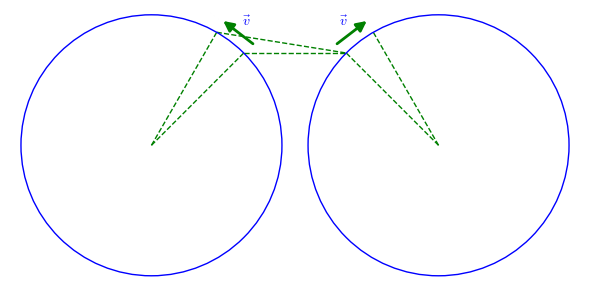

In [2]:
draw_scheme(3*pi/4, 3*pi/4).show(aspect_ratio = 1, axes=False)

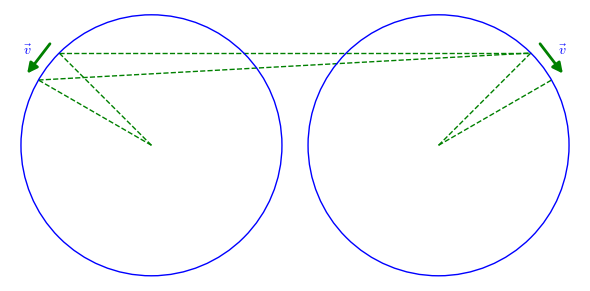

In [3]:
draw_scheme(pi/4, pi/4).show(aspect_ratio = 1, axes=False)

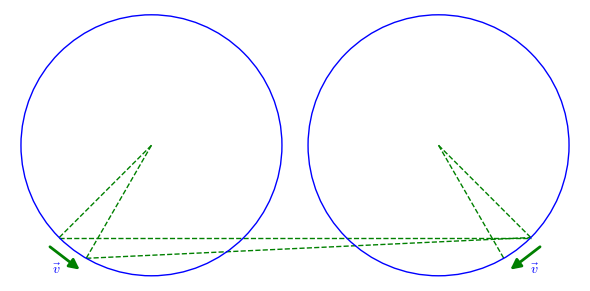

In [4]:
draw_scheme(7*pi/4, 7*pi/4).show(aspect_ratio = 1, axes=False)

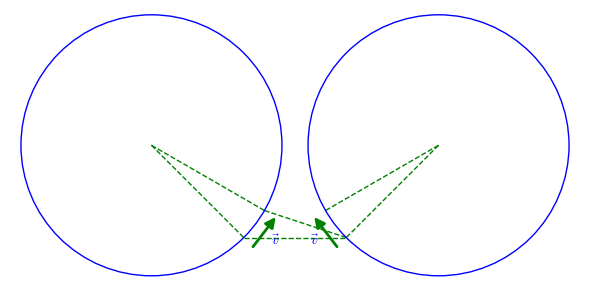

In [5]:
draw_scheme(5*pi/4, 5*pi/4).show(aspect_ratio = 1, axes=False)

Рассмотрим модель зарядов движущихся с постоянной скоростью по окружностям и рассчитаем поля движущихся по заданным траекториям зарядов 
в соответствии с потенциалами Лиенара-Вихерта с учётом запаздывания

Для решения этой задачи выразим электрическое поле исходя из выражения потенциалов Лиенара Вихерта \cite{LL2}, как известно, дифференцированием скалярного потенциала ЛВ по координатам точки наблюдения $\overrightarrow{E_1} = - \nabla\varphi$ и дифференцированием векторного потенциала по времени $\overrightarrow{E_2}=-\frac{1}{c}\frac{\partial \overrightarrow{A}}{\partial t}$, где
$\varphi=\frac{q}{{{R}^{*}}}$
и
$\overrightarrow{A}=\frac{\overrightarrow{v}}{c}\frac{q}{{{R}^{*}}}$
где ${{R}^{*}}=\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)$ - радиус Лиенара Вихерта.

радиус вектор из запаздывающей координаты заряда $(x', y', z')$ в запаздывающий момент $t'$ в точку наблюдения $(x, y, z)$ в момент наблюдения $t$ 

$\vec R = \vec R\left(t'\right)
        = \vec i \left(x-x'\left(t'\right)\right)
        + \vec j \left(y-y'\left(t'\right)\right)
        + \vec k \left(z-z'\left(t'\right)\right)$


расстояние от точки наблюдения $(x, y, z)$ в момент наблюдения $t$ к запаздывающей координате заряда $(x', y', z')$ в запаздывающий момент $t'$

$R = R\left(t'\right) = c \left(t-t'\right)$

скорость заряда в запаздывающий момент времени $t'$

$\vec v = \vec v\left(t'\right) = \frac {\partial}{\partial t'}(x', y', z')$

Дифференцируем $R\left(t'\right) = c \left(t-t'\right)$ по $t$

$\frac{\partial R\left(t'\right)}{\partial t} = \frac{\partial R\left(t'\right)}{\partial t'} \frac{\partial t'}{\partial t}$

Дифференцируем тождество $R\left(t'\right)^2 = \left(\vec R\left(t'\right)^2\right)$ по $t'$

$\frac{\partial}{\partial t'}\left(R\left(t'\right)^2\right) = \frac{\partial}{\partial t'} \left(\vec R\left(t'\right)^2\right)$

$\frac{\partial}{\partial t'}R^2 = \frac{\partial}{\partial t'} \left(\left(\vec i \left(x-x'\left(t'\right)\right)
        + \vec j \left(y-y'\left(t'\right)\right)
        + \vec k \left(z-z'\left(t'\right)\right)\right)^2\right)$

$2\,R\left(t'\right)\frac{\partial R\left(t'\right)}{\partial t'} = 2\,\vec R\left(t'\right)\frac{\partial \vec R\left(t'\right)}{\partial t'}$

Учитывая что $\frac{\partial \vec R\left(t'\right)}{\partial t'} = -\vec v\left(t'\right)$ (знак минус связан с тем что $R\left(t'\right)$ есть радиус вектор из запаздывающей координаты заряда $(x', y', z')$ в точку наблюдения $(x, y, z)$ а не наоборот)

$R\left(t'\right)\frac{\partial R\left(t'\right)}{\partial t'} = -\vec R\left(t'\right)\vec v\left(t'\right)$

$\frac{\partial R\left(t'\right)}{\partial t'} = -\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{R\left(t'\right)}$

Получаем

$\frac{\partial R\left(t'\right)}{\partial t} = \frac{\partial R\left(t'\right)}{\partial t'} \frac{\partial t'}{\partial t} = -\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{R\left(t'\right)} \frac{\partial t'}{\partial t} = c\left(1-\frac{\partial t'}{\partial t}\right)$

Отсюда

$$\frac{\partial t'}{\partial t} = \frac{1}{1 -\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{R\left(t'\right)\,c}} = \frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)}$$

Дифференцируем $R\left(t'\right) = c \left(t-t'\right)$ по координатам наблюдения

$\frac{\frac{\partial}{\partial x} R\left(t'\right)}{c} = \frac{\partial}{\partial x} \left(t-t'\right)$

$\frac{\partial}{\partial x} t' = -\frac{\frac{\partial}{\partial x} R\left(t'\right)}{c} = - \frac{1}{c}\left(\frac{\partial R\left(t'\right)}{\partial t'} \frac{\partial}{\partial x} t' + \frac{R_x}{R}\right)$

$\frac{\partial}{\partial x} t' = - \frac{1}{c}\left(-\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{R\left(t'\right)} \frac{\partial}{\partial x} t' + \frac{R_x}{R}\right)$

Отсюда

$$\frac{\partial  t'}{\partial x} = - \frac{R_x\left(t'\right)}{c\,\left(R\left(t'\right) -\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{c}\right)} = - \frac{R_x\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}$$

Дифференцируем $R\left(t'\right) = c \left(t-t'\right)$ по координатам наблюдения

$\frac{\nabla R\left(t'\right)}{c} = \nabla \left(t-t'\right)$

$\nabla t' = -\frac{\nabla R\left(t'\right)}{c} = - \frac{1}{c}\left(\frac{\partial R\left(t'\right)}{\partial t'} \nabla t' + \frac{\vec R}{R}\right)$

$\nabla t' = - \frac{1}{c}\left(-\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{R\left(t'\right)} \nabla t' + \frac{\vec R}{R}\right)$

Отсюда

$$\nabla t' = - \frac{\vec R\left(t'\right)}{c\,\left(R\left(t'\right) -\frac{\vec R\left(t'\right)\vec v\left(t'\right)}{c}\right)}  = - \frac{\vec R\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}$$

С помощью этих формул вычисляем поля

электрическое поле:

$\vec{E} = -\nabla\varphi - \frac{1}{c}\frac{\partial}{\partial t}\vec{A}$

где

$\varphi=\frac{q}{{R}^{*}}$, $\vec{A}=\frac{\vec{v}}{c}\frac{q}{{R}^{*}}$

и

${R}^{*} = R - \frac{\vec{v}\vec{R}}{c}$

Итак, поскольку

$\nabla\frac{1}{{{R}^{*}}} = \left(\frac{d}{d{{R}^{*}}}\frac{1}{{{R}^{*}}}\right)\left(\nabla {{R}^{*}}\right) = -\frac{1}{{{R}^{*}}^2}\nabla {{R}^{*}}$


Нам теперь нужен градиент по координатам наблюдения радиуса Лиенара Вихерта

$\nabla {{R}^{*}} = \nabla {\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)} =  {\left( \nabla R-\nabla \frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)}$

находим градиент расстояния

$\nabla R = -\,с \,\nabla t' = \,c\,\frac{\vec R}{c\,\left(R -\frac{\vec R\vec v}{c}\right)} = \frac{\vec R}{R -\frac{\vec R\vec v}{c}}=\frac{\vec R}{{R}^{*}}$

Далее учитывая формулу для градиента скалярного произведения

$\nabla \left(\overrightarrow{v}\cdot \overrightarrow{R}\right)
    = \overrightarrow{v} \times \left(\nabla \times \overrightarrow{R}\right)
    + \overrightarrow{R} \times \left(\nabla \times \overrightarrow{v}\right)
    + \left(\overrightarrow{v} \cdot \nabla\right) \overrightarrow{R}
    + \left(\overrightarrow{R} \cdot \nabla\right) \overrightarrow{v}$
    
Для первого слагаемого находим

$\left(\nabla \times \overrightarrow{R}\right) = rot \overrightarrow{R}$

$rot \overrightarrow{R}\left(t'\right)=\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k\\
    \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
    R_{x}\left(t'\right) & R_{y}\left(t'\right) & R_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{R}\left(t'\right)=\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k\\
    \frac{\partial}{\partial t'}\frac{\partial t'}{\partial x} & \frac{\partial}{\partial t'}\frac{\partial t'}{\partial y} & \frac{\partial}{\partial t'}\frac{\partial t'}{\partial z}\\
    R_{x}\left(t'\right) & R_{y}\left(t'\right) & R_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{R}\left(t'\right)=\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      -\frac{R_x\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}\frac{\partial}{\partial t'}
    & -\frac{R_y\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}\frac{\partial}{\partial t'}
    & -\frac{R_z\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}\frac{\partial}{\partial t'} \\
    R_{x}\left(t'\right) & R_{y}\left(t'\right) & R_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{R}\left(t'\right)=-\frac{1}{c\,{{R}^{*}}\left(t'\right)}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x\left(t'\right)\frac{\partial}{\partial t'}
    & R_y\left(t'\right)\frac{\partial}{\partial t'}
    & R_z\left(t'\right)\frac{\partial}{\partial t'} \\
    R_{x}\left(t'\right) & R_{y}\left(t'\right) & R_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{R}\left(t'\right)=-\frac{1}{c\,{{R}^{*}}\left(t'\right)}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x\left(t'\right)
    & R_y\left(t'\right)
    & R_z\left(t'\right) \\
    \frac{\partial}{\partial t'}R_{x}\left(t'\right)
    & \frac{\partial}{\partial t'} R_{y}\left(t'\right)
    & \frac{\partial}{\partial t'} R_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{R}\left(t'\right)=-\frac{1}{c\,{{R}^{*}}\left(t'\right)}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x\left(t'\right)
    & R_y\left(t'\right)
    & R_z\left(t'\right) \\
    -v_{x}\left(t'\right)
    & -v_{y}\left(t'\right)
    & -v_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(
    \vec i \left(v_z R_y - v_y R_z\right) +
    \vec j \left(v_x R_z - v_z R_x\right) +
    \vec k \left(v_y R_x - v_x R_y\right)\right)$

Далее

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      v_x
    & v_y
    & v_z \\
    \left(v_z R_y - v_y R_z\right)
    & \left(v_x R_z - v_z R_x\right)
    & \left(v_y R_x - v_x R_y\right)\\
\end{array}\right|$

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i \left( v_y \left(v_y R_x - v_x R_y\right) - v_z \left(v_x R_z - v_z R_x\right) \right)  \\
    +\vec j \left( v_z \left(v_z R_y - v_y R_z\right) - v_x \left(v_y R_x - v_x R_y\right) \right) \\
    +\vec k \left( v_x \left(v_x R_z - v_z R_x\right) - v_y \left(v_z R_y - v_y R_z\right) \right)
\end{array}\right)$

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i  \left(R_x\left( v_y^2 + v_z^2\right) - v_x v_y R_y - v_x v_z R_z \right)  \\
    +\vec i  \left(R_y\left( v_z^2 + v_x^2\right) - v_y v_z R_z - v_y v_x R_x  \right)  \\
    +\vec i  \left(R_z\left( v_x^2 + v_y^2\right) - v_z v_x R_x - v_z v_y R_y \right)  \\
\end{array}\right)$

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i  \left(R_x\left( v_y^2 + v_z^2\right) - v_x \left(v_y R_y + v_z R_z \right) \right)  \\
    +\vec i  \left(R_y\left( v_z^2 + v_x^2\right) - v_y \left(v_z R_z + v_x R_x \right) \right)  \\
    +\vec i  \left(R_z\left( v_x^2 + v_y^2\right) - v_z \left(v_x R_x + v_y R_y \right) \right)  \\
\end{array}\right)$

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i \left(R_x\left(v_x^2 + v_y^2 + v_z^2\right) - v_x \left(v_x R_x + v_y R_y + v_z R_z \right) \right)  \\
    +\vec i \left(R_y\left(v_y^2 + v_z^2 + v_x^2\right) - v_y \left(v_y R_y + v_z R_z + v_x R_x \right) \right)  \\
    +\vec i \left(R_z\left(v_z^2 + v_x^2 + v_y^2\right) - v_z \left(v_z R_z + v_x R_x + v_y R_y \right) \right)  \\
\end{array}\right)$

Переходя к векторным обозначениям

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(v^2 \vec R - \left(\vec v \vec R\right) \vec v\right)$

Для второго слагаемого находим

$\left(\nabla \times \overrightarrow{v}\right) = rot \overrightarrow{v}$

$rot \overrightarrow{v}\left(t'\right)=\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k\\
    \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
    v_{x}\left(t'\right) & v_{y}\left(t'\right) & v_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{v}\left(t'\right)=\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k\\
    \frac{\partial}{\partial t'}\frac{\partial t'}{\partial x} & \frac{\partial}{\partial t'}\frac{\partial t'}{\partial y} & \frac{\partial}{\partial t'}\frac{\partial t'}{\partial z}\\
    v_{x}\left(t'\right) & v_{y}\left(t'\right) & v_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{v}\left(t'\right)=\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      -\frac{R_x\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}\frac{\partial}{\partial t'}
    & -\frac{R_y\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}\frac{\partial}{\partial t'}
    & -\frac{R_z\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}\frac{\partial}{\partial t'} \\
    v_{x}\left(t'\right) & v_{y}\left(t'\right) & v_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{v}\left(t'\right)=-\frac{1}{c\,{{R}^{*}}\left(t'\right)}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x\left(t'\right)\frac{\partial}{\partial t'}
    & R_y\left(t'\right)\frac{\partial}{\partial t'}
    & R_z\left(t'\right)\frac{\partial}{\partial t'} \\
    v_{x}\left(t'\right) & v_{y}\left(t'\right) & v_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{v}\left(t'\right)=-\frac{1}{c\,{{R}^{*}}\left(t'\right)}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x\left(t'\right)
    & R_y\left(t'\right)
    & R_z\left(t'\right) \\
    \frac{\partial}{\partial t'}v_{x}\left(t'\right)
    & \frac{\partial}{\partial t'} v_{y}\left(t'\right)
    & \frac{\partial}{\partial t'} v_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{v}\left(t'\right)=-\frac{1}{c\,{{R}^{*}}\left(t'\right)}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x\left(t'\right)
    & R_y\left(t'\right)
    & R_z\left(t'\right) \\
    a_{x}\left(t'\right)
    & a_{y}\left(t'\right)
    & a_{z}\left(t'\right)\\
\end{array}\right|$

$rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(
    \vec i \left(a_z R_y - a_y R_z\right) +
    \vec j \left(a_x R_z - a_z R_x\right) +
    \vec k \left(a_y R_x - a_x R_y\right)\right)$

Далее

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left|\begin{array}{ccc}
    \vec i & \vec j & \vec k \\
      R_x
    & R_y
    & R_z \\
    \left(a_z R_y - a_y R_z\right)
    & \left(a_x R_z - a_z R_x\right)
    & \left(a_y R_x - a_x R_y\right)\\
\end{array}\right|$

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i \left( R_y \left(a_y R_x - a_x R_y\right) - R_z \left(a_x R_z - a_z R_x\right) \right)  \\
    +\vec j \left( R_z \left(a_z R_y - a_y R_z\right) - R_x \left(a_y R_x - a_x R_y\right) \right) \\
    +\vec k \left( R_x \left(a_x R_z - a_z R_x\right) - R_y \left(a_z R_y - a_y R_z\right) \right)
\end{array}\right)$

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i  \left(a_x\left( R_y^2 + R_z^2\right) - R_x R_y a_y - R_x R_z a_z \right)  \\
    +\vec i  \left(a_y\left( R_z^2 + R_x^2\right) - R_y R_z a_z - R_y R_x a_x  \right)  \\
    +\vec i  \left(a_z\left( R_x^2 + R_y^2\right) - R_z R_x a_x - R_z R_y a_y \right)  \\
\end{array}\right)$

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i  \left(a_x\left( R_y^2 + R_z^2\right) - R_x \left(R_y a_y + R_z a_z \right) \right)  \\
    +\vec i  \left(a_y\left( R_z^2 + R_x^2\right) - R_y \left(R_z a_z + R_x a_x \right) \right)  \\
    +\vec i  \left(a_z\left( R_x^2 + R_y^2\right) - R_z \left(R_x a_x + R_y a_y \right) \right)  \\
\end{array}\right)$

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(\begin{array}{c}
    +\vec i \left(a_x\left(R_x^2 + R_y^2 + R_z^2\right) - R_x \left(R_x a_x + R_y a_y + R_z a_z \right) \right)  \\
    +\vec i \left(a_y\left(R_y^2 + R_z^2 + R_x^2\right) - R_y \left(R_y a_y + R_z a_z + R_x a_x \right) \right)  \\
    +\vec i \left(a_z\left(R_z^2 + R_x^2 + R_y^2\right) - R_z \left(R_z a_z + R_x a_x + R_y a_y \right) \right)  \\
\end{array}\right)$

Переходя к векторным обозначениям

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(R^2 \vec a - \left(\vec R \vec a\right) \vec R\right)$

Третье слагаемое

$\left(\overrightarrow{v}\left(t'\right)  \cdot \nabla\right) \overrightarrow{R}\left(t'\right)
    = v_x\left(t'\right) \frac{\partial}{\partial x} \overrightarrow{R}\left(t'\right)
    + v_y\left(t'\right) \frac{\partial}{\partial y} \overrightarrow{R}\left(t'\right)
    + v_z\left(t'\right) \frac{\partial}{\partial z} \overrightarrow{R}\left(t'\right)$

$\frac{\partial}{\partial x} \vec R\left(t'\right)
    = \frac{\partial \vec R\left(t'\right)}{\partial t'} \frac{\partial t'}{\partial x}  + \frac{\partial \vec R}{\partial x}\Big|_{t'=const}
    = - \vec v\left(t'\right) \frac{\partial t'}{\partial x}  + \frac{\partial \vec R}{\partial x}\Big|_{t'=const}
    = - \vec v\left(t'\right) \frac{R_x\left(t'\right)}{c\,{{R}^{*}}\left(t'\right)}  + \frac{\partial \vec R}{\partial x}\Big|_{t'=const}$

$\frac{\partial\vec R\left(t'\right)}{\partial x} \Big|_{t'=const}
        =  \frac{\partial}{\partial x}\left(\vec i \left(x-x'\left(t'\right)\right)
        + \vec j \left(y-y'\left(t'\right)\right)
        + \vec k \left(z-z'\left(t'\right)\right)\right)
        = \vec i$

$\frac{\partial}{\partial x} \vec R\left(t'\right) = \vec v \frac{R_x}{c\,{{R}^{*}}} + \vec i$

$\frac{\partial}{\partial y} \vec R\left(t'\right) = \vec v \frac{R_y}{c\,{{R}^{*}}} + \vec j$

$\frac{\partial}{\partial z} \vec R\left(t'\right) = \vec v \frac{R_z}{c\,{{R}^{*}}} + \vec k$

$\left(\overrightarrow{v}\left(t'\right)  \cdot \nabla\right) \overrightarrow{R}\left(t'\right)
    = v_x\left(\vec v \frac{R_x}{c\,{{R}^{*}}} + \vec i\right)
    + v_y\left(\vec v \frac{R_y}{c\,{{R}^{*}}} + \vec j\right)
    + v_z\left(\vec v \frac{R_z}{c\,{{R}^{*}}} + \vec k\right)
    = \vec v + \vec v \frac{\left(\vec R \cdot \vec v\right)}{c\,{{R}^{*}}}$

Четвертое слагаемое

$\left(\overrightarrow{R}\left(t'\right)  \cdot \nabla\right) \overrightarrow{v}\left(t'\right)
    = R_x\left(t'\right) \frac{\partial}{\partial x} \overrightarrow{v}\left(t'\right)
    + R_y\left(t'\right) \frac{\partial}{\partial y} \overrightarrow{v}\left(t'\right)
    + R_z\left(t'\right) \frac{\partial}{\partial z} \overrightarrow{v}\left(t'\right)$

$\frac{\partial}{\partial x} \vec v\left(t'\right)
    = \frac{\partial \vec v\left(t'\right)}{\partial t'} \frac{\partial t'}{\partial x}
    = \vec a\left(t'\right) \frac{\partial t'}{\partial x}
    = \frac{\vec a\left(t'\right)}{c} \frac{R_x\left(t'\right)}{{{R}^{*}}\left(t'\right)}$

$\left(\overrightarrow{R}\left(t'\right)  \cdot \nabla\right) \overrightarrow{v}\left(t'\right)
    = R_x \frac{\vec a}{c} \frac{R_x}{{{R}^{*}}}
    + R_y \frac{\vec a}{c} \frac{R_y}{{{R}^{*}}}
    + R_z \frac{\vec a}{c} \frac{R_z}{{{R}^{*}}}
    = \frac{\vec a}{c} \frac{R^2}{{{R}^{*}}}$

Подводя итоги для

$\nabla \left(\overrightarrow{v}\cdot \overrightarrow{R}\right)
    = \overrightarrow{v} \times \left(\nabla \times \overrightarrow{R}\right)
    + \overrightarrow{R} \times \left(\nabla \times \overrightarrow{v}\right)
    + \left(\overrightarrow{v} \cdot \nabla\right) \overrightarrow{R}
    + \left(\overrightarrow{R} \cdot \nabla\right) \overrightarrow{v}$

$\vec v \times rot \overrightarrow{R}=\frac{1}{c\,{{R}^{*}}}\left(v^2 \vec R - \left(\vec v \vec R\right) \vec v\right)$

$\vec R \times rot \overrightarrow{v}=-\frac{1}{c\,{{R}^{*}}}\left(R^2 \vec a - \left(\vec R \vec a\right) \vec R\right)$

$\left(\overrightarrow{v}\left(t'\right)  \cdot \nabla\right) \overrightarrow{R}\left(t'\right)
    = \vec v + \vec v \frac{\left(\vec R \cdot \vec v\right)}{c\,{{R}^{*}}}$

$\left(\overrightarrow{R}\left(t'\right)  \cdot \nabla\right) \overrightarrow{v}\left(t'\right)
    = \frac{\vec a}{c} \frac{R^2}{{{R}^{*}}}$

Находим для градиента скалярного произведения скорости на радиус вектор

$\nabla \left(\overrightarrow{v}\cdot \overrightarrow{R}\right)
    = \vec v + \frac{1}{c\,{{R}^{*}}}\left(v^2 \vec R - \left(\vec R \vec a\right) \vec R\right)$

Таким образом для градиента по координатам наблюдения радиуса Лиенара Вихерта

$\nabla {{R}^{*}}
    = \nabla {\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)}
    = {\left( \frac{\vec R}{{R}^{*}}-\nabla \frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)}
    = {\left( \frac{\vec R}{{R}^{*}}- \frac{\vec v}{c} - \frac{1}{c^2\,{{R}^{*}}}\left(v^2 \vec R - \left(\vec R \vec a\right) \vec R\right) \right)}$

Градиент по координатам наблюдения радиуса Лиенара Вихерта

$\nabla {{R}^{*}} = \nabla {\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)} = \left(\frac{\vec{R}}{{{R}^{*}}}\right)\left(1 + \frac{\vec{R}\vec{a}}{c^2}-\frac{v^2}{c^2}\right)-\frac{\vec{v}}{c}$

А для производной по времени наблюдения векторного потенциала

$\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A}
    = \frac{q}{c^2}\frac{\partial }{\partial t}\frac{\overrightarrow{v}\left(t'\right)}{{{R}^{*}}}
    = \frac{q}{c^2}\frac{\partial }{\partial t}\left(\frac{\overrightarrow{v}\left(t'\right)}{{{R}^{*}}}\right)
    = \frac{q}{c^2}\frac{\partial }{\partial t}\left(\overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}}\right)
    = \frac{q}{c^2}\left(\frac{\partial }{\partial t}\overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}} + \overrightarrow{v}\left(t'\right) \cdot \frac{\partial }{\partial t}\frac{1}{{{R}^{*}}}\right)$

$\frac{\partial }{\partial t}\overrightarrow{v}\left(t'\right) = \frac{\partial \overrightarrow{v}\left(t'\right)}{\partial t'}\frac{\partial t'}{\partial t} = \vec a\left(t'\right) \frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)}$

$\frac{\partial }{\partial t}\frac{1}{{{R}^{*}}} = \left(\frac{d}{d{{R}^{*}}}\frac{1}{{{R}^{*}}}\right)\left(\frac{\partial }{\partial t} {{R}^{*}}\right) = -\frac{1}{{{R}^{*}}^2}\frac{\partial }{\partial t} {{R}^{*}}$

Таким образом для производной по $t$ радиуса Лиенара Вихерта

$\frac{\partial }{\partial t}  {{R}^{*}}
    = \frac{\partial }{\partial t}  {\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)}$

Дифференцируем $R\left(t'\right) = c \left(t-t'\right)$ по $t$

$\frac{\partial R\left(t'\right)}{\partial t} = c \left(1 - \frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)}\right)$

$\frac{\partial }{\partial t} \vec R\left(t'\right)
        = \frac{\partial \vec R\left(t'\right)}{\partial t'}\frac{\partial t'}{\partial t}
        = -\vec v\left(t'\right)\frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)}$

$\frac{\partial }{\partial t}{\left(\overrightarrow{v}\cdot \overrightarrow{R} \right)}
    = {\left(\frac{\partial }{\partial t}\overrightarrow{v}\cdot \overrightarrow{R} + \overrightarrow{v}\cdot \frac{\partial }{\partial t}\overrightarrow{R} \right)}
    = {\left(\vec a\left(t'\right) \frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)}\cdot \overrightarrow{R} - \overrightarrow{v}\cdot \vec v\left(t'\right)\frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)} \right)}
    = {\left(\vec a \vec R - v^2 \right)\frac{R}{{{R}^{*}}}}$

Таким образом для производной по $t$ радиуса Лиенара Вихерта

$\frac{\partial }{\partial t}  {{R}^{*}}
    = \frac{\partial }{\partial t}  {\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)}
    = \left( c \left(1 - \frac{R}{{{R}^{*}}}\right)-\frac{\left(\vec a \vec R - v^2 \right)}{c}\frac{R}{{{R}^{*}}} \right)$

А для производной по времени наблюдения векторного потенциала

$\begin{array}{l}\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A} \\
    = \frac{q}{c^2}\left(\frac{\partial }{\partial t}\overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}} + \overrightarrow{v}\left(t'\right) \cdot \frac{\partial }{\partial t}\frac{1}{{{R}^{*}}}\right) \\
    = \frac{q}{c^2}\left(\frac{\partial }{\partial t}\overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}} - \overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}^2}\frac{\partial }{\partial t} {{R}^{*}}\right) \\
    = \frac{q}{c^2}\left(\vec a\left(t'\right) \frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)} \cdot \frac{1}{{{R}^{*}}} - \overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}^2}\frac{\partial }{\partial t} {{R}^{*}}\right) \\
    = \frac{q}{c^2}\left(\vec a\left(t'\right) \frac{R\left(t'\right)}{{{R}^{*}}\left(t'\right)} \cdot \frac{1}{{{R}^{*}}} - \overrightarrow{v}\left(t'\right) \cdot \frac{1}{{{R}^{*}}^2}\left( c \left(1 - \frac{R}{{{R}^{*}}}\right)-\frac{\left(\vec a \vec R - v^2 \right)}{c}\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{c^2}\left(\vec a \frac{R}{{{R}^{*}}} \cdot \frac{1}{{{R}^{*}}} - \overrightarrow{v} \cdot \frac{1}{{{R}^{*}}^2}\left( c \left(1 - \frac{R}{{{R}^{*}}}\right)-\frac{\left(\vec a \vec R - v^2 \right)}{c}\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{{{R}^{*}}^2}\left(\vec a \frac{R}{c^2} - \overrightarrow{v} \cdot \frac{1}{c^2}\left( c \left(1 - \frac{R}{{{R}^{*}}}\right)-\frac{\left(\vec a \vec R - v^2 \right)}{c}\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{{{R}^{*}}^2}\left(\vec a \frac{R}{c^2} - \frac{\overrightarrow{v}}{c}\left( \left(1 - \frac{R}{{{R}^{*}}}\right)-\frac{\left(\vec a \vec R - v^2 \right)}{c^2}\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{{{R}^{*}}^2}\left(\vec a \frac{R}{c^2} - \frac{\overrightarrow{v}}{c}\left( 1 - \frac{R}{{{R}^{*}}}-\left(\frac{\vec a \vec R}{c^2} - \frac{v^2}{c^2} \right)\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{{{R}^{*}}^2}\left(\vec a \frac{R}{c^2} - \frac{\overrightarrow{v}}{c}\left( 1 - \frac{R}{{{R}^{*}}}+\left(\frac{v^2}{c^2} -\frac{\vec a \vec R}{c^2}\right)\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{{{R}^{*}}^2}\left(\vec a \frac{R}{c^2} - \frac{\overrightarrow{v}}{c}\left( 1 +\left(\frac{v^2}{c^2} -\frac{\vec a \vec R}{c^2} - 1\right)\frac{R}{{{R}^{*}}} \right)\right) \\
    = \frac{q}{{{R}^{*}}^2}\left(\vec a \frac{R}{c^2} - \left( \frac{\overrightarrow{v}}{c} +\frac{\overrightarrow{v}}{c}\frac{R}{{{R}^{*}}}\left(\frac{v^2}{c^2} -\frac{\vec a \vec R}{c^2} - 1\right) \right)\right) \\
    \end{array}$

электрическое поле:

$\vec{E} = -\nabla\varphi - \frac{1}{c}\frac{\partial}{\partial t}\vec{A}$

Градиент по координатам наблюдения радиуса Лиенара Вихерта

$\nabla {{R}^{*}} = \nabla {\left( R-\frac{\overrightarrow{v}\cdot \overrightarrow{R}}{c} \right)} = \left(\frac{\vec{R}}{{{R}^{*}}}\right)\left(1 + \frac{\vec{R}\vec{a}}{c^2}-\frac{v^2}{c^2}\right)-\frac{\vec{v}}{c}$


Учитывая вышеприведенные выкладки, для градиента по координатам наблюдения скалярного потенциала ЛВ можно привести

$-\nabla \varphi =-\nabla \frac{q}{{{R}^{*}}}=\frac{q}{{{R}^{*}}^{2}}\left\{ \frac{\overrightarrow{R}}{{{R}^{*}}}\left( 1+\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}-\frac{\overrightarrow{v}\cdot \overrightarrow{v}}{{{c}^{2}}} \right)-\frac{\overrightarrow{v}}{c} \right\}$

А для производной по времени наблюдения векторного потенциала

$-\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A}=\frac{q}{{{R}^{*}}^{2}}\left\{ -\frac{\overrightarrow{a}R}{{{c}^{2}}}+\frac{\overrightarrow{v}}{c}\left( \frac{R}{{{R}^{*}}}\left( -1-\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}+\frac{\overrightarrow{v}\cdot \overrightarrow{v}}{{{c}^{2}}} \right)+1 \right) \right\}$

$-\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A}=\frac{q}{{{R}^{*}}^{2}}\left\{ -\frac{\overrightarrow{a}R}{{{c}^{2}}}+\frac{\overrightarrow{v}}{c}\left( -\frac{R}{{{R}^{*}}}\left( 1+\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}-\frac{v^2}{{{c}^{2}}} \right)+1 \right) \right\}$



$-\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A}=\frac{q}{{{R}^{*}}^{2}}\left\{ -\frac{\overrightarrow{a}R}{{{c}^{2}}}-\frac{R}{{{R}^{*}}}\frac{\overrightarrow{v}}{c}\left( 1+\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}-\frac{v^2}{{{c}^{2}}} \right)+\frac{\overrightarrow{v}}{c} \right\}$

Суммарное электрическое поле

$$\vec{E} = \frac{q}{{{R}^{*}}^{3}}\left( \left(\vec{R}-\frac{R}{c}\vec{v} \right) \left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2} \right) - \vec{a}\frac{{R}^{*}R}{c^2} \right)$$

Опуская громоздкие промежуточные выкладки \cite{rustot}, для градиента по координатам наблюдения скалярного потенциала ЛВ можно привести
$$\nabla \varphi =\nabla \frac{dq}{{{R}^{*}}}=-\frac{dq}{{{R}^{*}}^{2}}\left\{ \frac{\overrightarrow{R}}{{{R}^{*}}}\left( 1+\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}-\frac{\overrightarrow{v}\cdot \overrightarrow{v}}{{{c}^{2}}} \right)-\frac{\overrightarrow{v}}{c} \right\}$$

А для производной по времени наблюдения векторного потенциала 
$$\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A}=\frac{1}{c}\frac{\partial }{\partial t}\frac{dq\overrightarrow{v}}{c{{R}^{*}}}=\frac{dq}{{{R}^{*}}^{2}}\left\{ \frac{\overrightarrow{a}R}{{{c}^{2}}}-\frac{\overrightarrow{v}}{c}\left( \frac{R}{{{R}^{*}}}\left( -1-\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}+\frac{\overrightarrow{v}\cdot \overrightarrow{v}}{{{c}^{2}}} \right)+1 \right) \right\}$$

Сравнение с выкладками Рустота

http://www.sciteclibrary.ru/cgi-bin/yabb2/YaBB.pl?num=1528093569/326#326

$\varphi=\frac{q}{{R}^{*}}$, $\vec{A}=\frac{\vec{v}}{c}\frac{q}{{R}^{*}}$

${R}^{*} = R - \frac{\vec{v}\vec{R}}{c}$

$\nabla\frac{1}{{{R}^{*}}} = \left(\frac{d}{d{{R}^{*}}}\frac{1}{{{R}^{*}}}\right)\left(\nabla {{R}^{*}}\right) = -\frac{1}{{{R}^{*}}^2}\nabla {{R}^{*}}$

$\nabla {{R}^{*}} = \left(\frac{\vec{r}}{{{R}^{*}}}\right)\left(1 + \frac{\vec{R}\vec{a}}{c^2}-\frac{v^2}{c^2}\right)-\frac{\vec{v}}{c}$


электрическое поле:

$\vec{E} = -\nabla\varphi - \frac{1}{c}\frac{\partial}{\partial t}\vec{A} = \frac{q}{{{R}^{*}}^2}\left(\nabla {{R}^{*}}+\frac{\vec{v}}{c^2}\frac{\partial}{\partial t}{{R}^{*}} - \frac{\vec{a}r}{c^2}\right)$, где ${{R}^{*}} = R - \frac{\vec{v}\vec{R}}{c}$

$\vec{E} = \frac{q}{{{R}^{*}}^2}\left(\nabla {{R}^{*}}+\frac{\vec{v}}{c^2}\frac{\partial}{\partial t}{{R}^{*}} - \frac{\vec{a}r}{c^2}\right)$

$\vec{E} = \frac{q}{{{R}^{*}}^2}\left(\left(-\frac{\vec{R}}{c {{R}^{*}}}\right)\left(-c - \frac{\vec{R}\vec{a}}{c} + \frac{v^2}{c}\right)-\frac{\vec{v}}{c}+\frac{\vec{v}}{c^2}\left(\frac{R}{{{R}^{*}}}\left(-c - \frac{\vec{R}\vec{a}}{c} + \frac{v^2}{c}\right) + c\right) - \frac{\vec{a}R}{c^2}\right)$

$\vec{E} = \frac{q}{{{R}^{*}}^3}\left(\left(\vec{R}-\frac{R}{c}\vec{v}\right)\left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) - \vec{a}\frac{{{R}^{*}}R}{c^2}\right)$

и магнитное поле:

$\frac{\partial}{\partial x}\vec{A} = \frac{\partial}{\partial x}\frac{q\vec{v}}{c{{R}^{*}} }$

$\frac{\partial}{\partial x}\vec{A} = \frac{q}{c{R}^{*}}\frac{\partial}{\partial x} \vec{v} - \frac{q\vec{v}}{c{{R}^{*}}^2}\frac{\partial}{\partial x} {{R}^{*}}$

$\frac{\partial}{\partial x}\vec{A} = \frac{q}{c{{R}^{*}} }\left(-\frac{\vec{a}R_x}{c{{R}^{*}}}\right)- \frac{q\vec{v}}{c{{R}^{*}}^2}\left(\frac{R_x}{{{R}^{*}}}\left(1 +\frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) - \frac{v_x}{c}\right)$

$\vec{B} = \nabla\times\vec{A} = -\left(\frac{q}{c^2 {{R}^{*}}^2}\right)\vec{R}\times\vec{a} - \frac{q}{{{R}^{*}}^3 c}\left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)\vec{R}\times\vec{v}$

$\vec{B} = -\frac{q}{{{R}^{*}}^3}\left(\vec{R}\times\frac{\vec{v}}{c}\left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) + \vec{R}\times\frac{\vec{a}{{R}^{*}}}{c^2}\right)$

$\vec{B} = \frac{\vec{R}\times\vec{E}}{R}$



Учитывая вышеприведенные выкладки \cite{rustot}, для градиента по координатам наблюдения скалярного потенциала ЛВ можно привести

$\nabla \varphi =\nabla \frac{q}{{{R}^{*}}}=-\frac{q}{{{R}^{*}}^{2}}\left\{ \frac{\overrightarrow{R}}{{{R}^{*}}}\left( 1+\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}-\frac{\overrightarrow{v}\cdot \overrightarrow{v}}{{{c}^{2}}} \right)-\frac{\overrightarrow{v}}{c} \right\}$ 	

А для производной по времени наблюдения векторного потенциала

$\frac{1}{c}\frac{\partial }{\partial t}\overrightarrow{A}=\frac{1}{c}\frac{\partial }{\partial t}\frac{q\overrightarrow{v}}{c{{R}^{*}}}=\frac{q}{{{R}^{*}}^{2}}\left\{ \frac{\overrightarrow{a}R}{{{c}^{2}}}-\frac{\overrightarrow{v}}{c}\left( \frac{R}{{{R}^{*}}}\left( -1-\frac{\overrightarrow{a}\cdot \overrightarrow{R}}{{{c}^{2}}}+\frac{\overrightarrow{v}\cdot \overrightarrow{v}}{{{c}^{2}}} \right)+1 \right) \right\}$	


Суммарное электрическое поле (сравнить с ЛЛ2 (63,8))

$$\vec{E} = \frac{q}{{{R}^{*}}^{3}}\left( \left(\vec{R}-\frac{R}{c}\vec{v} \right) \left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2} \right) - \vec{a}\frac{{R}^{*}R}{c^2} \right)$$


Далее при имплеменации полученных формул в программные коды используется нормированный на единицу радиус Лиенара Вихерта $k=\left( 1-\frac{\overrightarrow{v}\cdot \overrightarrow{n}}{c} \right)$, где $\overrightarrow{n} = \frac{\overrightarrow{R}}{R}$. При переходе от формул к програмным кодам используется соотношение ${R}^{*} = k\cdot R$

Таким образом в полученном выражении для электрического поля

$\vec{E} = \frac{q}{{{R}^{*}}^3}\left(\left(\vec{R}-\frac{R}{c}\vec{v}\right)\left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) - \vec{a}\frac{{{R}^{*}}R}{c^2}\right)$

при переходе к програмным кодам произведено преобразование

${R} \rightarrow r$

${R}^{*} \rightarrow k\cdot r$

$\vec{R} \rightarrow r\cdot \vec{n}$

и получено используемое в программе выражение

$\vec{E} = \frac{q}{k^3}\left(\left(\vec{n}-\frac{\vec{v}}{c}\right)\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) \frac{1}{r^2} - \frac{k}{r}\frac{\vec{a}}{c^2}\right)$

В полученном выражении для магнитного поля

$\vec{B} = \frac{\vec{r}\times\vec{E}}{r}$

$\vec{B} = -\frac{q}{{{R}^{*}}^3}\left(\vec{R}\times\frac{\vec{v}}{c}\left(1 + \frac{\vec{R}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) + \vec{R}\times\frac{\vec{a}{{R}^{*}}}{c^2}\right)$

При переходе от формул к програмным кодам произведено преобразование

${R} \rightarrow r$

${R}^{*} \rightarrow k\cdot r$

$\vec{R} \rightarrow r\cdot \vec{n}$

$\vec{B} = -\frac{q}{k^3}\left(
\left(\vec{n}\times{\vec{v}}\right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} + \left(\vec{n}\times\vec{a}\right)
\frac{k}{r\,c^2}\right)$

или покомпонентно

$B_x = -\frac{q}{k^3}\left(
\left(   n_y\,v_z -  n_z\,v_y \right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} +
\left(  n_y\,a_z -  n_z\,a_y  \right)
\frac{k}{r\,c^2}\right)$

$B_y = -\frac{q}{k^3}\left(
\left(   n_z\,v_x -  n_x\,v_z \right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} +
\left(  n_z\,a_x -  n_x\,a_z  \right)
\frac{k}{r\,c^2}\right)$

$B_z = -\frac{q}{k^3}\left(
\left(   n_x\,v_y -  n_y\,v_x \right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} +
\left(  n_x\,a_y -  n_y\,a_x  \right)
\frac{k}{r\,c^2}\right)$

на языке си функция расчёта электрического и магнитных полей выглядит так


    int electr_magnet(coordinate x, coordinate y, coordinate z, timevalue t,
                       Coordinate sx, Coordinate sy, Coordinate sz,
                       Velocity vx, Velocity vy, Velocity vz,
                       Acceleration wx, Acceleration wy, Acceleration wz,
                       charge q,
                       field * E_x, field * E_y, field * E_z,
                       field * B_x, field * B_y, field * B_z, coordinate * rlagerror,
                       coordinate xc, coordinate yc, coordinate zc,
                       distance R, anglevelocity omega, angle alpha)
    {
        long double k;
        distance r;
        distance nx;
        distance ny;
        distance nz;

        // расчет итерациями запаздывающего момента
        long double t2;
        if (0 == tlag(x, y, z, t, sx, sy, sz, vx, vy, vz,
                          xc, yc, zc, R, omega, alpha, &t2, rlagerror)) {

            calc_k(x, y, z, t, sx, sy, sz, vx, vy, vz, t2, &k, &r, &nx, &ny, &nz,
                   xc, yc, zc, R, omega, alpha);

            long double v_x = vx(t2, xc, yc, zc, R, omega, alpha);
            long double v_y = vy(t2, xc, yc, zc, R, omega, alpha);
            long double v_z = vz(t2, xc, yc, zc, R, omega, alpha);

            long double w_x = wx(t2, xc, yc, zc, R, omega, alpha);
            long double w_y = wy(t2, xc, yc, zc, R, omega, alpha);
            long double w_z = wz(t2, xc, yc, zc, R, omega, alpha);

            long double v2_c2 = (Sq(v_x) + Sq(v_y) + Sq(v_z)) / (c*c);
            long double ra_c2 = r * (nx*w_x + ny*w_y + nz*w_z) / (c*c);


            (*E_x) = q*(1.0/(k*k*k))*((1.0 - v2_c2 + ra_c2)*(nx - v_x/c)/(r*r)
                                      - (k/r)*w_x/(c*c));
            (*E_y) = q*(1.0/(k*k*k))*((1.0 - v2_c2 + ra_c2)*(ny - v_y/c)/(r*r)
                                      - (k/r)*w_y/(c*c));
            (*E_z) = q*(1.0/(k*k*k))*((1.0 - v2_c2 + ra_c2)*(nz - v_z/c)/(r*r)
                                       - (k/r)*w_z/(c*c));

            (*B_x) = -q*(1.0/(k*k*k))*((1.0 - v2_c2 + ra_c2)*(ny*v_z - nz*v_y)/(r*r)/c
                                        + (ny*w_z - nz*w_y)*(k/r)/(c*c));
            (*B_y) = -q*(1.0/(k*k*k))*((1.0 - v2_c2 + ra_c2)*(nz*v_x - nx*v_z)/(r*r)/c
                                        + (nz*w_x - nx*w_z)*(k/r)/(c*c));
            (*B_z) = -q*(1.0/(k*k*k))*((1.0 - v2_c2 + ra_c2)*(nx*v_y - ny*v_x)/(r*r)/c
                                        + (nx*w_y - ny*w_x)*(k/r)/(c*c));

            return 0;
        }
        return -1;
    }

используемое в программе выражение

$\vec{E} = \frac{q}{k^3}\left(\left(\vec{n}-\frac{\vec{v}}{c}\right)\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right) \frac{1}{r^2} - \frac{k}{r}\frac{\vec{a}}{c^2}\right)$

или покомпонентно

$B_x = -\frac{q}{k^3}\left(
\left(   n_y\,v_z -  n_z\,v_y \right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} +
\left(  n_y\,a_z -  n_z\,a_y  \right)
\frac{k}{r\,c^2}\right)$

$B_y = -\frac{q}{k^3}\left(
\left(   n_z\,v_x -  n_x\,v_z \right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} +
\left(  n_z\,a_x -  n_x\,a_z  \right)
\frac{k}{r\,c^2}\right)$

$B_z = -\frac{q}{k^3}\left(
\left(   n_x\,v_y -  n_y\,v_x \right)
\left(1 + \frac{\vec{r}\vec{a}}{c^2} - \frac{v^2}{c^2}\right)  \frac{1}{c\,r^2} +
\left(  n_x\,a_y -  n_y\,a_x  \right)
\frac{k}{r\,c^2}\right)$

На языке си функция расчёта нормированного радиуса Лиенара Вихерта выглядит следующим образом

    void calc_k(coordinate x, coordinate y, coordinate z, timevalue t,
                Coordinate sx, Coordinate sy, Coordinate sz,
                Velocity vx, Velocity vy, Velocity vz,
                timevalue t2,
                long double * k, distance * r, distance * nx, distance * ny, distance * nz,
                coordinate xc, coordinate yc, coordinate zc,
                distance R, anglevelocity omega, angle alpha)
    {

        (*r) = c * (t - t2);

        (*nx) = (x - sx(t2))/(*r);
        (*ny) = (y - sy(t2))/(*r);
        (*nz) = (z - sz(t2))/(*r);

        (*k) = 1.0 - ((*nx) * vx(t2) +
                      (*ny) * vy(t2) +
                      (*nz) * vz(t2)) / c;

        *pRlw = k*r;
    }

Но прежде чем использовать эту функцию необходимо рассчитать запаздывающий момент $t2$ который рассчитывается с помощью метода Ньютона. Для этого метода используется следующая newton_root_function

In [6]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

var("x,y,z,t,t2,c")

sx = function("sx")(t)
sy = function("sy")(t)
sz = function("sz")(t)

f1 = c*(t-t2) - sqrt((x-sx(t=t2))^2 \
                 + (y-sy(t=t2))^2 \
                 + (z-sz(t=t2))^2)
disp(f1)

<IPython.core.display.Math object>

и ее derivative

In [7]:
disp(f1.diff(t2))

<IPython.core.display.Math object>

Реализация нахождения запаздывающего момента в программных кодах на языке си выглядит следующим образом


    void newton_root_derivative(coordinate x, coordinate y, coordinate z,
                                timevalue t, timevalue t2,
                                Coordinate sx, Coordinate sy, Coordinate sz,
                                Velocity vx, Velocity vy, Velocity vz,
                                coordinate xc, coordinate yc, coordinate zc,
                                distance R, anglevelocity omega, angle alpha,
                                long double * cdt, long double * d, long double * f1,
                                long double * dfdt)
    {
        long double dd =
            Sq(x - sx(t2, xc, yc, zc, R, omega, alpha)) +
            Sq(y - sy(t2, xc, yc, zc, R, omega, alpha)) +
            Sq(z - sz(t2, xc, yc, zc, R, omega, alpha));

        *cdt = c*(t-t2);
        *d = sqrt(dd);
        *f1 = (*cdt) - (*d);

        long double r_dot_v =
            (x - sx(t2, xc, yc, zc, R, omega, alpha))*vx(t2, xc, yc, zc, R, omega, alpha) +
            (y - sy(t2, xc, yc, zc, R, omega, alpha))*vy(t2, xc, yc, zc, R, omega, alpha) +
            (z - sz(t2, xc, yc, zc, R, omega, alpha))*vz(t2, xc, yc, zc, R, omega, alpha);

        *dfdt = -c + r_dot_v / (*d);
    }

    int NewtonIt(long double step,
                 coordinate x, coordinate y, coordinate z,
                 timevalue t, timevalue t2,
                 Coordinate sx, Coordinate sy, Coordinate sz,
                 Velocity vx, Velocity vy, Velocity vz,
                 coordinate xc, coordinate yc, coordinate zc,
                 distance R, anglevelocity omega, angle alpha,
                 timevalue * res, long double *f1)
    {
        int ret = 0;
        long double cdt, d, dfdt;
        newton_root_derivative(x, y, z,
                               t, t2,
                               sx, sy, sz,
                               vx, vy, vz,
                               xc, yc, zc, R, omega, alpha,
                               &cdt, &d, f1, &dfdt);

        if(fabsl(*f1) < distance_Epsilon)
        {
            return +1;
        }

        if (dfdt == 0.0)
        {
            printf("NewtonIt error: derivative is zero\n");
            return -1;
        }

        long double delta      = (*f1)/dfdt;
        long double step_delta = step*delta;
        *res                   = t2-step_delta;

        if (*res == t2)
        {
            printf("NewtonIt step_delta = %0.36Le delta %0.36Le step=%0.36Le\n",
                    step_delta, delta, step);
            printf("NewtonIt t2 %0.36Le *res %0.36Le f1 = %0.36Le dfdt = %0.36Le\n",
                    t2, *res, (*f1), dfdt);
            ret = +2;
        }

        return ret;
    }

    int find_newton_root(coordinate x, coordinate y, coordinate z,
                         timevalue t, timevalue * pt2,
                         Coordinate sx, Coordinate sy, Coordinate sz,
                         Velocity vx, Velocity vy, Velocity vz,
                         coordinate xc, coordinate yc, coordinate zc,
                         distance R, anglevelocity omega, angle alpha)
    {
        long double step = 1.0;
        long double t1;
        long double f;
        int ret;

        for (;;)
        {
            if (logging) printf("t2=%0.30Le\t", *pt2);
            t1 = *pt2;
            ret = NewtonIt(step,
                          x, y, z,
                          t, *pt2,
                          sx, sy, sz,
                          vx, vy, vz,
                          xc, yc, zc, R, omega, alpha, pt2, &f);
            if (0 != ret)
            {
                return ret;
            }

            if (*pt2 == t1){
                printf("NewtonIt *pt2 %Le == t1 %Le step=%Le\n", *pt2, t1, step);
                break;
            }

            if (step > min_newton_step)
                step *= newton_step_multiplier;
        }

        return 0;
    }

    int tlag(coordinate x, coordinate y, coordinate z, timevalue t,
             Coordinate sx, Coordinate sy, Coordinate sz,
             Velocity vx, Velocity vy, Velocity vz,
             coordinate xc, coordinate yc, coordinate zc,
             distance R, anglevelocity omega, angle alpha,
             timevalue * pt2, coordinate * rlagerror)
    {
        if (no_retardation_test){
            *pt2 = t;
            return 0;
        }

        timevalue t1 = t;
        *pt2 = t - 2*timespan_Epsilon;
        long double dd, d, cdt;

        int n = 0;

        while (1) {
            t1 = *pt2;
            dd =
                Sq(x - sx(*pt2, xc, yc, zc, R, omega, alpha)) +
                Sq(y - sy(*pt2, xc, yc, zc, R, omega, alpha)) +
                Sq(z - sz(*pt2, xc, yc, zc, R, omega, alpha));
            d = sqrt(dd);
            *pt2 = t - d / c;
            cdt = c*(t-*pt2);

            if(d/c < timespan_Epsilon)
                break;

            if(fabsl(cdt - d) < distance_Epsilon)
                break;

            if (*pt2 == t1)
                break;
        }

        int ret = find_newton_root(x, y, z, t, pt2,
                         sx, sy, sz,
                         vx, vy, vz,
                         xc, yc, zc,
                         R, omega, alpha);

        // calc tlagtest

        dd =
            Sq(x - sx(*pt2, xc, yc, zc, R, omega, alpha)) +
            Sq(y - sy(*pt2, xc, yc, zc, R, omega, alpha)) +
            Sq(z - sz(*pt2, xc, yc, zc, R, omega, alpha));
        d = sqrt(dd);

        cdt = c*(t-(*pt2));
        *rlagerror = cdt - d;


        if (fabsl(*rlagerror) > distance_Epsilon)
        {
            printf("tlag test error: x=%Lf y=%Lf z=%Lf t=%Lf t2=%Lf\n",
                x, y, z, t, *pt2);
            printf("tlag test error: d=%Lf cdt=%Lf (cdt - d)=%Le\n",
                d, cdt, (*rlagerror));
            return -1;
        }

        return 0;
    }


Учитывая параграф 75 из ЛЛ2 Торможение излучением. В этом параграфе Ландау Лифшиц пишут, что члены третьего порядка в разложении поля приводят к появлению дополнительных, действующих на заряды сил, не содержащихся в функции Лагранжа (65,7); эти силы зависят от производных по времени от ускорения зарядов.

$$A^{'(2)} = -\frac{2}{3\,c^2} \sum{e \, \dot{\vec{v}}}\,\,\,(75,3)$$

$E = - {\dot{A}}^{'(2)}/c$

$E = \frac{2}{3\,c^3} \sum{e \, \ddot{\vec{v}}}$

$$E = \frac{2}{3\,c^3} \dddot{\vec{d}}\,\,\,(75,4)$$

где

$\vec{d} = \sum e \vec r$

дипольный момент системы.

Торможение излучением имеет место и при наличии одного движущегося (во внешнем поле) заряда. Оно равно

$$f = \frac{2 e^2}{3\,c^3} \ddot{\vec{v}}\,\,\,(75,8)$$

Для одной частицы можно всегда выбрать такую систему отсчёта, в которой она в данный момент времени покоится. Если вычислять в такой системе дальнейшие члены разложения, создаваемого зарядом поля, то легко убедиться, что при стремлении к нулю радиус вектора $\vec R$ от заряда к точке наблюдения все эти члены обращаются в нуль. Таким образом, пишет Ландау, в случае одного (точечного !) заряда формула (75,8) является точным выражением для обратного действия в той системе отсчёта, в которой заряд покоится.

А поскольку интегрирование производится в лабораторной системе координат,
необходимо в соответствии с преобразованиями Лоренца (формулы (26.35) (26.38) Фейнмановских лекций по физике, том 6) произвести преобразование формулы ЛЛ2 (75,8) из системы координат,
связанной с зарядом в лабораторную систему координат

$$f = \frac{\frac{2 e^2}{3\,c^3} \ddot{\vec{v}}}{\sqrt{1-v^2/c^2}}\,\,(75,8)\,\, с \,\,учётом \,\, (26.38)$$

Следует однако заметить, что для объемного заряда радиус вектор $\vec R$ от точки истока до точки наблюдения не обращается в нуль, он по крайней мере находится в пределах классического радиуса заряда.

после того как найдены 

 - поле создаваемое правым вращающимся зарядом в области левого вращающегося заряда
 - поле создаваемое левым вращающимся зарядом в области правого вращающегося заряда
 - величина торможения излучением

вычисляются 

 - сила действующая на правый заряд со стороны поля левого заряда
 - сила действующая на левый заряд со стороны поля правого заряда
 - сила торможения излучением
 
по формуле $\vec F = q \vec E + \frac {q}{c} [\vec v \vec B]+\frac{2\,q^2\,\ddot{\vec{v}}}{{3\,c^3} \sqrt{1-v^2/c^2}}$

в результате вычисления этих сил нас интересует

 - величина тяги в направлении оси y $F_y$
 - угловое усилие направленное по касательной к траектории заряда
 
   $F_{\alpha} = F_y \, cos(\alpha) - F_x \, sin(\alpha)$


Реализация этого этапа на языке си выглядит следующим образом

    int ccalc_sum_F_t(int N, long double t_i,
                      long double alpha0_l,
                      long double alpha0_r,
                      long double * Fx,
                      long double * Fy,
                      long double * Fz,
                      long double * F_alpha_l,
                      long double * F_alpha_r,
                      long double * sum_rlagerror_sqare,
                      _Bool to_log)
    {
        long double omega = cget_omega();

        long double sign_a;
        long double sign_q;

        long double Alpha_l;
        long double Alpha_r;

        long double current_angle_l;
        long double current_angle_r;

        long double Omega_l = + omega;
        long double Omega_r = - omega;

        long double Xa, Ya, Za; // X_l, Y_l, Z_l
        long double Xq, Yq, Zq; // X_r, Y_r, Z_r

        long double vx_l, vy_l, vz_l;
        long double vx_r, vy_r, vz_r;

        long double Fx_l = (long double)(0.0);
        long double Fy_l = (long double)(0.0);
        long double Fz_l = (long double)(0.0);
        long double Fx_r = (long double)(0.0);
        long double Fy_r = (long double)(0.0);
        long double Fz_r = (long double)(0.0);

        if (F_alpha_l) {
            *F_alpha_l = (long double)(0.0);
        }

        if (F_alpha_r) {
            *F_alpha_r = (long double)(0.0);
        }

        long double fx_l, fx_r, fy_l, fy_r, fz_l, fz_r;
        long double f_alpha_l, f_alpha_r;

        long double E_x, E_y, E_z, B_x, B_y, B_z;

        long double fx_3l, fy_3l;
        long double fx_3r, fy_3r;

        coordinate rlagerror;
        *sum_rlagerror_sqare = (long double)(0.0);

        for(int i_a = 0; i_a < N; ++i_a) {
            for (int i_q = 0; i_q < N; ++i_q) {

                //i_l = i_a 
                //i_r = i_q

                sign_a = (i_a%2)*2-1;
                sign_q = -((i_q%2)*2-1);

                Alpha_l = M_PI - (i_a * (2*M_PI)/N + alpha0_l);
                Alpha_r = i_q * (2*M_PI)/N + alpha0_r;

                Xa = sx(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                Xq = sx(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);

                Ya = sy(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                Yq = sy(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);

                Za = sz(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                Zq = sz(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);

                vx_l = vx(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                vx_r = vx(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);

                vy_l = vy(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                vy_r = vy(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);

                vz_l = vz(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                vz_r = vz(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);

                // торможение излучением (разложение функции Лагранжа
                // до членов третьего порядка)
                // ЛЛ2 (75,8)
                fx_3r =  2 * sign_q * sign_q / (3*c*c*c) *
                    dot_wx(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);
                fy_3r =  2 * sign_q * sign_q / (3*c*c*c) *
                    dot_wy(t_i, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r);
                fx_3l =  2 * sign_a * sign_a / (3*c*c*c) *
                    dot_wx(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);
                fy_3l =  2 * sign_a * sign_a / (3*c*c*c) *
                    dot_wy(t_i, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l);

                // релятивистское преобразование электрического поля
                // при переходе из системы координат,
                // связанной с зарядом в лабораторную систему координат
                // потому что согласно ЛЛ2 параграф 73
                // для точечного (не распределённого в объеме) заряда
                // формула (75,8) является точным выражением
                // для обратного действия излучения
                // в той системе отсчёта, в которой заряд покоится
                // а интегрирование производится в лабораторной системе координат
                // поэтому необходимо в соответствии с преобразованиями Лоренца
                // формулы (26.35) (26.38) Фейнмановских лекций по физике, том 6
                // произвести преобразование формулы ЛЛ2 (75,8) из системы координат,
                // связанной с зарядом в лабораторную систему координат
                fx_3r /= sqrtl((long double)(1.0) - cget_vc()*cget_vc());
                fy_3r /= sqrtl((long double)(1.0) - cget_vc()*cget_vc());
                fx_3l /= sqrtl((long double)(1.0) - cget_vc()*cget_vc());
                fy_3l /= sqrtl((long double)(1.0) - cget_vc()*cget_vc());

                // поле создаваемое правым вращающимся зарядом
                // в области левого вращающегося заряда

                if (0 != electr_magnet(Xa, Ya, Za, t_i,
                      sx, sy, sz, vx, vy, vz, wx, wy, wz,
                      sign_q,
                      &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, &rlagerror, xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r))
                {
                    return -1;
                }

                *sum_rlagerror_sqare += Sq(rlagerror);

                // сила действующая на левый заряд со стороны поля правого заряда
                fx_l = sign_a*(E_x + (vy_l*B_z-vz_l*B_y)/cget_c());
                fy_l = sign_a*(E_y + (vz_l*B_x-vx_l*B_z)/cget_c());
                fz_l = sign_a*(E_z + (vx_l*B_y-vy_l*B_x)/cget_c());

                // добавка обусловленная торможением излучением
                fx_l += fx_3l;
                fy_l += fy_3l;

                Fx_l += fx_l;
                Fy_l += fy_l;
                Fz_l += fz_l;

                if (F_alpha_l) {

                    current_angle_l = Omega_l * t_i + Alpha_l;

                    // Расчёт углового усилия действующего на левый заряд
                    // со стороны поля правого заряда
                    f_alpha_l  = fy_l * cosl(current_angle_l) - fx_l * sinl(current_angle_l);
                    *F_alpha_l += f_alpha_l;
                }

                // поле создаваемое левым вращающимся зарядом
                // в области правого вращающегося заряда


                if (0 != electr_magnet(Xq, Yq, Zq, t_i,
                      sx, sy, sz, vx, vy, vz, wx, wy, wz,
                      sign_a,
                      &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, &rlagerror, xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l))
                {
                    return -1;
                }

                *sum_rlagerror_sqare += Sq(rlagerror);

                // сила действующая на правый заряд со стороны поля левого заряда
                fx_r = sign_q*(E_x + (vy_r*B_z-vz_r*B_y)/cget_c());
                fy_r = sign_q*(E_y + (vz_r*B_x-vx_r*B_z)/cget_c());
                fz_r = sign_q*(E_z + (vx_r*B_y-vy_r*B_x)/cget_c());

                // добавка обусловленная торможением излучением
                fx_r += fx_3r;
                fy_r += fy_3r;

                Fx_r += fx_r;
                Fy_r += fy_r;
                Fz_r += fz_r;

                if (F_alpha_r) {
                    current_angle_r = Omega_r * t_i + Alpha_r;

                    // Расчёт углового усилия действующего на правый заряд
                    // со стороны поля левого заряда
                    f_alpha_r  = fy_r * cosl(current_angle_r) - fx_r * sinl(current_angle_r);
                    *F_alpha_r += f_alpha_r;
                }
            }
        }

        if (Fx)
        {
            *Fx = Fx_l + Fx_r;
        }

        if (Fy)
        {
            // Интегральная величина тяги в направлении оси y
            // printf("Fy_l = %Lf Fy_r = %Lf\n", Fy_l, Fy_r);
            *Fy = Fy_l + Fy_r;
        }

        if (Fz)
        {
            *Fz = Fz_l + Fz_r;
        }

        return 0;
    }


Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

Тамм параграф 33

# Сведение объёмных сил к натяжениям

Рассмотрим некоторый объём среды $V$, ограниченный поверхностью $S$. Если $\vec f$ есть объёмная плотность сил, то равнодействующая всех сил, приложенная к телам, находящимся внутри объёма $V$, будет равна:

$$\vec F = \int\limits_{V}^{} \vec f dV. \,\,\,\,\,\,\,\,(33.1)$$

С другой стороны, если объёмные силы вообще могут быть сведены к натяжениям, то той же величине должна равняться и совокупность натяжений, действующих <i>извне</i> на замкнутую поверхность $S$.

Сила натяжения, испытываемая каким либо элементом поверхности произвольного участка среды, пропорциональна величине этого элемента $dS$ и зависит не только от положения этого элемента, но и от его направления, - иными словами, является не только функцией точки, но и функцией направления нормали $\vec n$ к элементу $dS$. В частности при повороте площадки $dS$ на $180^{\circ}$, то есть при изменении направления нормали $\vec n$ на обратное, сила натяжения меняет свой знак. В этом выражается тот факт, что на протипоположные стороны произвольного элемента поверхности $dS$ (за исключением элементов поверхности разрыва) всегда действуют взаимно уравновешивающиеся равные и противоположные натяжения.

Обозначим через $\vec T_n$ силу, действующую <i>извне</i> на единицу поверхности, внешняя нормаль к которой направлена по $\vec n$; компоненты этой силы по осям координат будем обозначать через $T_{xn}$, $T_{yn}$, $T_{zn}$. Тогда равнодействующая всех натяжений, приложенных извне к поверхности выразится, очевидно, через

$$\vec F = \oint\limits_{S}^{}\vec T_n dS, \,\,\,\,\,\,\,\,(33.2)$$

где $\vec n$ есть внешняя нормаль к элементу $dS$. Приравнивая выражения (33.1) и (33.2) 

$$\vec F = \int\limits_{V}^{} \vec f dV= \oint\limits_{S}^{}\vec T_n dS, \,\,\,\,\,\,\,\,(33.3)$$

мы можем найти соотношение между плотностью объёмных сил $\vec f$ и натяжения $\vec T_n$.

Выберем какую либо произвольную систему декартовых координат и обозначим через $\vec T_x$, $\vec T_y$ и $\vec T_z$ векторную величину силы натяжения, действующую извне на единичную площадку, внешняя нормаль к которой направлена соответственно по оси $x$, по оси $y$ и по оси $z$. Слагающие этих сил по осям координат обозначим через $T_{xx}$, $T_{xy}$, $T_{xz}$ и т.д., так что

$$\vec T_x = \vec i T_{xx} + \vec j T_{yx} + \vec k T_{zx}$$
$$\vec T_y = \vec i T_{xy} + \vec j T_{yy} + \vec k T_{zy}$$
$$\vec T_z = \vec i T_{xz} + \vec j T_{yz} + \vec k T_{zz}$$

Таким образом, например, $T_{xz}$ есть слагающая по оси $x$ силы $\vec T_{z}$, действующей на единичную площадку, внешняя нормаль к которой направлена по оси $z$.

Сила натяжения $\vec T_n$, действующая извне на произвольно оринтированную единичную площадку, внешняя нормаль к которой имеет направление $\vec n$, связана с силами $\vec T_x$, $\vec T_y$ и $\vec T_z$ следующим соотношением:

$$\vec T_n = \vec T_x \, cos(\vec n, x) + \vec T_y \, cos(\vec n, y) + \vec T_z \, cos(\vec n, z), \,\,\,\,\,\,\,\,(33.4)$$

так что

слагающая этой силы по оси $x$ равна:

$$T_{xn} = T_{xx} \, cos(\vec n, x) + T_{xy} \, cos(\vec n, y) + \vec T_{xz} \, cos(\vec n, z), \,\,\,\,\,\,\,\,(33.5)$$

слагающая этой силы по оси $y$ равна:

$$T_{yn} = T_{yx} \, cos(\vec n, x) + T_{yy} \, cos(\vec n, y) + \vec T_{yz} \, cos(\vec n, z), \,\,\,\,\,\,\,\,(33.5)$$

слагающая этой силы по оси $z$ равна:

$$T_{zn} = T_{zx} \, cos(\vec n, x) + T_{zy} \, cos(\vec n, y) + \vec T_{zz} \, cos(\vec n, z), \,\,\,\,\,\,\,\,(33.5)$$

Момент сил натяжения, приложенных к поверхности $S$ объема $V$:

$$N_x = \int\limits_{V} \left(y \, f_z - z \, f_y\right) dV = \oint\limits_{S} \left(y \, T_{zn} - z \, T_{yn}\right) dS + \int\limits_{V} \left(T_{yz} -  T_{zy}\right) dV \,\,\, (33.9)$$

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

Но поскольку мы делаем расчёт силы интегрального давления поля изнутри на воображаемый ящик сферической формы окружающий нашу систему зарядов, мы должны использовать в наших расчётах не внешнюю нормаль, а внутреннюю, поэтому наши направляющие косинусы отличаются отличаются от направляющих косинусов ортогонального единичного вектора сферических координат знаком минус. 

Тамм (34,2)

$T'_{xx} = \frac{1}{4\pi}( E_x^2 - \frac{E^2}{2})$

$T'_{xx} = \frac{1}{4\pi}( E_x\,E_x - \frac{E_x\,E_x + E_y\,E_y + E_z\,E_z}{2})$

$T'_{xx} = \frac{1}{8\pi}( 2\,E_x\,E_x - E_x\,E_x - E_y\,E_y - E_z\,E_z)$

$T'_{xx} = \frac{1}{8\pi}( E_x\,E_x - E_y\,E_y - E_z\,E_z)$

$T'_{xy} = \frac{1}{4\pi}( E_x\, E_y)$

Ищем теперь такие компоненты тензора энегрии импульса как тензор натяжения Максвелла (ЛЛ2, 33,3) и вектор Пойнтинга

$\sigma_{xx} = \frac{1}{8\pi}( - E_x\,E_x - H_x\,H_x + E_y\,E_y + E_z\,E_z + H_y\,H_y + H_z\,H_z)$

$\sigma_{yy} = \frac{1}{8\pi}( - E_y\,E_y - H_y\,H_y + E_z\,E_z + E_x\,E_x + H_z\,H_z + H_x\,H_x)$

$\sigma_{zz} = \frac{1}{8\pi}( - E_z\,E_z - H_z\,H_z + E_x\,E_x + E_y\,E_y + H_x\,H_x + H_y\,H_y)$

$\sigma_{xy} = \frac{1}{4\pi}( - E_x\,E_y - H_x\,H_y )$

$\sigma_{xz} = \frac{1}{4\pi}( - E_x\,E_z - H_x\,H_z )$

$\sigma_{yz} = \frac{1}{4\pi}( - E_y\,E_z - H_y\,H_z )$

$\sigma_{yx} = \frac{1}{4\pi}( - E_y\,E_x - H_y\,H_x )$

$\sigma_{zx} = \frac{1}{4\pi}( - E_z\,E_x - H_z\,H_x )$

$\sigma_{zy} = \frac{1}{4\pi}( - E_z\,E_y - H_z\,H_y )$

    //T = [[sigma_xx, sigma_xy, sigma_xz],
    //     [sigma_yx, sigma_yy, sigma_yz],
    //     [sigma_zx, sigma_zy, sigma_zz]]
    
ЛЛ2 (31, 2)
    
$S_x = \frac{c}{4\pi}(E_y \, H_z - E_z \, H_y)$

$S_y = \frac{c}{4\pi}(E_z \, H_x - E_x \, H_z)$

$S_z = \frac{c}{4\pi}(E_x \, H_y - E_y \, H_x)$

Далее в соответствии с  формулой (33.5) из Тамм параграф 33 находим силу натяжения действующая на площадку поверхности интегрирования со стороны поля создаваемого вращающимися зарядами

что иными словами в соответствии с формулой 32.14 Ландау Лифшиц "Теория поля" (ЛЛ2) является Интегральной величиной количества имульса электромагнитного поля, вытекающего в единицу времени из замкнутого обьёма через площадку

нас интересует импульс поля в направлении $y$

$T_y = (\sigma_{yx} \, cos_{nx} + \sigma_{yy} \, cos_{ny} + \sigma_{yz} \, cos_{nz})$

Реализация этого этапа на языке си выглядит следующим образом

    int ccalc_Maxwells_stress_tensor(long double X_a, long double Y_a, long double Z_a, long double t_i,
                                     int N,
                                     long double cos_nx, long double cos_ny, long double cos_nz,
                                     long double alpha0_l,
                                     long double alpha0_r,
                                     long double * T_xn,
                                     long double * T_yn,
                                     long double * T_zn,
                                     long double * N_x,
                                     long double * N_y,
                                     long double * N_z,
                                     long double * S_n,
                                     long double * sum_rlagerror_sqare
                                   )
    {
        long double omega = cget_omega();

        long double sign_a;
        long double sign_q;

        long double Alpha_l;
        long double Alpha_r;

        long double Omega_l = + omega;
        long double Omega_r = - omega;

        long double Xa, Ya, Za; // X_l, Y_l, Z_l
        long double Xq, Yq, Zq; // X_r, Y_r, Z_r

        long double Ex = 0;
        long double Ey = 0;
        long double Ez = 0;

        long double Hx = 0;
        long double Hy = 0;
        long double Hz = 0;


        long double E_x, E_y, E_z, B_x, B_y, B_z;

        coordinate rlagerror;
        *sum_rlagerror_sqare = 0.0;

        for(int i_a = 0; i_a < N; ++i_a) {
            for (int i_q = 0; i_q < N; ++i_q) {
                //i_l = i_a 
                //i_r = i_q

                sign_a = (i_a%2)*2-1;
                sign_q = -((i_q%2)*2-1);

                Alpha_l = M_PI - (i_a * (2*M_PI)/N + alpha0_l);
                Alpha_r = i_q * (2*M_PI)/N + alpha0_r;

                if (0 != electr_magnet(X_a, Y_a, Z_a, t_i,
                      sx, sy, sz, vx, vy, vz, wx, wy, wz,
                      sign_q,
                      &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, &rlagerror,
                      xc_r(), yc_r(), zc_r(), R_r, Omega_r, Alpha_r))
                {
                    return -1;
                }

                *sum_rlagerror_sqare += Sq(rlagerror);

                Ex += E_x;
                Ey += E_y;
                Ez += E_z;

                Hx += B_x;
                Hy += B_y;
                Hz += B_z;

                if (0 != electr_magnet(X_a, Y_a, Z_a, t_i,
                      sx, sy, sz, vx, vy, vz, wx, wy, wz,
                      sign_a,
                      &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, &rlagerror,
                      xc_l(), yc_l(), zc_l(), R_l, Omega_l, Alpha_l))
                {
                    return -1;
                }

                *sum_rlagerror_sqare += Sq(rlagerror);

                Ex += E_x;
                Ey += E_y;
                Ez += E_z;

                Hx += B_x;
                Hy += B_y;
                Hz += B_z;
            }
        }

        // ЛЛ2 (33,3)

        long double sigma_xx = ((long double)(1.0))/(8*M_PI)*( Ex*Ex + Hx*Hx
                                                             - Ey*Ey - Ez*Ez
                                                             - Hy*Hy - Hz*Hz);
        long double sigma_yy = ((long double)(1.0))/(8*M_PI)*( Ey*Ey + Hy*Hy
                                                             - Ez*Ez - Ex*Ex
                                                             - Hz*Hz - Hx*Hx);
        long double sigma_zz = ((long double)(1.0))/(8*M_PI)*( Ez*Ez + Hz*Hz
                                                             - Ex*Ex - Ey*Ey
                                                             - Hx*Hx - Hy*Hy);

        long double sigma_xy = ((long double)(1.0))/(4*M_PI)*( Ex*Ey + Hx*Hy );
        long double sigma_xz = ((long double)(1.0))/(4*M_PI)*( Ex*Ez + Hx*Hz );
        long double sigma_yz = ((long double)(1.0))/(4*M_PI)*( Ey*Ez + Hy*Hz );

        long double sigma_yx = ((long double)(1.0))/(4*M_PI)*( Ey*Ex + Hy*Hx );
        long double sigma_zx = ((long double)(1.0))/(4*M_PI)*( Ez*Ex + Hz*Hx );
        long double sigma_zy = ((long double)(1.0))/(4*M_PI)*( Ez*Ey + Hz*Hy );

        //T = [[sigma_xx, sigma_xy, sigma_xz],
        //     [sigma_yx, sigma_yy, sigma_yz],
        //     [sigma_zx, sigma_zy, sigma_zz]]

        // Тамм параграф 33 формула (33.5)
        // сила натяжения действующая на площадку поверхности интегрирования
        // со стороны поля создаваемого вращающимися зарядами
        // Интегральная величина количества имульса электромагнитного поля,
        // вытекающего в единицу времени из замкнутого обьёма через площадку ЛЛ2 32.14
        *T_xn = (sigma_xx * cos_nx + sigma_xy * cos_ny + sigma_xz * cos_nz);
        *T_yn = (sigma_yx * cos_nx + sigma_yy * cos_ny + sigma_yz * cos_nz);
        *T_zn = (sigma_zx * cos_nx + sigma_zy * cos_ny + sigma_zz * cos_nz);

        *N_x = Y_a * (*T_zn) - Z_a * (*T_yn);
        *N_y = Z_a * (*T_xn) - X_a * (*T_zn);
        *N_z = X_a * (*T_yn) - Y_a * (*T_xn);

        // ЛЛ2 (31,2)

        long double S_x = (с)/(4*M_PI)*(Ey * Hz - Ez * Hy);
        long double S_y = (с)/(4*M_PI)*(Ez * Hx - Ex * Hz);
        long double S_z = (с)/(4*M_PI)*(Ex * Hy - Ey * Hx);

        // модулю складової вектора Пойнтінга,
        // перпендикулярної до поверхні
        *S_n = (S_x * cos_nx + S_y * cos_ny + S_z * cos_nz);

        return 0;
    }



Для интегрирования в сферической системе координат, которая однако в соответствие с принятыми в задаче наименованиями осей повернута так, что главная ось (зет в сферической системе) направлена вдоль оси игрек исходной декартовой системы

Направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

подготавливаем на языке си функции интегранды



    // Интегрируем в сферической системе координат,
    // которая однако в соотвествие с принятыми в задаче
    // наименованиями осей повернута так,
    // что главная ось (зет в сферической системе)
    // направлена вдоль оси игрек декартовой системы 

    // направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь
    int spherical_ccalc_Maxwells_stress_tensor(
        long double r, long double theta, long double varphi, long double t,
        long double * Txn, long double * Tyn, long double * Tzn,
        long double * Nx, long double * Ny, long double * Nz,
        long double * S,
        long double * sum_rlagerror_sqare)
    {
        return ccalc_Maxwells_stress_tensor(
            r*sinl(theta)*sinl(varphi), // X_a - в декартовой -> y в сферической
            r*cosl(theta),              // Y_a - в декартовой -> z в сферической
            r*sinl(theta)*cosl(varphi), // Z_a - в декартовой -> x в сферической
            t,
            1,                          // N
            - sinl(theta)*sinl(varphi), // cos_nx - i в декартовой -> j в сферической
            - cosl(theta),              // cos_ny - j в декартовой -> k в сферической
            - sinl(theta)*cosl(varphi), // cos_nz - k в декартовой -> i в сферической
            0,
            0,
            Txn, Tyn, Tzn,
            Nx, Ny, Nz,
            S, sum_rlagerror_sqare);
    }

    int spherical_ccalc_Maxwells_stress_tensor_R_t(
        long double theta, long double varphi, long double t,
        long double * ppy, long double * pS,
        long double * sum_rlagerror_sqare)
    {
        long double py;
        long double S;
        int ret = spherical_ccalc_Maxwells_stress_tensor(sphere_R, theta, varphi, t,
                                                         &py, &S, sum_rlagerror_sqare);
        *ppy = sphere_R * sphere_R * py;
        *pS  = - sphere_R * sphere_R * S; // берём количество энергии излучения
        // протекающей через поверхность воображаемой сферы со знаком минус, потому что
        // направление векторов нормали к поверхности
        // внутри функции spherical_ccalc_Maxwells_stress_tensor
        // инвертировано

        return ret;
    }

Для сравнения полученного интеграла вектора Пойнтинга по поверхности интегрирования вычислим полное дипольное излучение в соответствии с формулой (67,8) ЛЛ2 (Теория поля)

$$I = \frac{2}{3\,c^3} \ddot{\vec{d^2}}$$

где

$\vec{d} = \sum e \vec r$

дипольный момент системы, который для случая двух синхронно вращающихся в противоположных направлениях зарядов противоположного знака равен

$\vec{d} = e \, \left(x(t) \, \vec i + y(t) \, \vec j\right) - e \, \left(-x(t) \, \vec i + y(t) \, \vec j\right)$

$\vec{d} = 2 \, e \, x(t) \, \vec i$

$\ddot {\vec{d}} = 2 \, e \, \ddot {x} \, \vec i$

$\ddot{\vec{d^2}} = 4 \, e^2 \, \ddot {x}^2$

$\ddot {x} = -\omega^2\,R_l\,cos\left(\omega\,t\right)$

$\ddot {x}^2 = \omega^4\,R_l^2\,cos^2\left(\omega\,t\right)$


Интегрирование по периоду для квадрата косинуса даёт $1/2$, поэтому:

$$I = \frac{2}{3\,c^3} \ddot{\vec{d^2}} =  \frac{2}{3\,c^3} \, 4 \, e^2 \, \ddot {x}^2 =  \frac{2}{3\,c^3} \, 4 \, e^2 \, \frac{\omega^4\,R_l^2}{2}$$


$$I = \frac{4}{3\,c^3} \, e^2 \, \omega^4\,R_l^2$$

<p>The time-averaged Poynting vector</p>

${\displaystyle \langle \mathbf {S} \rangle =\left({\frac {\mu _{0}p_{0}^{2}\omega ^{4}}{32\pi ^{2}c}}\right){\frac {\sin ^{2}(\theta )}{r^{2}}}\mathbf {\hat {r}} }$

<p>is not distributed isotropically, but concentrated around the directions lying perpendicular to the dipole moment, as a result of the non-spherical electric and magnetic waves. In fact, the spherical harmonic function (sin <i>θ</i>) responsible for such toroidal angular distribution is precisely the <i>l</i>&nbsp;=&nbsp;1 "p" wave.
</p>

<p>The total time-average power radiated by the field can then be derived from the Poynting vector as
</p>

${\displaystyle P={\frac {\mu _{0}\omega ^{4}p_{0}^{2}}{12\pi c}}.}$

Вся эта низкоуровневая имплементация компилируется в обьект cython

In [8]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    int tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha, long double *pt2, long double * rlagerror)
    
    long double tlag_test(long double x, long double y, long double z, long double t1, long double t2, 
               long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
               long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
               long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
               long double xc, long double yc, long double zc,
               long double R, long double omega, long double alpha, long double * d, long double * cdt)
    
    void newton_root_derivative(long double x, long double y, long double z, long double t1, long double t2, 
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha,
                long double * cdt, long double * d, long double * f1,
                long double * dfdt);

    # отношение радиуса Лиенара Вихерта к радиусу
    int klw(long double x, long double y, long double z, long double t,
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double xc, long double yc, long double zc, long double R, long double omega, long double alpha,
            long double *, long double * rlagerror
           )
    # Радиус Лиенара Вихерта
    int Rlw(long double x, long double y, long double z, long double t,
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double xc, long double yc, long double zc, long double R, long double omega, long double alpha,
            long double *, long double * rlagerror
           )
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    int philw(long double x, long double y, long double z, long double t,
              long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
              long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
              long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
              long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
              long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
              long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
              long double q,
              long double xc, long double yc, long double zc, long double R, long double omega, long double alpha,
              long double *, long double * rlagerror)


    # A_lw - векторный потенциал Лиенара Вихерта
    int Alw(long double x, long double y, long double z, long double t,
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
            long double q,
            long double * A_x, long double * A_y, long double * A_z, long double * rlagerror,
            long double xc, long double yc, long double zc, long double R, long double omega, long double alpha
           )
    
    int electr_magnet(long double x, long double y, long double z, long double t,
                      long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                      long double q,
                      long double * E_x, long double * E_y, long double * E_z,
                      long double * B_x, long double * B_y, long double * B_z,
                      long double * rlagerror,
                      long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)

    void cset_c(long double _c)

    void cset_timespan_Epsilon(long double _eps);
    void cset_distance_Epsilon(long double _eps);
    void cset_max_steps(int _max_steps)
    long double cget_c()
    long double cget_timespan_Epsilon()
    
    void cset_min_newton_step(long double min_step);
    void cset_newton_step_multiplier(long double multiplier);
    
    void cset_no_retardation_test(int test)

cdef extern from "lw_vimanic.c":
    long double sx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double sy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double sz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double vy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double vz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double wx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    int ccalc_sum_F_t(int N, long double t_i,
                  long double alpha0_l,
                  long double alpha0_r,
                  long double * Fx,
                  long double * Fy,
                  long double * Fz,
                  long double * F_alpha_l,
                  long double * F_alpha_r,
                  long double * sum_rlagerror_sqare,           
                  int to_log);

    int ccalc_Maxwells_stress_tensor(long double X_a, long double Y_a, long double Z_a, long double t_i,
                                     int N,
                                     long double cos_nx, long double cos_ny, long double cos_nz,
                                     long double alpha0_l,
                                     long double alpha0_r,
                                     long double * T_xn,
                                     long double * T_yn,
                                     long double * T_zn,
                                     long double * N_x,
                                     long double * N_y,
                                     long double * N_z,
                                     long double * Sn,
                                     long double * sum_rlagerror_sqare
                                    );

    int spherical_y_ccalc_Maxwells_stress_tensor(
        long double r, long double theta, long double varphi, long double t,
        long double * Txn, long double * Tyn, long double * Tzn,
        long double * Nx, long double * Ny, long double * Nz,
        long double * Sn,
        long double * sum_rlagerror_sqare)
    
    int spherical_y_ccalc_Maxwells_stress_tensor_R_t(
        long double theta, long double varphi, long double t,
        long double * pTxn, long double * pTyn, long double * pTzn,
        long double * pNx, long double * pNy, long double * pNz,
        long double * pSn,
        long double * sum_rlagerror_sqare);

    int spherical_x_ccalc_Maxwells_stress_tensor(
        long double r, long double theta, long double varphi, long double t,
        long double * Txn, long double * Tyn, long double * Tzn,
        long double * Nx, long double * Ny, long double * Nz,
        long double * Sn,
        long double * sum_rlagerror_sqare)
    
    int spherical_x_ccalc_Maxwells_stress_tensor_R_t(
        long double theta, long double varphi, long double t,
        long double * pTxn, long double * pTyn, long double * pTzn,
        long double * pNx, long double * pNy, long double * pNz,
        long double * pSn,
        long double * sum_rlagerror_sqare);


    void cset_sphere_R(long double R);
    long double cget_sphere_R();
    
    void cset_vc(long double vc)
    long double cget_vc()
    long double cget_omega()
    
    long double cget_S();
    long double cget_R_l();
    long double cget_R_r();

    long double cget_xc_l();
    long double cget_xc_r();

    long double cget_yc_l();
    long double cget_yc_r();

    long double cget_zc_l();
    long double cget_zc_r();
    
import numpy as np

def k_lw(x, y, z, t, xc, yc, zc, R, omega, alpha, to_throw=True):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    #print(x, y, z, t, Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    cdef long double k_lw;
    cdef long double rlagerror;

    ret = klw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, Xc, Yc, Zc, Rc, Omega, Alpha,
              &k_lw, &rlagerror)
    if (to_throw):
        if 0 != ret:
            print(ret, x, y, z, t)
            raise Exception("error")
        return np.float128(k_lw)

    return np.float128(k_lw), ret
    

def R_lw(x, y, z, t, xc, yc, zc, R, omega, alpha, to_throw=True):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    cdef long double r_lw;
    cdef long double rlagerror;
    ret = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, Xc, Yc, Zc, Rc, Omega, Alpha,
              &r_lw, &rlagerror)
    if (to_throw):
        if 0 != ret:
            print(ret, x, y, z, t)
            raise Exception("error")
        return np.float128(r_lw)

    return np.float128(r_lw), ret

def phi_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha, to_throw=True):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    cdef long double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha

    cdef long double philw_;
    cdef long double rlagerror;
    ret = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_, Xc, Yc, Zc, Rc, Omega, Alpha,
                &philw_, &rlagerror)
    if (to_throw):
        if 0 != ret:
            print(ret, x, y, z, t)
            raise Exception("error")
        return np.float128(philw_)

    return np.float128(philw_), ret


def A_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha, to_throw=True):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q_ = q
    
    cdef long double A_x
    cdef long double A_y
    cdef long double A_z
    cdef long double rlagerror;
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha

    ret = Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_,
                  &A_x, &A_y, &A_z, &rlagerror, Xc, Yc, Zc, Rc, Omega, Alpha)
    if (to_throw):
        if 0 != ret:
            print(ret, x, y, z, t)
            raise Exception("error")
        return (np.float128(A_x), np.float128(A_y), np.float128(A_z))

    return (np.float128(A_x), np.float128(A_y), np.float128(A_z)), ret

def EB_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha, to_throw=True):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q_ = q
    
    cdef long double E_x
    cdef long double E_y
    cdef long double E_z
    cdef long double B_x
    cdef long double B_y
    cdef long double B_z
    cdef long double rlagerror
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    ret = electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_,
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, &rlagerror, Xc, Yc, Zc, Rc, Omega, Alpha)
    if (to_throw):
        if 0 != ret:
            print(ret, x, y, z, t)
            raise Exception("error")
        return (np.float128(E_x), np.float128(E_y), np.float128(E_z),
            np.float128(B_x), np.float128(B_y), np.float128(B_z))

    return (np.float128(E_x), np.float128(E_y), np.float128(E_z),
            np.float128(B_x), np.float128(B_y), np.float128(B_z)), ret

def calc_sum_F_t(N, t,
                  alpha0_l = 0,
                  alpha0_r = 0,
                  to_log = False, to_throw=True):
    
    cdef int n = N
    cdef long double t_i = t

    cdef long double Alpha0_l = alpha0_l
    cdef long double Alpha0_r = alpha0_r
    cdef int To_log = to_log
    
    cdef long double Fx;
    cdef long double Fy;
    cdef long double Fz;
    cdef long double * pF_alpha_l = NULL;
    cdef long double * pF_alpha_r = NULL;
    cdef long double sum_rlagerror_sqare;
    
    ret = ccalc_sum_F_t(n, t_i, Alpha0_l, Alpha0_r,
                  &Fx,
                  &Fy,
                  &Fz,
                  pF_alpha_l,
                  pF_alpha_r,
                  &sum_rlagerror_sqare,                    
                  To_log);
    if (to_throw):
        if 0 != ret:
            print(ret, t)
            raise Exception("error")

        return np.float128(Fx), np.float128(Fy), np.float128(Fz)
    return np.float128(Fx), np.float128(Fy), np.float128(Fz), ret

def calc_sum_F_Falpha_t(N, t,
                  alpha0_l = 0,
                  alpha0_r = 0,
                  to_log = False, to_throw=True):
    
    cdef int n = N
    cdef long double t_i = t

    cdef long double Alpha0_l = alpha0_l
    cdef long double Alpha0_r = alpha0_r
    cdef int To_log = to_log
    
    cdef long double Fx;
    cdef long double Fy;
    cdef long double Fz;
    cdef long double F_alpha_l;
    cdef long double F_alpha_r;
    cdef long double sum_rlagerror_sqare;
    
    ret = ccalc_sum_F_t(n, t_i, Alpha0_l, Alpha0_r,
                  &Fx,
                  &Fy,
                  &Fz,
                  &F_alpha_l,
                  &F_alpha_r,
                  &sum_rlagerror_sqare,                    
                  To_log);
    if (to_throw):
        if 0 != ret:
            print(ret, t)
            raise Exception("error")

        return np.float128(Fx), np.float128(Fy), np.float128(Fz), np.float128(F_alpha_l), np.float128(F_alpha_r)

    return np.float128(Fx), np.float128(Fy), np.float128(Fz), np.float128(F_alpha_l), np.float128(F_alpha_r), ret

# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
def spherical_y_calc_Maxwells_stress_tensor (r, theta, varphi, t, to_throw=True) :
    cdef long double _r = r
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t
    
    cdef long double Txn
    cdef long double Tyn
    cdef long double Tzn
    cdef long double Nx
    cdef long double Ny
    cdef long double Nz
    cdef long double Sn
    cdef long double sum_rlagerror_sqare
    
    ret = spherical_y_ccalc_Maxwells_stress_tensor(
        _r, _theta, _varphi, _t,
        &Txn,
        &Tyn,
        &Tzn,
        &Nx,
        &Ny,
        &Nz,
        &Sn,
        &sum_rlagerror_sqare)
    
    if (to_throw):
        if 0 != ret:
            print(ret, r, theta, varphi, t)
            raise Exception("error")

        return np.float128(Txn), np.float128(Tyn), np.float128(Tzn)
    return np.float128(Txn), np.float128(Tyn), np.float128(Tzn), np.float128(Sn), ret

def spherical_y_calc_Txyzn_R_t (theta, varphi, t, to_throw=True) :
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    cdef long double Txn
    cdef long double Tyn
    cdef long double Tzn
    cdef long double Nx
    cdef long double Ny
    cdef long double Nz
    cdef long double Sn
    cdef long double sum_rlagerror_sqare
    
    ret = spherical_y_ccalc_Maxwells_stress_tensor_R_t(_theta, _varphi, _t,
        &Txn,
        &Tyn,
        &Tzn,
        &Nx,
        &Ny,
        &Nz,
        &Sn,
        &sum_rlagerror_sqare)

    if (to_throw):
        if 0 != ret:
            print(ret, theta, varphi, t)
            raise Exception("Accuracy error")

        return np.float128(Txn), np.float128(Tyn), np.float128(Tzn)
    return np.float128(Txn), np.float128(Tyn), np.float128(Tzn), ret

def spherical_y_calc_Nxyz_R_t (theta, varphi, t, to_throw=True) :
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    cdef long double Txn
    cdef long double Tyn
    cdef long double Tzn
    cdef long double Nx
    cdef long double Ny
    cdef long double Nz
    cdef long double Sn
    cdef long double sum_rlagerror_sqare
    
    ret = spherical_y_ccalc_Maxwells_stress_tensor_R_t(_theta, _varphi, _t,
        &Txn,
        &Tyn,
        &Tzn,
        &Nx,
        &Ny,
        &Nz,
        &Sn,
        &sum_rlagerror_sqare)

    if (to_throw):
        if 0 != ret:
            print(ret, theta, varphi, t)
            raise Exception("Accuracy error")

        return np.float128(Nx), np.float128(Ny), np.float128(Nz)
    return np.float128(Nx), np.float128(Ny), np.float128(Nz), ret

def spherical_y_calc_Poynting_R_t (theta, varphi, t, to_throw=True) :
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    cdef long double Txn
    cdef long double Tyn
    cdef long double Tzn
    cdef long double Nx
    cdef long double Ny
    cdef long double Nz
    cdef long double Sn
    cdef long double sum_rlagerror_sqare
    
    ret = spherical_y_ccalc_Maxwells_stress_tensor_R_t(_theta, _varphi, _t,
        &Txn,
        &Tyn,
        &Tzn,
        &Nx,
        &Ny,
        &Nz,
        &Sn,
        &sum_rlagerror_sqare)

    if (to_throw):
        if 0 != ret:
            print(ret, theta, varphi, t)
            raise Exception("Accuracy error")

        return np.float128(Sn)
    return np.float128(Sn), ret

def spherical_x_calc_Poynting_R_t (theta, varphi, t, to_throw=True) :
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    cdef long double Txn
    cdef long double Tyn
    cdef long double Tzn
    cdef long double Nx
    cdef long double Ny
    cdef long double Nz
    cdef long double Sn
    cdef long double sum_rlagerror_sqare
    
    ret = spherical_x_ccalc_Maxwells_stress_tensor_R_t(_theta, _varphi, _t,
        &Txn,
        &Tyn,
        &Tzn,
        &Nx,
        &Ny,
        &Nz,
        &Sn,
        &sum_rlagerror_sqare)

    if (to_throw):
        if 0 != ret:
            print(ret, theta, varphi, t)
            raise Exception("Accuracy error")

        return np.float128(Sn)
    return np.float128(Sn), ret


# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()


def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
def set_distance_Epsilon(eps):
    cset_distance_Epsilon(eps)
def set_max_steps(_max_steps):
    cset_max_steps(_max_steps)

def set_min_newton_step(min_step):
    cset_min_newton_step(min_step)
    
def set_newton_step_multiplier(multiplier):
    cset_newton_step_multiplier(multiplier);
    
def set_no_retardation_test(test):
    cset_no_retardation_test(test)
    
def set_vc(vc):
    cset_vc(vc)
def get_vc():
    return cget_vc()
def set_sphere_R(R):
    cset_sphere_R(R)
def get_sphere_R():
    return cget_sphere_R()
    
def get_S():
    return cget_S()
def get_R_l():
    return cget_R_l()
def get_R_r():
    return cget_R_r()


def get_xc_l():
    return cget_xc_l()
def get_xc_r():
    return cget_xc_r()

def get_yc_l():
    return cget_yc_l()
def get_yc_r():
    return cget_yc_r()

def get_zc_l():
    return cget_zc_l()
def get_zc_r():
    return cget_zc_r()

    
def get_omega():
    return cget_omega()

def T():
    return np.float128(2*np.pi)/get_omega() # период вращения

Вся эта интеграция уровня программирования языка си в объекты cython была затеяна для того чтобы на уровне python использовать библиотеку численного интегрирования

In [9]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-7,
                 'epsrel' : 1.0e-7,
                 'limit'  : 500 }

Ниже производим инициализацию низкоуровневой библиотеки расчётными параметрами

Расчёт будем производить при скорости света 1
и при отношении $v/c = 0.8$

In [10]:
set_c(1.0)
set_timespan_Epsilon(1.e-15)
set_distance_Epsilon(1.e-8)
set_min_newton_step(0.1)
set_newton_step_multiplier(0.9999)
set_vc(np.float128(0.8))
set_no_retardation_test(0)

Радиус сферы интегрирования для начала выберем вблизи нашей системы зарядов - то есть интегрировать тензор натяжения и вектор Пойнтинга будем в ближней зоне

In [11]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R *= 1.5
# R = 40 * get_R_l() + 20 * get_S()

set_sphere_R(R)

get_sphere_R(), R, R^2

(6.1499999999999995, 6.15000000000000, 37.8225000000000)

Но для начала произведём визуализацию моделируемых полей в момент наблюдения t_cur = 7.5 для наглядности представления процесса моделирования 

In [12]:
round_R = float(round(R+0.5))
round_R

7.0

In [13]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(-round_R, +round_R, 70*2)
ya_linspace = np.linspace(-round_R, +round_R, 70*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
klw_l = ya_grid * np.nan
klw_r = ya_grid * np.nan
rlw_l = ya_grid * np.nan
rlw_r = ya_grid * np.nan

phi_l = ya_grid * np.nan
phi_r = ya_grid * np.nan

s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan
ay_ = ya_grid * np.nan
am_ = ya_grid * np.nan
an_ = ya_grid * np.nan
ap_l = ya_grid * np.nan
ap_r = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

sx_l = ya_grid * np.nan
sy_l = ya_grid * np.nan
sz_l = ya_grid * np.nan

sr_l = ya_grid * np.nan
st_l = ya_grid * np.nan

sr_r = ya_grid * np.nan
st_r = ya_grid * np.nan

sr_ = ya_grid * np.nan
st_ = ya_grid * np.nan

sx_r = ya_grid * np.nan
sy_r = ya_grid * np.nan
sz_r = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        
        Rlw = R_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega(), alpha=0)
        rlw_r[iy][ix] = Rlw
        Rlw = R_lw(Xa, Ya, Za, t_cur, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega(), alpha=0)
        rlw_l[iy][ix] = Rlw

        klw = k_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega(), alpha=0)
        klw_r[iy][ix] = klw
        klw = k_lw(Xa, Ya, Za, t_cur, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega(), alpha=0)
        klw_l[iy][ix] = klw

        (Ex_r, Ey_r, Ez_r, Hx_r, Hy_r, Hz_r) = EB_lw(Xa, Ya, Za, t_cur, q, 
              get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega(), alpha=0)
        (Ex_l, Ey_l, Ez_l, Hx_l, Hy_l, Hz_l) = EB_lw(Xa, Ya, Za, t_cur, q, 
              get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega(), alpha=0)

        Ex = Ex_l + Ex_r
        Ey = Ey_l + Ey_r
        Ez = Ez_l + Ez_r

        Hx = Hx_l + Hx_r
        Hy = Hy_l + Hy_r
        Hz = Hz_l + Hz_r

        # The Poynting vector S is defined as to be equal
        # to the cross product (1/mu)E × B

        Sx_l = get_c()/(4*pi)*(Ey_l * Hz_l - Ez_l * Hy_l);
        Sy_l = get_c()/(4*pi)*(Ez_l * Hx_l - Ex_l * Hz_l);
        Sz_l = get_c()/(4*pi)*(Ex_l * Hy_l - Ey_l * Hx_l);

        Sx_r = get_c()/(4*pi)*(Ey_r * Hz_r - Ez_r * Hy_r);
        Sy_r = get_c()/(4*pi)*(Ez_r * Hx_r - Ex_r * Hz_r);
        Sz_r = get_c()/(4*pi)*(Ex_r * Hy_r - Ey_r * Hx_r);

        Sx = get_c()/(4*pi)*(Ey * Hz - Ez * Hy);
        Sy = get_c()/(4*pi)*(Ez * Hx - Ex * Hz);
        Sz = get_c()/(4*pi)*(Ex * Hy - Ey * Hx);

        # polar angle
        angle_phi   = atan2(Ya, Xa)
        # polar angle with center of rotated charge
        angle_phi_l = atan2(Ya-get_yc_l(), Xa-get_xc_l())
        angle_phi_r = atan2(Ya-get_yc_r(), Xa-get_xc_r())

        # тангенциальная компонента вектора Пойнтинга
        S_alpha   = Sy   * cos(angle_phi)   - Sx   * sin(angle_phi);
        S_alpha_l = Sy_l * cos(angle_phi_l) - Sx_l * sin(angle_phi_l);
        S_alpha_r = Sy_r * cos(angle_phi_r) - Sx_r * sin(angle_phi_r);

        # радиальная компонента вектора Пойнтинга
        S_radial   = Sx/cos(angle_phi)     + Sy/sin(angle_phi)
        S_radial_r = Sx_r/cos(angle_phi_r) + Sy_r/sin(angle_phi_r)
        S_radial_l = Sx_l/cos(angle_phi_l) + Sy_l/sin(angle_phi_l)

        sr_[iy][ix] = S_radial
        st_[iy][ix] = S_alpha

        sr_l[iy][ix] = S_radial_l
        st_l[iy][ix] = S_alpha_l

        sr_r[iy][ix] = S_radial_r
        st_r[iy][ix] = S_alpha_r

        sx_l[iy][ix] = Sx_l
        sy_l[iy][ix] = Sy_l
        sz_l[iy][ix] = Sz_l

        sx_r[iy][ix] = Sx_r
        sy_r[iy][ix] = Sy_r
        sz_r[iy][ix] = Sz_r

        sx_[iy][ix] = Sx
        sy_[iy][ix] = Sy
        sz_[iy][ix] = Sz
        
        (Al_x, Al_y, Al_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega(), alpha=0)
        (Ar_x, Ar_y, Ar_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega(), alpha=0)
        ax_[iy][ix] = Al_x + Ar_x
        ay_[iy][ix] = Al_y + Ar_y
        am_[iy][ix] = sqrt((Al_x + Ar_x)^2 + (Al_y + Ar_y)^2)
        an_[iy][ix] = atan2((Al_y + Ar_y),(Al_x + Ar_x))
        
        # angle between vector A and polar axis with center of rotated charge
        beta_l = atan2(Ya-get_yc_l(), Xa-get_xc_l()) - atan2(Al_y, Al_x) + pi/2
        beta_r = atan2(Ya-get_yc_r(), Xa-get_xc_r()) - atan2(Ar_y, Ar_x) + pi/2
        
        A_phi_l = sqrt((Al_x)^2 + (Al_y)^2) * cos(beta_l)
        A_phi_r = sqrt((Ar_x)^2 + (Ar_y)^2) * cos(beta_r)

        ap_l[iy][ix] = A_phi_l
        ap_r[iy][ix] = A_phi_r

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2
        
        phi_r[iy][ix] = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega(), alpha=0)
        phi_l[iy][ix] = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega(), alpha=0)
        s_[iy][ix] = phi_r[iy][ix]+phi_l[iy][ix]


        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

In [14]:
# отношение радиуса Лиенара Вихерта к длине радиус-вектора
def plot_lw(xa_grid, ya_grid, lw, title, levels=None):
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(xa_grid, ya_grid, lw, levels=levels)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title(title)
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    ax.set_aspect(1)
    return plt

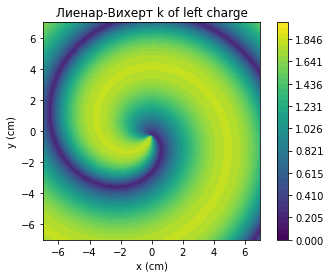

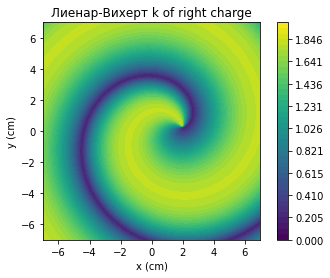

In [15]:
plot_lw(xa_grid, ya_grid, lw=klw_l, title='Лиенар-Вихерт k of left charge',
    levels = np.linspace(0, 2, 40)).show()
plot_lw(xa_grid, ya_grid, lw=klw_r, title='Лиенар-Вихерт k of right charge',
    levels = np.linspace(0, 2, 40)).show()

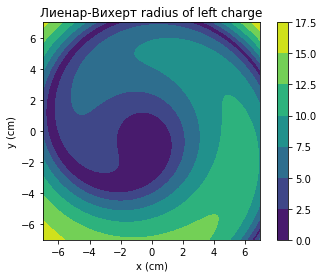

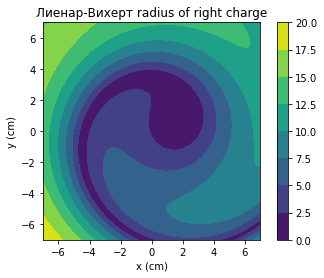

In [16]:
plot_lw(xa_grid, ya_grid, lw=rlw_l, title='Лиенар-Вихерт radius of left charge').show()
plot_lw(xa_grid, ya_grid, lw=rlw_r, title='Лиенар-Вихерт radius of right charge').show()

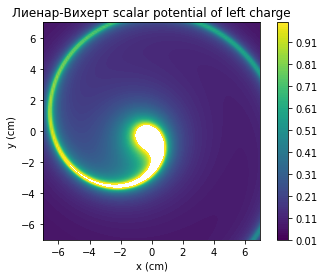

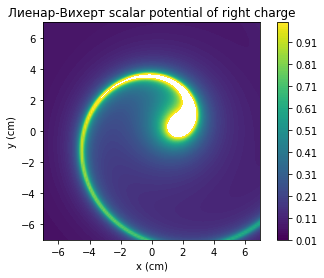

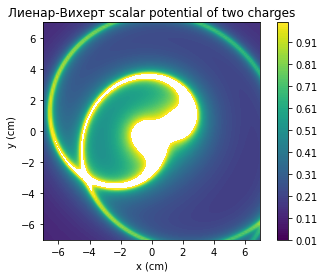

In [17]:
plot_lw(xa_grid, ya_grid, lw=phi_l,
        title='Лиенар-Вихерт scalar potential of left charge',
    levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1))).show()
plot_lw(xa_grid, ya_grid, lw=phi_r,
        title='Лиенар-Вихерт scalar potential of right charge',
    levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1))).show()
plot_lw(xa_grid, ya_grid, lw=s_,
        title='Лиенар-Вихерт scalar potential of two charges',
    levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1))).show()

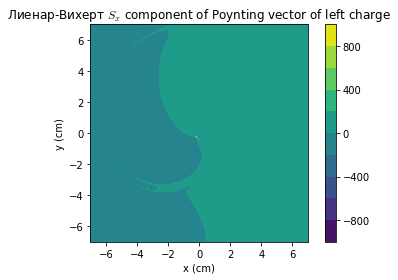

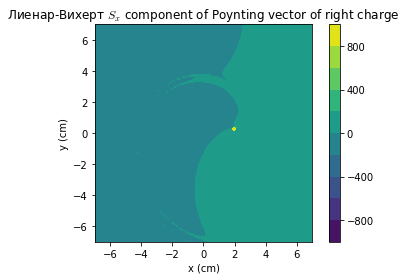

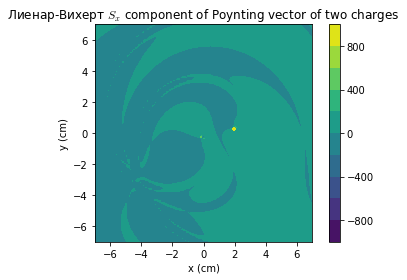

In [18]:
levels = np.linspace(-1000, 1000, 11)
plot_lw(xa_grid, ya_grid, lw=sx_l,
        title='Лиенар-Вихерт $S_x$ component of Poynting vector of left charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sx_r,
        title='Лиенар-Вихерт $S_x$ component of Poynting vector of right charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sx_,
        title='Лиенар-Вихерт $S_x$ component of Poynting vector of two charges',
    levels = levels).show()

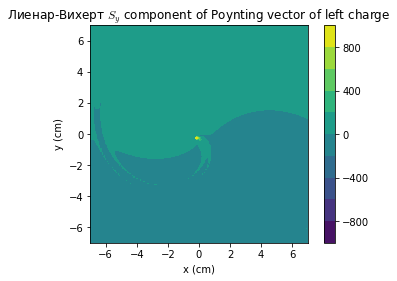

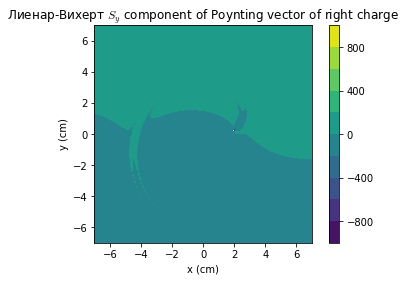

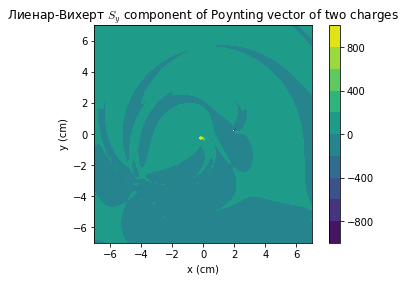

In [19]:
levels = np.linspace(-1000, 1000, 11)
plot_lw(xa_grid, ya_grid, lw=sy_l,
        title='Лиенар-Вихерт $S_y$ component of Poynting vector of left charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sy_r,
        title='Лиенар-Вихерт $S_y$ component of Poynting vector of right charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sy_,
        title='Лиенар-Вихерт $S_y$ component of Poynting vector of two charges',
    levels = levels).show()

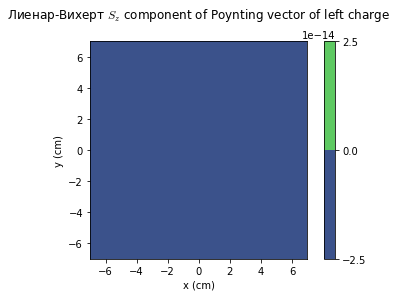

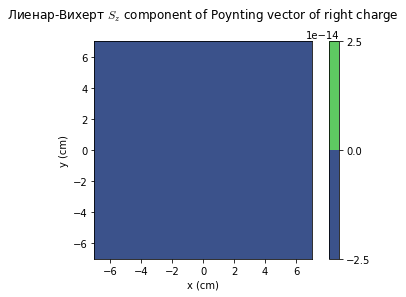

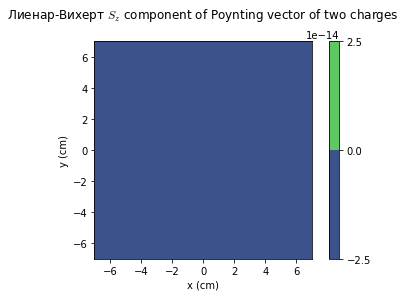

In [20]:
levels = None
plot_lw(xa_grid, ya_grid, lw=sz_l,
        title='Лиенар-Вихерт $S_z$ component of Poynting vector of left charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sz_r,
        title='Лиенар-Вихерт $S_z$ component of Poynting vector of right charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sz_,
        title='Лиенар-Вихерт $S_z$ component of Poynting vector of two charges\n',
    levels = levels).show()

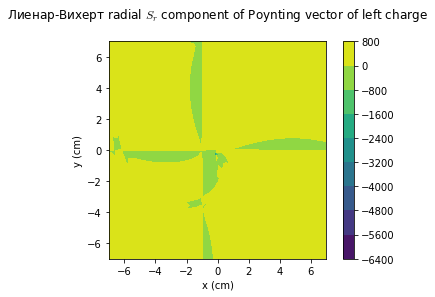

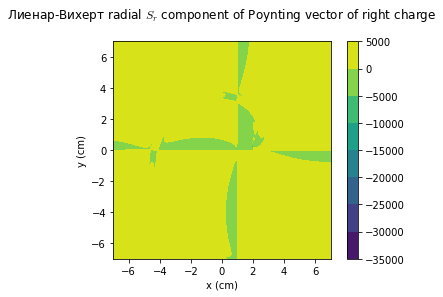

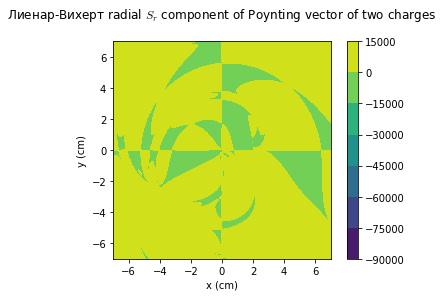

In [21]:
levels = None
plot_lw(xa_grid, ya_grid, lw=sr_l,
        title='Лиенар-Вихерт radial $S_r$ component of Poynting vector of left charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sr_r,
        title='Лиенар-Вихерт radial $S_r$ component of Poynting vector of right charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sr_,
        title='Лиенар-Вихерт radial $S_r$ component of Poynting vector of two charges\n',
    levels = levels).show()

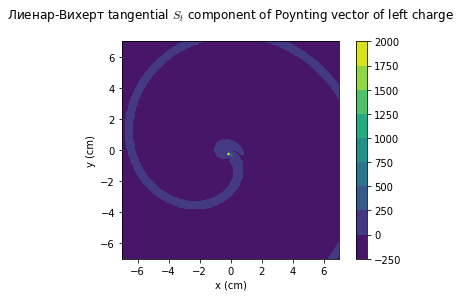

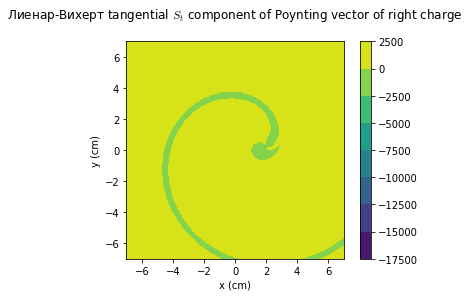

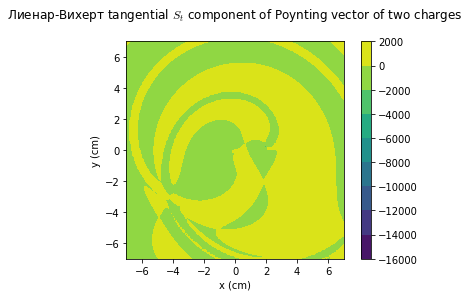

In [22]:
levels = None
plot_lw(xa_grid, ya_grid, lw=st_l,
        title='Лиенар-Вихерт tangential $S_t$ component of Poynting vector of left charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=st_r,
        title='Лиенар-Вихерт tangential $S_t$ component of Poynting vector of right charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=st_,
        title='Лиенар-Вихерт tangential $S_t$ component of Poynting vector of two charges\n',
    levels = levels).show()

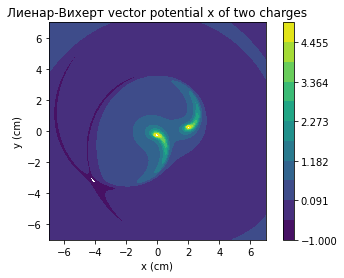

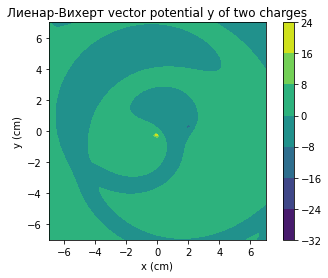

In [23]:
plot_lw(xa_grid, ya_grid, lw=ax_,
        title='Лиенар-Вихерт vector potential x of two charges',
    levels = np.linspace(-1.0, 5, 12)).show()
plot_lw(xa_grid, ya_grid, lw=ay_,
        title='Лиенар-Вихерт vector potential y of two charges').show()

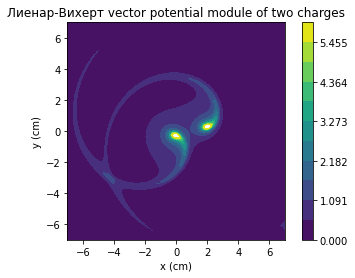

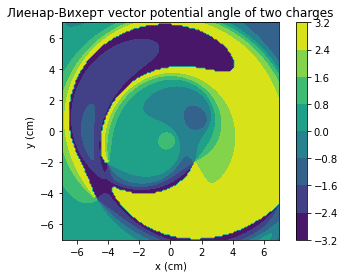

In [24]:
plot_lw(xa_grid, ya_grid, lw=am_,
        title='Лиенар-Вихерт vector potential module of two charges',
    levels = np.linspace(0, 6, 12)).show()
plot_lw(xa_grid, ya_grid, lw=an_,
        title='Лиенар-Вихерт vector potential angle of two charges').show()

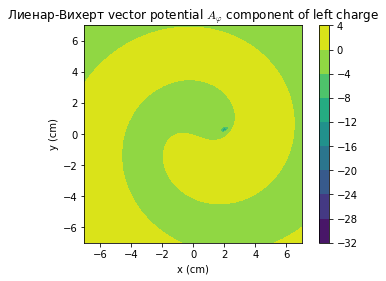

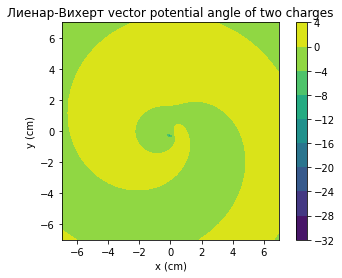

In [25]:
plot_lw(xa_grid, ya_grid, lw=ap_l,
        title='Лиенар-Вихерт vector potential $A_{\\varphi}$ component of left charge',
    levels = np.linspace(-32, 4, 10)).show()
plot_lw(xa_grid, ya_grid, lw=ap_r,
        title='Лиенар-Вихерт vector potential angle of two charges',
       levels = np.linspace(-32, 4, 10)).show()

Теперь интересно рассмотреть зависимость моделируемых величин от времени в течение периода процесса

In [26]:
time_steps_number = 36000              # разбиваем период на шаги
dt = T() / time_steps_number             # длительность шага

In [27]:
calc_sum_F_t(N = 1, t = T()/3,
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0),
              to_log = True)

(1.7954387976359953427e-16, -1.6175365499035583294, 0.0)

In [28]:
t_fx = []
t_fy = []
t_fz = []
t_f_alpha_l = []
t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    (Fx, Fy, Fz, F_alpha_l, F_alpha_r) = calc_sum_F_Falpha_t(N=1, t = t_i)
    # print(i, (i/time_steps_number).n(), t_i, (Fy, F_alpha_l, F_alpha_r))
    t_fx        += [(i/time_steps_number, Fx)]
    t_fy        += [(i/time_steps_number, Fy)]
    t_fz        += [(i/time_steps_number, Fz)]
    t_f_alpha_l += [(i/time_steps_number, F_alpha_l)]
    t_f_alpha_r += [(i/time_steps_number, F_alpha_r)]

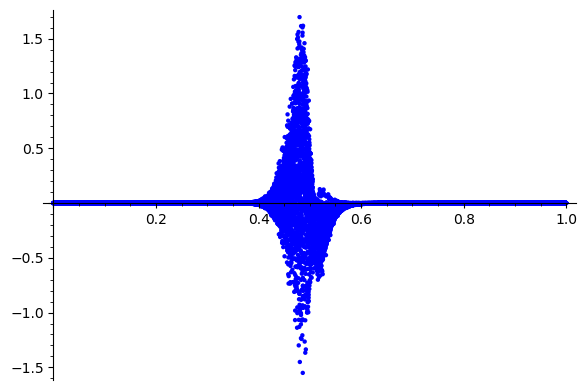

In [29]:
list_plot(t_fx)

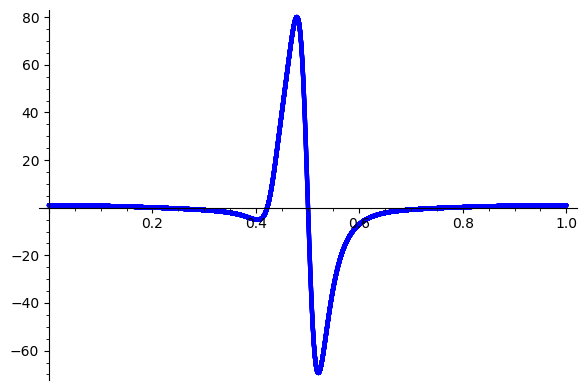

In [30]:
list_plot(t_fy)

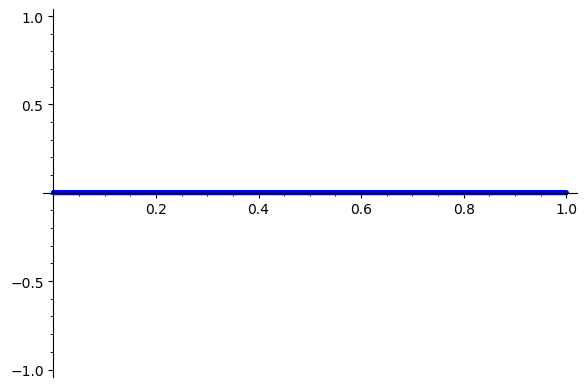

In [31]:
list_plot(t_fz)

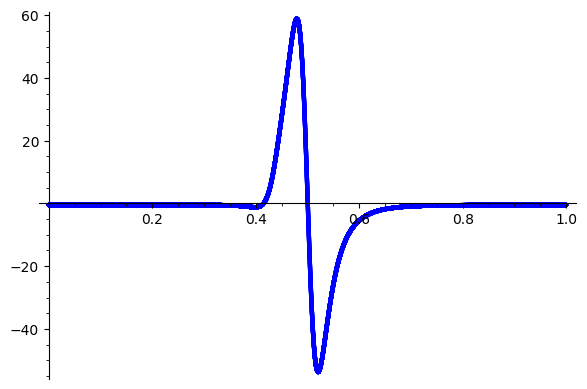

In [32]:
list_plot(t_f_alpha_l)

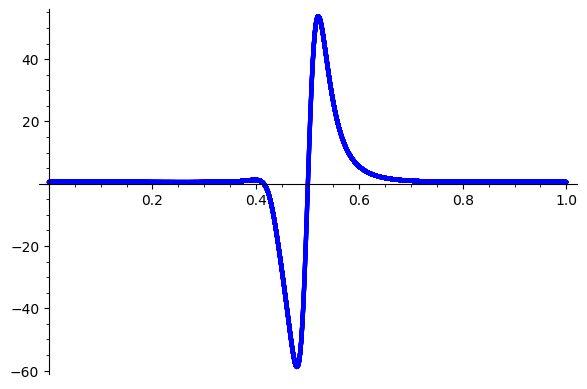

In [33]:
list_plot(t_f_alpha_r)

In [34]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

-1.4559054189181439616

In [35]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T()

-0.18537163527607941046

In [36]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
int_fy = scipy_integrate.quad(lambda t : calc_sum_F_t(N=1, t = t)[1], -T()/2, T()/2,
            epsabs=1.0e-12, epsrel=1.0e-12, limit=500)
int_fy
# (-8.721028191840928e-10, 3.5107927765742514e-09)

/tmp/ipykernel_2044/3887103514.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_fy = scipy_integrate.quad(lambda t : calc_sum_F_t(N=Integer(1), t = t)[Integer(1)], -T()/Integer(2), T()/Integer(2),


(-1.4559054016020867, 1.4336433615204122e-08)

In [37]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
int_fy[0] / T()

-0.18537163307133052425

In [38]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
# суть работа в тещение одного периода, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
sum_A_alpha_l = 0
dl_l = dt * get_omega() * get_R_l()
for (t_i, f) in t_f_alpha_l:
    sum_A_alpha_l += f * dl_l
sum_A_alpha_l

-4.171355812108147028

In [39]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду отнесённая к периоду
# суть мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной

sum_A_alpha_l / T()

-0.5311135175136952446

In [40]:
# интеграл угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
int_A_alpha_l = scipy_integrate.quad(lambda t : calc_sum_F_Falpha_t(N=1, t = t)[3], -T()/2, T()/2,
            epsabs=1.0e-12, epsrel=1.0e-12, limit=500)
int_A_alpha_l
# (-8.721028191840928e-10, 3.5107927765742514e-09)

/tmp/ipykernel_2044/2031992156.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_A_alpha_l = scipy_integrate.quad(lambda t : calc_sum_F_Falpha_t(N=Integer(1), t = t)[Integer(3)], -T()/Integer(2), T()/Integer(2),


(-5.214194770770855, 6.845243772157568e-09)

In [41]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённый к периоду
# мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
int_A_alpha_l[0]/T() * get_omega() * get_R_l()

-0.5311135180877400441

Теперь произведём сравнение углового (отсчитываемого от оси диполя) распределения потока энергии с потоком энергии диполя направленного вдоль оси икс

<p>The time-averaged Poynting vector</p>

${\displaystyle \langle \mathbf {S} \rangle =\left({\frac {\mu _{0}p_{0}^{2}\omega ^{4}}{32\pi ^{2}c}}\right){\frac {\sin ^{2}(\theta )}{r^{2}}}\mathbf {\hat {r}} }$

In [122]:
Poynting_x = lambda theta_x : scipy_integrate.nquad( \
    lambda varphi, t : 
    spherical_x_calc_Poynting_R_t(
        theta = theta_x, varphi = varphi, t = t), \
    [ [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                 varphi                t


In [123]:
theta_x_steps_number = 360            # разбиваем период на шаги
dtheta_x = pi / theta_x_steps_number  # длительность шага

In [ ]:
theta_x_poyting_x = []
for i in range(0, theta_x_steps_number):
    theta_x_i = i * dtheta_x
    poyting_x = Poynting_x(theta_x_i)
    print(theta_x_i, poyting_x)
    theta_x_poyting_x += [(theta_x_i, poyting_x[0])]

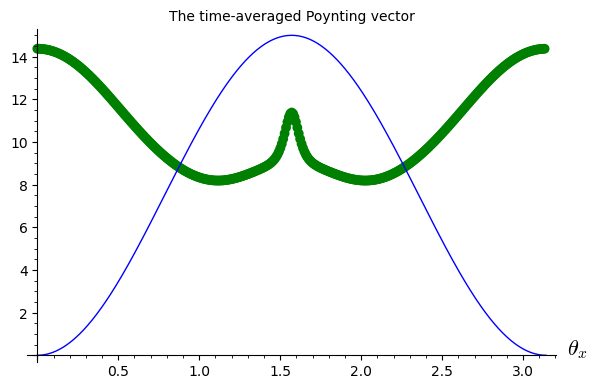

In [130]:
p  = list_plot(theta_x_poyting_x, color="green", pointsize=50)
p += plot(15*sin(x)^2,x,0,pi, color="blue")
p.show(title="The time-averaged Poynting vector",
      axes_labels=["$\\theta_x$", ""])

Теперь рассмотрим зависимость поверхностного интеграла от моделируемых величин от времени в течение периода процесса

In [42]:
#T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 360            # разбиваем период на шаги
dt = T() / time_steps_number       # длительность шага

In [43]:
fn_ = "./results/" \
    + "vc=" + str(get_vc()) \
    + "_Rl=" + str(get_R_l()) \
    + "_S=" + str(get_S()) \
    + "_sphere_R=" + str(get_sphere_R()) \
    + "_tsn="+str(time_steps_number)

In [44]:
fn_mx_up = fn_ + "_stress_tensor_up"
fn_po_up = fn_ + "_poynting_up"

In [45]:
fn_mx_dw = fn_ + "_stress_tensor_dw"
fn_po_dw = fn_ + "_poynting_dw"

In [46]:
fn_mx_ = fn_ + "_stress_tensor"
fn_po_ = fn_ + "_poynting"

In [47]:
Ty_upper_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#           theta       varphi

In [48]:
Ty_down_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#           theta       varphi

In [49]:
Ty_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [50]:
Poynting_upper_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_y_calc_Poynting_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta       varphi

In [51]:
Poynting_down_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_y_calc_Poynting_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta        varphi

In [52]:
Poynting_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_y_calc_Poynting_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [53]:
t_Ty = []
t_Ty_up = []
t_Ty_dw = []
t_po = []
t_po_up = []
t_po_dw = []

sum_Ty = 0
sum_Ty_up = 0
sum_Ty_dw = 0
sum_po = 0
sum_po_up = 0
sum_po_dw = 0


for i in range(0, time_steps_number):
    t_i = i * dt

    Ty_dw = Ty_down_half_sphere_R_t(t_i)
    sum_Ty_dw += Ty_dw[0] * dt / T()

    file_dw = open(fn_mx_dw, 'a')
    file_dw.write(str(i)
                  + " "
                  + str((i/time_steps_number).n())
                  + " " + str(Ty_dw)
                  + " " + str(sum_Ty_dw)
                  + "\n")
    file_dw.close()

    po_dw = Poynting_down_half_sphere_R_t(t_i)
    sum_po_dw += po_dw[0] * dt / T()

    file_dw = open(fn_po_dw, 'a')
    file_dw.write(str(i)
                  + " "
                  + str((i/time_steps_number).n())
                  + " " + str(po_dw)
                  + " " + str(sum_po_dw)
                  + "\n")
    file_dw.close()

    Ty_up = Ty_upper_half_sphere_R_t(t_i)
    sum_Ty_up += Ty_up[0] * dt / T()

    file_up = open(fn_mx_up, 'a')
    file_up.write(str(i)
                  + " " + str((i/time_steps_number).n())
                  + " " + str(Ty_up)
                  + " " + str(sum_Ty_up)
                  + "\n")
    file_up.close()

    po_up = Poynting_upper_half_sphere_R_t(t_i)
    sum_po_up += po_up[0] * dt / T()

    file_up = open(fn_po_up, 'a')
    file_up.write(str(i)
                  + " " + str((i/time_steps_number).n())
                  + " " + str(po_up)
                  + " " + str(sum_po_up)
                  + "\n")
    file_up.close()

    sum_Ty += (Ty_up[0]+Ty_dw[0]) * dt / T()
    sum_po += (po_up[0]+po_dw[0]) * dt / T()

    file_ = open(fn_mx_, 'a')
    file_.write(str(i)
                + " " + str((i/time_steps_number).n())
                + " " + str(Ty_up[0]+Ty_dw[0])
                + " " + str(sum_Ty)
                + "\n")
    file_.close()

    file_ = open(fn_po_, 'a')
    file_.write(str(i)
                + " " + str((i/time_steps_number).n())
                + " " + str(po_up[0]+po_dw[0])
                + " " + str(sum_po)
                + "\n")
    file_.close()

    t_Ty_up += [(i/time_steps_number, Ty_up[0])]
    t_Ty_dw += [(i/time_steps_number, Ty_dw[0])]
    t_Ty    += [(i/time_steps_number, Ty_up[0]+Ty_dw[0])]    
    t_po_up += [(i/time_steps_number, po_up[0])]
    t_po_dw += [(i/time_steps_number, po_dw[0])]
    t_po    += [(i/time_steps_number, po_up[0]+po_dw[0])]

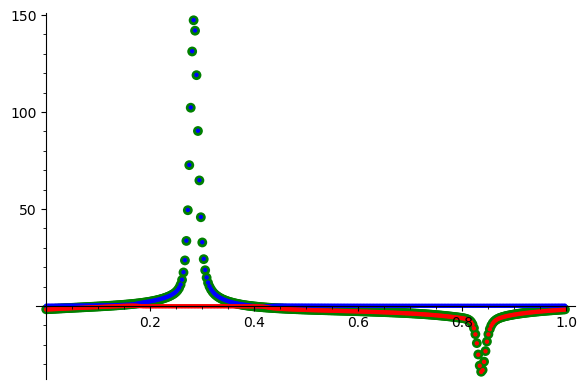

In [54]:
p  = list_plot(t_Ty, color="green", pointsize=50)
p += list_plot(t_Ty_up, color="blue")
p += list_plot(t_Ty_dw, color="red")
p.show()

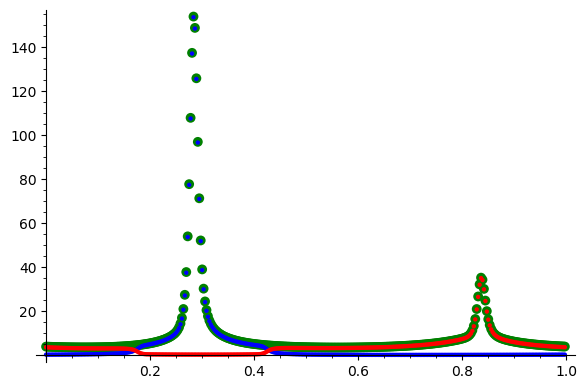

In [55]:
p  = list_plot(t_po, color="green", pointsize=50)
p += list_plot(t_po_up, color="blue")
p += list_plot(t_po_dw, color="red")
p.show()

In [56]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_Ty = 0
for (t_i, Ty) in t_Ty:
    sum_Ty += Ty * dt
sum_Ty

8.9802303304982472685

In [57]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_Ty / T()

1.1433984377620488977

In [58]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T()

-0.18537163527607941046

In [59]:
sum_Ty/sum_fy

-6.1681412911913523684

In [60]:
# интегральная сумма количества энергии излучения
# протекающей через поверхность воображаемой сферы по периоду
sum_po = 0
for (t_i, po) in t_po:
    sum_po += po * dt
sum_po

71.029081306549299524

In [61]:
# интегральная сумма количества энергии излучения
# протекающей через поверхность воображаемой сферы
# по периоду отнесённая к периоду
sum_po / T()

9.043703514570769309

In [62]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду отнесённая к периоду
# суть мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной

sum_A_alpha_l / T()

-0.5311135175136952446

In [63]:
sum_po/sum_A_alpha_l

-17.027816495628110609

In [64]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_Ty_up = 0
for (t_i, Ty) in t_Ty_up:
    sum_Ty_up += Ty * dt
sum_Ty_up

30.963863648990054288

In [65]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_Ty_up / T()

3.942441565568175368

In [66]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_Ty_dw = 0
for (t_i, Ty) in t_Ty_dw:
    sum_Ty_dw += Ty * dt
sum_Ty_dw

-21.983633318491807258

In [67]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_Ty_dw / T()

-2.7990431278061265006

Теперь расчитаем тройной интеграл (по поверхности интегрировния и по времени в течение периода) для моделируемых величин для случая $v/c = 0.8$

In [68]:
set_vc(np.float128(0.8))

In [69]:
# интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду

Ty_R_upper_half_sphere = scipy_integrate.nquad( \
    lambda theta, varphi, t : \
    spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
    [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                theta                  varphi                t

In [70]:
# интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду

Ty_R_upper_half_sphere
# 'epsabs' : 1.0e-01, 'epsrel' : 1.0e-03, 'limit'  : 100
# (-5.619771707649721, 0.09951167416151144)
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (-5.619810340078861, 2.5359979462970916e-07)

(30.963863664374845, 1.071077161896028e-05)

In [71]:
# интеграл количества энергии излучения протекающей через поверхность верхней воображаемой полусферы по периоду

Poynting_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_y_calc_Poynting_R_t, \
    [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                theta                  varphi                t

In [72]:
Poynting_R_upper_half_sphere

(40.24349060114713, 1.2685701093473334e-05)

In [73]:
# интеграл силы приложенной к поверхности нижней воображаемой полусферы по периоду

Ty_R_down_half_sphere = scipy_integrate.nquad( \
    lambda theta, varphi, t : \
    spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
    [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                theta                            varphi                   t

In [74]:
# интеграл силы приложенной к поверхности нижней воображаемой полусферы по периоду
Ty_R_down_half_sphere
# 'epsabs' : 1.0e-01, 'epsrel' : 1.0e-03, 'limit'  : 100
# (3.8978874205212657, 0.09897620978994888)
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (3.8975436700805086, 1.3240039717966676e-07)

(-21.98363331620453, 1.6468683916234794e-06)

In [75]:
# интеграл количества энергии излучения протекающей через поверхность нижней воображаемой полусферы по периоду

Poynting_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_y_calc_Poynting_R_t, \
    [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                theta                            varphi                   t

In [76]:
Poynting_R_down_half_sphere

(30.785590716954793, 2.667187089702705e-06)

In [77]:
Poynting_R_upper_half_sphere[0]+Poynting_R_down_half_sphere[0]

71.02908131810193

In [78]:
Ty_R_upper_half_sphere[0] + Ty_R_down_half_sphere[0]

8.980230348170316

In [79]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду

Ty_R = scipy_integrate.nquad( \
    lambda theta, varphi, t : \
    spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
    [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                theta                  varphi              t

In [80]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду
Ty_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

# './results/stress_tensor_vc=0.8_Rl=10.0_S=0.5_sphere_R=61.5_tsn=3600'
# -1.7222666724181730717
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (-1.7222666701014222, 1.4259473161124864e-07)
# (-1.7222666701014226, 1.4259473243003793e-07)

# './results/stress_tensor_vc=0.8_Rl=1.0_S=0.05_sphere_R=6.1499999999999995_tsn=3600'
# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 100
# (-17.22266669994365, 1.4259473519176882e-05)

(8.980230360402375, 1.375376790926511e-05)

In [81]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду отнесённый к периоду
Ty_R[0] / T()

1.1433984415695607226

In [82]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
int_fy

(-1.4559054016020867, 1.4336433615204122e-08)

In [83]:
# интеграл силы приложенной к поверхности воображаемой сферы по периоду
# отнесённый к
# интегралу компоненты силы по оси y, приложенной к зарядам, по периоду
Ty_R[0]/int_fy[0]

-6.168141385093069

In [84]:
# интеграл количества энергии излучения протекающей через поверхность воображаемой сферы

Poynting_R = scipy_integrate.nquad( \
    spherical_y_calc_Poynting_R_t, \
    [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
#                theta                  varphi              t

In [85]:
Poynting_R

(71.02908131744606, 1.2679730142517442e-05)

In [86]:
Poynting_R[0] / T()

9.0437035159581875225

In [87]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённый к периоду
# мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
int_A_alpha_l[0]/T() * get_omega() * get_R_l()

-0.5311135180877400441

Теперь рассмотрим зависимость тройного интеграла (по поверхности интегрировния и по времени в течение периода) для моделируемых величин при различных соотношениях $v/c$

In [88]:
arr_vc = [
    0.00010, 
    0.00011, 
    0.00012, 
    0.00013, 
    0.00014, 
    0.00015, 
    0.00016, 
    0.00017, 
    0.00018, 
    0.00019, 
    0.00020, 
    0.00021, 
    0.00022, 
    0.00023, 
    0.00024, 
    0.00025, 
    0.00026, 
    0.00027, 
    0.00028, 
    0.00029, 
    0.00030, 
    0.00031, 
    0.00032, 
    0.00033, 
    0.00034, 
    0.00035, 
    0.00036, 
    0.00037, 
    0.00038, 
    0.00039, 
    0.00040, 
    0.00041, 
    0.00042, 
    0.00043, 
    0.00044, 
    0.00045, 
    0.00046, 
    0.00047, 
    0.00048, 
    0.00049, 
    0.00050, 
    0.00051, 
    0.00052, 
    0.00053, 
    0.00054, 
    0.00055, 
    0.00056, 
    0.00057, 
    0.00058, 
    0.00059, 
    0.00060, 
    0.00065, 
    0.00070, 
    0.00071, 
    0.00072, 
    0.00073, 
    0.00074, 
    0.00075, 
    0.00076, 
    0.00077, 
    0.00078, 
    0.00079, 
    0.00080, 
    0.00081, 
    0.00082, 
    0.00083, 
    0.00084, 
    0.00085, 
    0.00086, 
    0.00087, 
    0.00088, 
    0.00089, 
    0.00090, 
    0.00091, 
    0.00092, 
    0.00093, 
    0.00094, 
    0.00095, 
    0.00096, 
    0.00097, 
    0.00098, 
    0.00099, 
    0.0010, 
    0.0011, 
    0.0012, 
    0.0013, 
    0.0014, 
    0.0015, 
    0.0016, 
    0.0017, 
    0.0018, 
    0.0019, 
    0.0020, 
    0.0021, 
    0.0022, 
    0.0023, 
    0.0024, 
    0.0025, 
    0.0026, 
    0.0027, 
    0.0028, 
    0.0029, 
    0.0030, 
    0.0031, 
    0.0032, 
    0.0033, 
    0.0034, 
    0.0035, 
    0.0036, 
    0.0037, 
    0.0038, 
    0.0039, 
    0.004, 
    0.0045, 
    0.005, 
    0.0055, 
    0.006, 
    0.0065, 
    0.007, 
    0.0075, 
    0.008, 
    0.0085, 
    0.009, 
    0.0095, 
    0.01, 
    0.02, 
    0.03,
    0.04,
    0.05,
    0.06,
    0.07,
    0.08,
    0.09,
    0.10,
    0.11,
    0.12,
    0.13,
    0.14,
    0.15,
    0.16,
    0.17,
    0.18,
    0.19,
    0.20,
    0.21,
    0.22,
    0.23,
    0.24,
    0.25,
    0.30,
    0.40,
    0.50,
    0.60,
    0.70,
    0.80,
]

In [89]:
fn_vc = "./results/stress_tensor_vc" \
    + "_Rl=" + str(get_R_l()) \
    + "_S=" + str(get_S()) \
    + "_sphere_R=" + str(get_sphere_R())
fn_vc_prec = "./results/stress_tensor_vcprec" \
    + "_Rl=" + str(get_R_l()) \
    + "_S=" + str(get_S()) \
    + "_sphere_R=" + str(get_sphere_R())

In [90]:
f_vc = []
def calc_f_vc(N, logging = False):
    set_c(1.0)

    for vc in arr_vc:
        set_vc(vc)
        # интеграл силы по периоду
        
        # интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
        int_fx = scipy_integrate.quad(lambda t : calc_sum_F_t(N=N, t = t)[0], -T()/2, T()/2,
                                      epsabs=1.0e-12, epsrel=1.0e-12, limit=500)
        
        # интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
        int_fy = scipy_integrate.quad(lambda t : calc_sum_F_t(N=N, t = t)[1], -T()/2, T()/2,
                                      epsabs=1.0e-12, epsrel=1.0e-12, limit=500)
        # интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду
        Ty_R_upper_half_sphere = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)

        # интеграл силы приложенной к поверхности нижней воображаемой полусферы по периоду
        Ty_R_down_half_sphere = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        
        # интеграл силы приложенной к поверхности воображаемой сферы по периоду
        Ty_R = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi
        Tx_R = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[0], \
            [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi
        
        # интеграл угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
        int_A_alpha_l = scipy_integrate.quad(lambda t : calc_sum_F_Falpha_t(N=1, t = t)[3], -T()/2, T()/2,
            epsabs=1.0e-12, epsrel=1.0e-12, limit=500)
        
        # интеграл количества энергии излучения протекающей через поверхность верхней воображаемой полусферы по периоду
        Poynting_R_upper_half_sphere = scipy_integrate.nquad( \
            spherical_y_calc_Poynting_R_t, \
                [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi                t

        # интеграл количества энергии излучения протекающей через поверхность нижней воображаемой полусферы по периоду
        Poynting_R_down_half_sphere = scipy_integrate.nquad( \
            spherical_y_calc_Poynting_R_t, \
                [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                            varphi 

        # интеграл количества энергии излучения протекающей через поверхность воображаемой сферы

        Poynting_R = scipy_integrate.nquad( \
            spherical_y_calc_Poynting_R_t, \
                [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi                   t

        Nx = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Nxyz_R_t(theta = theta, varphi = varphi, t = t)[0], \
            [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi                   t
        Ny = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Nxyz_R_t(theta = theta, varphi = varphi, t = t)[1], \
                [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi                   t
        Nz = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Nxyz_R_t(theta = theta, varphi = varphi, t = t)[2], \
                [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi                   t
        
        # интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённый к периоду
        # мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
        pw = int_A_alpha_l[0]/T() * get_omega() * get_R_l()
        pw *= 2 # мощность, затрачиваемая двигателем на поддержание угловой скорости 2х колес
        
        # Полное дипольное излучение
        I_dipol = 4 / (3 * get_c()^3) * get_omega()^4 * get_R_l()^2 # *get_e()^2
        
        if logging:

            print("vc=", vc,
                  "fx=", int_fx, int_fx[0]/T(),
                  "fy=", int_fy, int_fy[0]/T(),
                  "Tx=", Tx_R, Tx_R[0]/T(),
                  "Ty_up=", Ty_R_upper_half_sphere,
                  Ty_R_upper_half_sphere[0]/T(),
                  "Ty_dw=", Ty_R_down_half_sphere,
                  Ty_R_down_half_sphere[0]/T(),
                  "Ty=", Ty_R, Ty_R[0]/T(),
                  "A_l=", int_A_alpha_l,
                  "pw=", pw,
                  "s_up=", Poynting_R_upper_half_sphere,
                  Poynting_R_upper_half_sphere[0]/T(),
                  "s_dw=", Poynting_R_down_half_sphere,
                  Poynting_R_down_half_sphere[0]/T(),
                  "s=", Poynting_R, Poynting_R[0]/T(),
                  "Nx=", Nx, Nx[0]/T(),
                  "Ny=", Ny, Ny[0]/T(),
                  "Nz=", Nz, Nz[0]/T(),
                  "I_dipol=", I_dipol
                 )

            #vc, fy, py_up, py_dw, py
            s_vc = "vc = %f " \
                "fx = %0.32e " \
                "fy = %0.32e " \
                "Tx= %0.32e " \
                "Ty_up= %0.32e " \
                "Ty_dw= %0.32e " \
                "Ty= %0.32e " \
                "py+fy= %0.32e " \
                "py/fy= %0.32e " \
                "pw = %0.32e " \
                "s_up= %0.32e " \
                "s_dw= %0.32e " \
                "s= %0.32e\n" \
                "I_dipol= %0.32e\n" \
              % (vc,
                 int_fx[0]/T(),
                 int_fy[0]/T(),
                 Tx_R[0]/T(),
                 Ty_R_upper_half_sphere[0]/T(),
                 Ty_R_down_half_sphere[0]/T(),
                 Ty_R[0]/T(),
                 (Ty_R[0] + int_fy[0])/T(),
                 (Ty_R[0]/int_fy[0]),
                 pw,
                 Poynting_R_upper_half_sphere[0]/T(),
                 Poynting_R_down_half_sphere[0]/T(),
                 Poynting_R[0]/T(),
                 I_dipol
                )

            file_vc = open(fn_vc, 'a')
            file_vc.write(s_vc)
            file_vc.close()

            s_vc_prec = str(("vc=", vc,
                  "fx=", int_fx, 
                  "fy=", int_fy, 
                  "Ty_up=", Ty_R_upper_half_sphere,
                  "Ty_dw=", Ty_R_down_half_sphere,
                  "Ty=", Ty_R,
                  "A_l=", int_A_alpha_l,
                  "s_up=", Poynting_R_upper_half_sphere,
                  "s_dw=", Poynting_R_down_half_sphere,
                  "s=", Poynting_R,
                  "I_dipol=", I_dipol
                 ))

            file_vc_prec = open(fn_vc_prec, 'a')
            file_vc_prec.write(s_vc_prec)
            file_vc_prec.close()
        
        global f_vc

        f_vc += [(vc,
                  int_fx[0]/T(),
                  int_fy[0]/T(),
                  Tx_R[0]/T(),
                  Ty_R_upper_half_sphere[0]/T(),
                  Ty_R_down_half_sphere[0]/T(),
                  Ty_R[0]/T(),
                  pw,
                  Poynting_R_upper_half_sphere[0]/T(),
                  Poynting_R_down_half_sphere[0]/T(),
                  Poynting_R[0]/T(),
                  Nx[0]/T(),
                  Ny[0]/T(),
                  Nz[0]/T(),
                  I_dipol
                 )]

In [91]:
f_vc = []
calc_f_vc(N=1)

/tmp/ipykernel_2044/4163019769.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int_fx = scipy_integrate.quad(lambda t : calc_sum_F_t(N=N, t = t)[Integer(0)], -T()/Integer(2), T()/Integer(2),
/tmp/ipykernel_2044/4163019769.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_A_alpha_l = scipy_integrate.quad(lambda t : calc_sum_F_Falpha_t(N=Integer(1), t = t)[Integer(3)], -T()/Integer(2), T()/Integer(2),
/tmp/ipykernel_2044/4163019769.py:10: IntegrationWarning: The maximum number of subdivisions (500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on th

In [92]:
def latex_arr1(f_vc, titles):
    ltx = "\\begin{array}{"
    for title in titles:
        ltx += 'c'
    ltx += "} "
    ititle = 0
    for title in titles:
        ltx += title
        if ititle < len(titles) - 1:
            ltx += " & "
        else:
            ltx += " \\\\"
        ititle += 1
    for (vc, fx, fy, Tx, Ty_up, Ty_dw, Ty, pw, s_up, s_dw, s, Nx, Ny, Nz, I_dipol) in f_vc:
        ltx += " "
        ltx += "{:.5f} ".format(vc)
        ltx += " & "
        ltx += "{:.3e}".format(fy)
        ltx += " & "
        ltx += "{:.6e}".format(Ty_up)
        ltx += " & "
        ltx += "{:.6e}".format(Ty_dw)
        ltx += " & "
        ltx += "{:.3e}".format(Ty)
        ltx += " & "
        ltx += "{:.3e}".format(Ty/fy)
        ltx += " & "
        ltx += "{:.3e}".format(fy+Ty)
        ltx += " \\\\" 
    ltx += "\\end{array}"
    return ltx

In [93]:
def latex_arr2(f_vc, titles):
    ltx = "\\begin{array}{"
    for title in titles:
        ltx += 'c'
    ltx += "} "
    ititle = 0
    for title in titles:
        ltx += title
        if ititle < len(titles) - 1:
            ltx += " & "
        else:
            ltx += " \\\\"
        ititle += 1
    for (vc, fx, fy, Tx, Ty_up, Ty_dw, Ty, pw, s_up, s_dw, s, Nx, Ny, Nz, I_dipol) in f_vc:
        ltx += " "
        ltx += "{:.5f} ".format(vc)
        ltx += " & "
        ltx += "{:.3e}".format(pw)
        ltx += " & "
        ltx += "{:.3e}".format(I_dipol)
        ltx += " & "
        ltx += "{:.3e}".format(s)
        ltx += " & "
        ltx += "{:.3e}".format(s_up)
        ltx += " & "
        ltx += "{:.3e}".format(s_dw)
        ltx += " \\\\" 
    ltx += "\\end{array}"
    return ltx

In [94]:
from IPython.display import display, Math, Latex
titles = ["\\frac{v}{c}","f_y",
          "T_y^{up}=\\int\\limits_{S_{up}}^{} T_{yn}",
          "T_y^{dw}=\\int\\limits_{S_{dw}}^{} T_{yn}",
          "T_y=\\int\\limits_{S}^{} T_{yn} dS",
          "\\frac{T_y}{f_y}",
          "{f_y}+{T_y}",
         ]
ltx = latex_arr1(f_vc, titles)
display(Math(ltx))

<IPython.core.display.Math object>

In [95]:
from IPython.display import display, Math, Latex
titles = ["\\frac{v}{c}",
          "pw=\\oint \\vec f d\\vec l",
          "I_{dipol}=\\frac{2}{3\\,c^3} \\ddot{\\vec{d^2}}",
          "s=\\int\\limits_{S}^{} \\vec S_{Poynt} d \\vec S",
          "s=\\int\\limits_{S_{up}}^{} \\vec S_{Poynt} d \\vec S",
          "s=\\int\\limits_{S_{dw}}^{} \\vec S_{Poynt} d \\vec S",
         ]
ltx = latex_arr2(f_vc, titles)
display(Math(ltx))

<IPython.core.display.Math object>

In [96]:
vc_fx = []
vc_fy = []

vc_Tx = []

vc_Ty_up = []
vc_Ty_dw = []
vc_Ty = []

vc_Ty_fy = []
vc_fy_Ty = []
vc_Tyfy = []

vc_pw = []
vc_s_up = []
vc_s_dw = []
vc_s = []

vc_s_pw = []
vc_pw_s = []
vc_spw = []

vc_I_dipol = []
vc_Nx = []
vc_Ny = []
vc_Nz = []

vc_Idipol_pw = []
vc_pw_Idipol = [] 

vc_Idipol_s = []
vc_s_Idipol = [] 

def plot_lst(f_vc, min_vc, max_vc):
    global vc_fx
    global vc_fy
    global vc_Tx
    global vc_Ty_up
    global vc_Ty_dw
    global vc_Ty

    global vc_Ty_fy
    global vc_fy_Ty
    global vc_Tynfy

    global vc_pw
    global vc_s_up
    global vc_s_dw
    global vc_s

    global vc_s_pw
    global vc_pw_s
    global vc_spw
    
    global vc_I_dipol
    global vc_Nx
    global vc_Ny
    global vc_Nz
    
    global vc_Idipol_pw
    global vc_pw_Idipol
    
    global vc_Idipol_s
    global vc_s_Idipol
    
    vc_fx = []
    vc_fy = []
    vc_Tx = []
    vc_Ty_up = []
    vc_Ty_dw = []
    vc_Ty = []

    vc_Ty_fy = []
    vc_fy_Ty = []
    vc_Tyfy = []

    vc_pw = []
    vc_s_up = []
    vc_s_dw = []
    vc_s = []

    vc_s_pw = []
    vc_pw_s = []
    vc_spw = []
    
    vc_I_dipol = []
    vc_Nx = []
    vc_Ny = []
    vc_Nz = []
    
    vc_Idipol_pw = []
    vc_pw_Idipol = []
    vc_Idipol_s = []
    vc_s_Idipol = [] 


    for (vc, fx, fy, Tx, Ty_up, Ty_dw, Ty, pw, s_up, s_dw, s, Nx, Ny, Nz, I_dipol) in f_vc:

        if vc < min_vc:
            continue
        if vc > max_vc:
            break
        vc_fx    += [(vc, fx)]
        vc_fy    += [(vc, fy)]
        vc_Tx    += [(vc, Ty)]
        vc_Ty_up += [(vc, Ty_up)]
        vc_Ty_dw += [(vc, Ty_dw)]
        vc_Ty    += [(vc, Ty)]

        vc_Ty_fy += [(vc, Ty/fy)]
        vc_fy_Ty += [(vc, fy/Ty)]
        vc_Tyfy  += [(vc, fy+Ty)]

        vc_pw    += [(vc, pw)]
        vc_s_up += [(vc, s_up)]
        vc_s_dw += [(vc, s_dw)]
        vc_s    += [(vc, s)]
        
        vc_pw_s += [(vc, pw/s)]
        vc_s_pw += [(vc, s/pw)]
        vc_spw  += [(vc, s+pw)]
        
        vc_I_dipol += [(vc, I_dipol)]
        vc_Nx += [(vc, Nz)]
        vc_Ny += [(vc, Nz)]
        vc_Nz += [(vc, Nz)]

        vc_pw_Idipol += [(vc, pw/I_dipol)]
        vc_Idipol_pw += [(vc, I_dipol/pw)]
        
        vc_s_Idipol += [(vc, s/I_dipol)]
        vc_Idipol_s += [(vc, I_dipol/s)]

Рассмотрим результат вычислений относящийся к проверке закона сохранения импульса

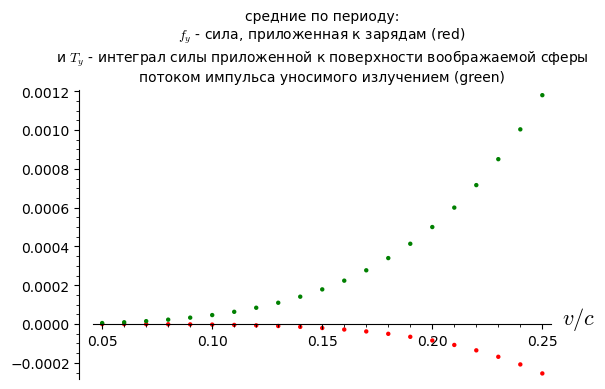

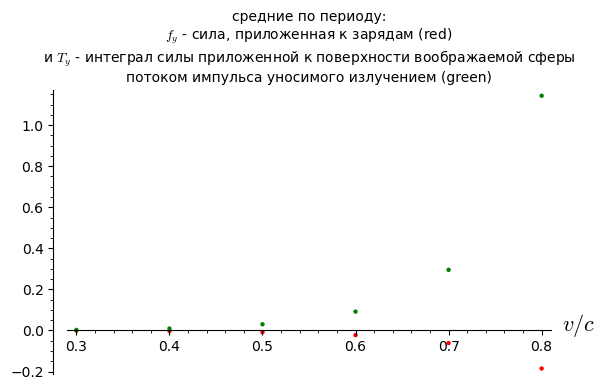

In [97]:
for min_vc, max_vc in [(0.05, 0.25), (0.3, 1)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)
    p = list_plot(vc_fy, color = "red")
    p += list_plot(vc_Ty, color = "green")
    p.show(title="средние по периоду:\n"
           "$f_y$ - сила, приложенная к зарядам (red)\n"
           "и $T_y$ - интеграл силы приложенной к поверхности воображаемой сферы\n"
           "потоком импульса уносимого излучением (green)",
          axes_labels=["$v/c$", ""])

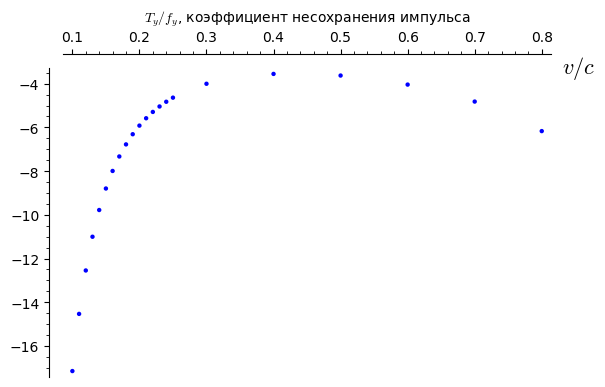

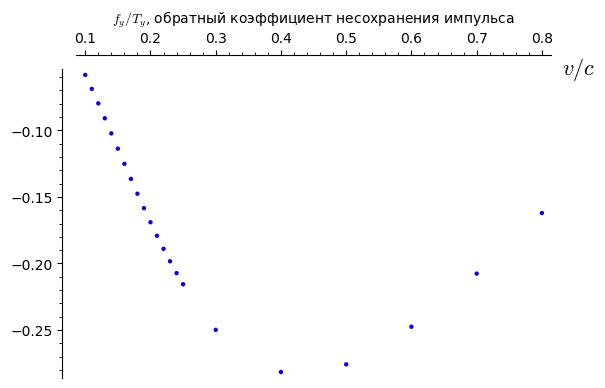

In [98]:
plot_lst(f_vc, min_vc=0.1, max_vc=1)
list_plot(vc_Ty_fy).show(title="$T_y/f_y$, коэффициент несохранения импульса",
          axes_labels=["$v/c$", ""])
list_plot(vc_fy_Ty).show(title="$f_y/T_y$, обратный коэффициент несохранения импульса",
          axes_labels=["$v/c$", ""])

Рассмотрим более детально поведение среднего по периоду интеграла количества импульса,
вытекающего в единицу времени из объема воображаемой сферы (вычисленного через тензор натяжения Максвелла), сравнивая результаты его интегрирования 
по верхней и по нижней воображаемым полусферам

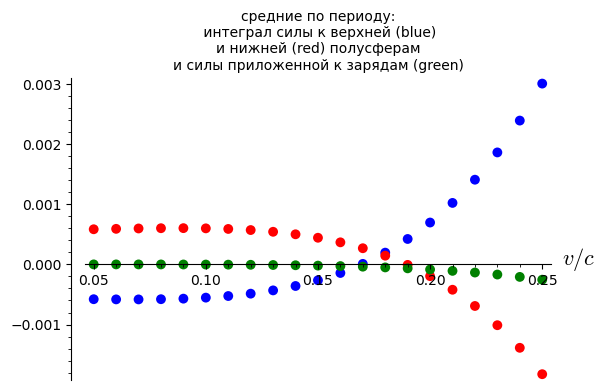

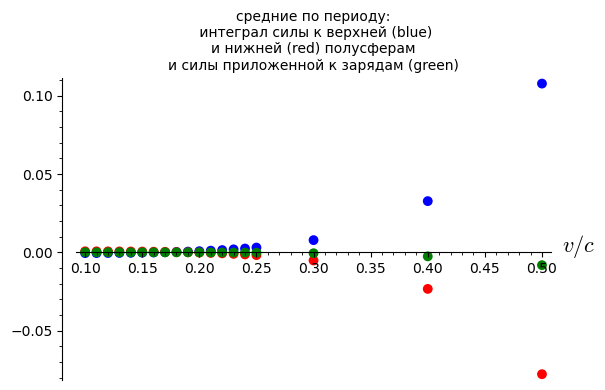

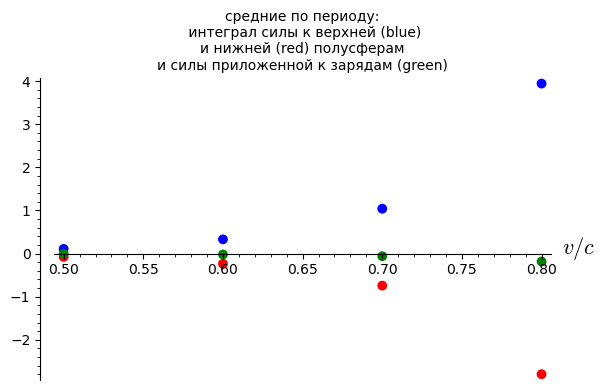

In [99]:
for min_vc, max_vc in [(0.05, 0.25), (0.1, 0.5), (0.5, 1)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)

    p  = list_plot(vc_Ty_up[:], color="blue", pointsize=50)
    p += list_plot(vc_Ty_dw[:], color="red", pointsize=50)
    p += list_plot(vc_fy[:], color="green", pointsize=50)
    p.show(title="средние по периоду:\n интеграл силы к верхней (blue)\n"
           "и нижней (red) полусферам\n"
           "и силы приложенной к зарядам (green)",
              axes_labels=["$v/c$", ""])

Теперь рассмотрим результат вычислений относящийся к проверке закона сохранения энергии

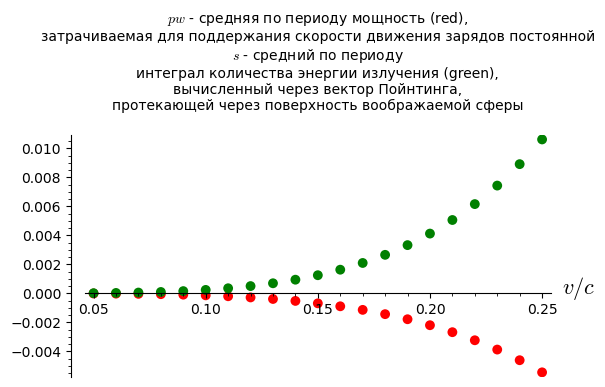

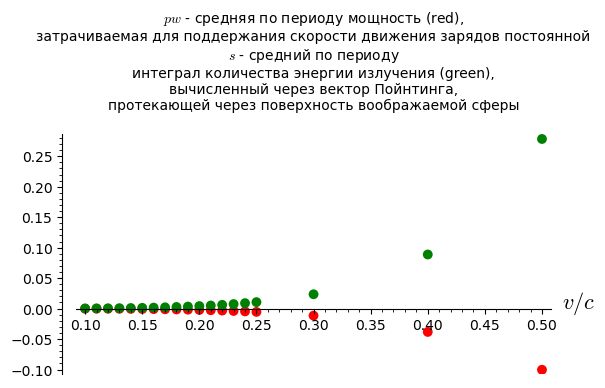

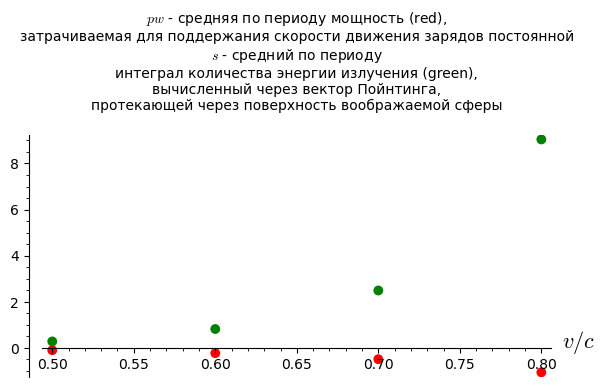

In [100]:
for min_vc, max_vc in [(0.05, 0.25), (0.1, 0.5), (0.5, 1)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)
    p = list_plot(vc_pw[:], color="red", pointsize=50)
    p+= list_plot(vc_s[:], color="green", pointsize=50)
    p.show(title="$pw$ - средняя по периоду мощность (red),\n"
           "затрачиваемая для поддержания скорости движения зарядов постоянной\n"
           "$s$ - средний по периоду\n"
           "интеграл количества энергии излучения (green),\n"
           "вычисленный через вектор Пойнтинга,\n"
           "протекающей через поверхность воображаемой сферы\n",
          axes_labels=["$v/c$", ""])

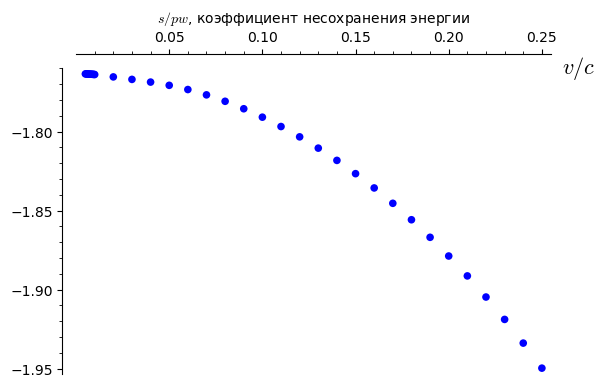

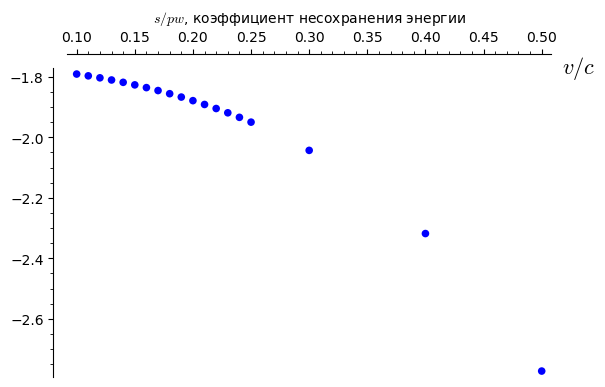

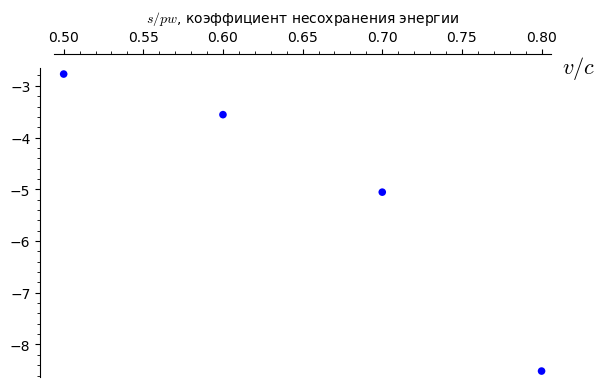

In [101]:
for min_vc, max_vc in [(0.005, 0.25), (0.1, 0.5), (0.5, 1)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)
    list_plot(vc_s_pw, pointsize=30).show(title="$s/pw$, коэффициент несохранения энергии",
              axes_labels=["$v/c$", ""])

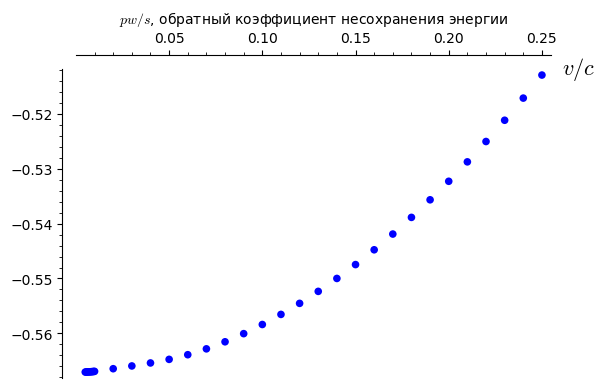

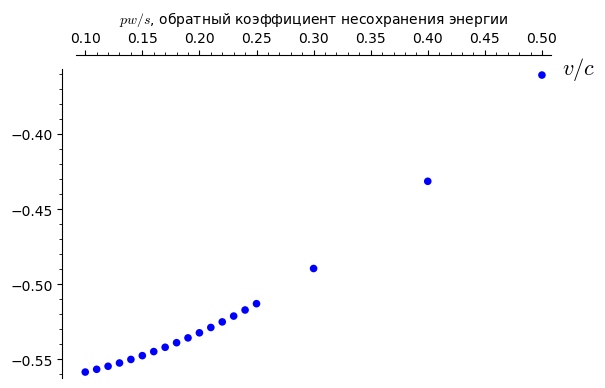

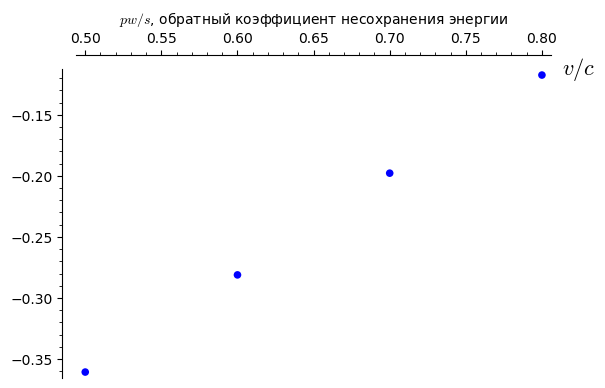

In [102]:
for min_vc, max_vc in [(0.005, 0.25), (0.1, 0.5), (0.5, 1)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)
    list_plot(vc_pw_s, pointsize=30).show(title="$pw/s$, обратный коэффициент несохранения энергии",
              axes_labels=["$v/c$", ""])

Рассмотрим более детально поведение среднего по периоду интеграла количества энергии излучения, вычисленного через вектор Пойнтинга, сравнивая результаты его интегрирования 
по верхней и по нижней воображаемым полусферам

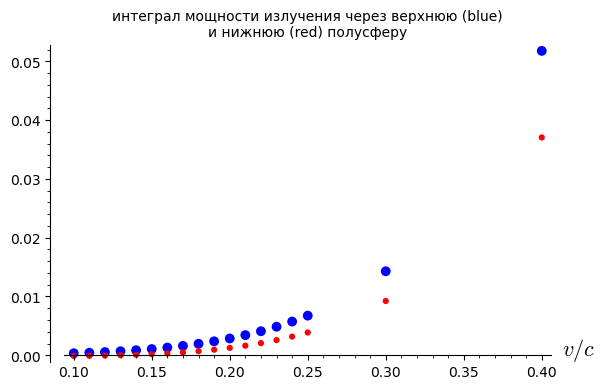

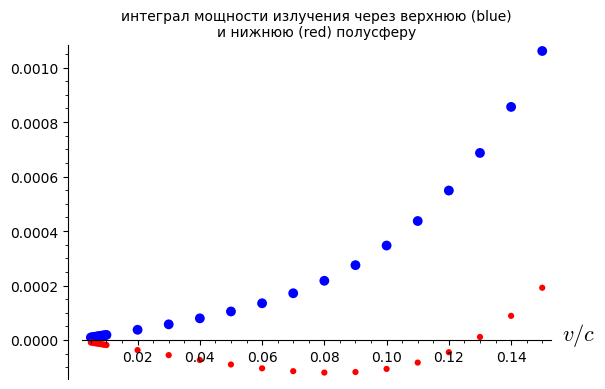

In [103]:
for min_vc, max_vc in [(0.1, 0.4), (0.005, 0.15)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)
    
    p  = list_plot(vc_s_up[:], color="blue", pointsize=50)
    p += list_plot(vc_s_dw[:], color="red", pointsize=20)
    p.show(title="интеграл мощности излучения через верхнюю (blue)\n"
           "и нижнюю (red) полусферу",
           axes_labels=["$v/c$", ""])

Произведём сверку полученного в данной работе интеграла по поверхности вектора Пойтинга с формулой интенсивности полного дипольного излучения системы зарядов $I_{dipol} = \frac{2}{3\,c^3} \ddot{\vec{d^2}}$ (ЛЛ2, формула (67,8))

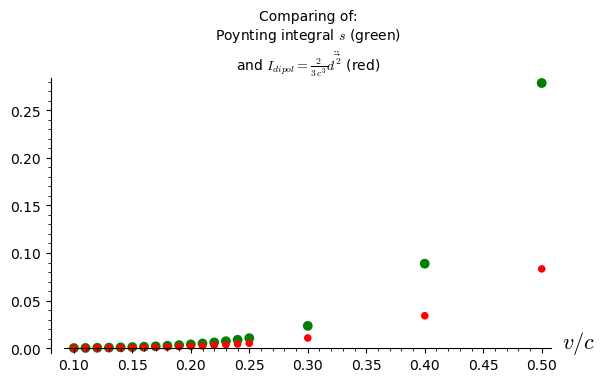

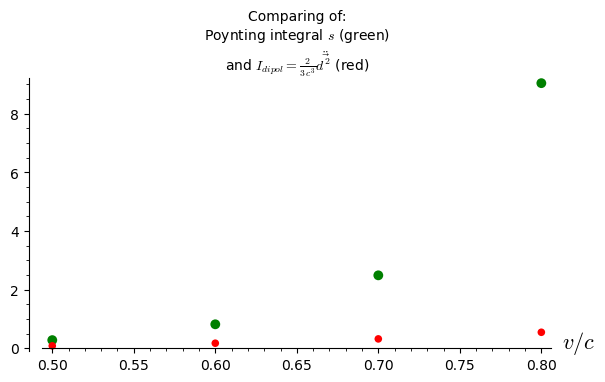

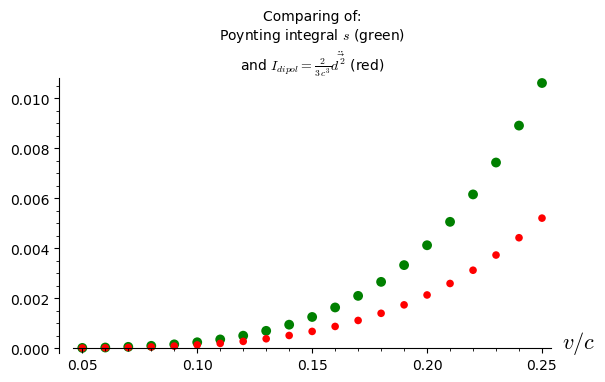

In [104]:
for min_vc, max_vc in [(0.1, 0.5), (0.5, 1), (0.05, 0.25)]:
    plot_lst(f_vc, min_vc=min_vc, max_vc=max_vc)
    p  = list_plot(vc_s, color="green", pointsize=50)
    p += list_plot(vc_I_dipol, color="red", pointsize=30)
    p.show(title="Comparing of:\nPoynting integral $s$ (green)\n"
           "and $I_{dipol}=\\frac{2}{3\\,c^3} \\ddot{\\vec{d^2}}$ (red)",
              axes_labels=["$v/c$", ""])

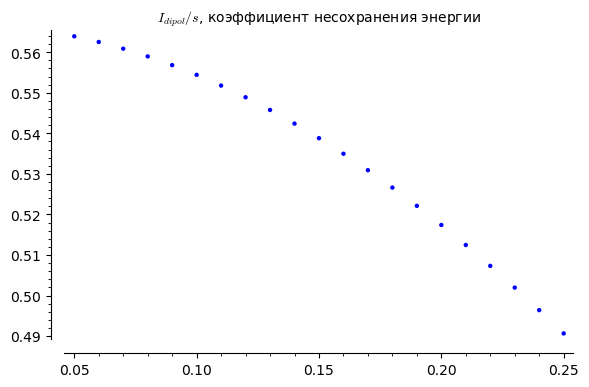

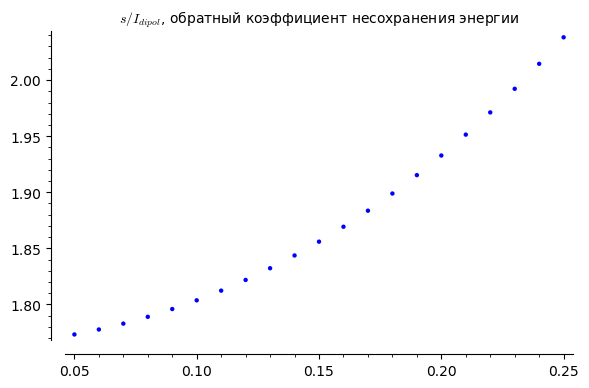

In [105]:
list_plot(vc_Idipol_s).show(title="$I_{dipol}/s$, коэффициент несохранения энергии")
list_plot(vc_s_Idipol).show(title="$s/I_{dipol}$, обратный коэффициент несохранения энергии")

Из данных графиков очевидна неполнота величины $I_{dipol}$ возникшей в результате ограниченности формулы (ЛЛ2, (67,8)) полученной с применением пренебрежений, оговоренных в самом начале параграфа 66

Рассмотрим теперь коэффициент несохранения энергии, сравнивая среднюю по периоду мощность $pw$, затрачиваемую для поддержания скорости движения зарядов постоянной с формулой интенсивности полного дипольного излучения системы зарядов $I_{dipol} = \frac{2}{3\,c^3} \ddot{\vec{d^2}}$ (ЛЛ2, формула (67,8))

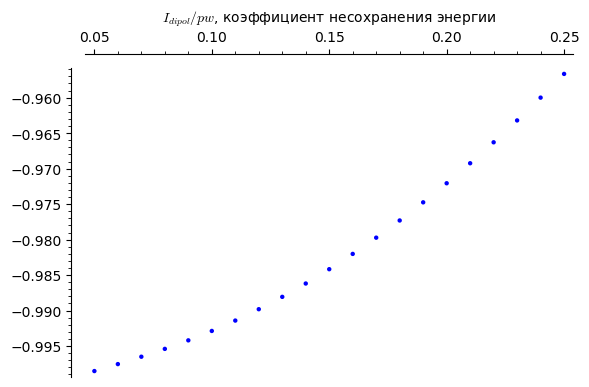

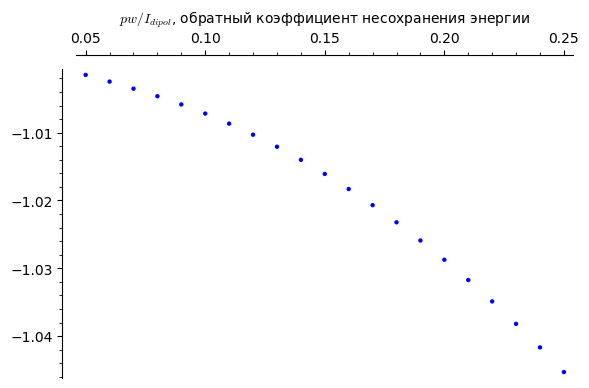

In [106]:
list_plot(vc_Idipol_pw).show(title="$I_{dipol}/pw$, коэффициент несохранения энергии")
list_plot(vc_pw_Idipol).show(title="$pw/I_{dipol}$, обратный коэффициент несохранения энергии")

В параграфе 75 ЛЛ2 говорится, что возникающие в третьем приближении силы (75,5) описывают обратное обратное действие излучения на заряды. И только лишь именно в третьем приближении сила торможения излучением должна соответствовать среднему дипольному $I_{dipol}$ излучению энергии системой за единицу времени.

Однако в данном расчёте использовалось точное для точечного заряда выражение силы торможения излучения, полученное для всех дальнейших членов разложения и приведенное с помощью коэффициента преобразования Лоренца для полей из системы координат, связанной с мгновенным положением заряда в лабораторную систему интегрирования.

Поэтому, очевидно несоответсвие интеграла в лабораторной системе силы торможения излучением формуле дипольного излучения.

Анализ графиков показывает, что попытка проверить в частном примере применимость общих принципов механики к электродинамической задаче, пользуясь общепринятой электродинамической теорией (запаздывающие потенциалы Лиенара Вихерта, ЛЛ2 параграф 63, формулы (63.8) (63.9)), привела к следующим парадоксальным проблемам:

 - несоответствие энергии затрачиваемой со стороны механической системы на поддержание постоянной скорости движения зарядов по кругу, тому количеству энергии, которое уносит электромагнитное поле в окружающее пространство, вычисленное с помощью интегрирования проекции вектора Пойтинга (ЛЛ2, формула (31,2)) на наружную нормаль к воображаемой сферической поверхности интегрирования

 - несоответствие также и импульса, затрачиваемого со стороны механической системы на поддержание постоянной скорости движения зарядов по кругу, той интегральной величине количества имульса электромагнитного поля, которое вытекает в единицу времени из замкнутого объёма через площадку, вычисленное с помощью интегрирования проекций соответствующих компонент $\sigma_{yx}, \sigma_{yy}, \sigma_{yz}$ тензора натяжения Максвелла на внутреннюю нормаль к воображаемой сферической поверхности интегрирования (ЛЛ2, формула (33,3), Тамм, параграф 33 формула (33.5))

 - построенные в соответствие с вышеуказанными формулами графики коэффициентов несохранения энергии и импульса в зависимости от соотношения $v/c$ носят нелинейный характер

 - график величины количества имульса электромагнитного поля, которое вытекает в единицу времени из верхней и нижней полусфер замкнутого объёма в зависимости от соотношения $v/c$ также носит парадоксальный характер, а именно: при больших значениях $v/c$ импульс электромагнитного поля, вытекающий через верхнюю полусферу направлен вверх, а имульс электромагнитного поля, вытекающий через нижнюю полусферу направлен вниз, что пока что выглядит логичным. Однако имеется некоторое граничное значение $v/c$ ниже которого происходит инверсия направления вытекания импульса, а именно: имульс электромагнитного поля, движущийся через верхнюю полусферу направлен уже вниз, а имульс электромагнитного поля, движущийся через нижнюю полусферу направлен теперь уже вверх(!), что становится неожиданно парадоксальным - импульс поля не вытекает из сферы ограничивающей систему движущихся по кругу и излучающих ЭМ волну зарядов, а втекает в нее(!). Хотя направление суммарного импульса электромагнитных волн при этом не меняется.

 - направление суммарного импульса электромагнитных волн было направлено в ту же сторону (вниз), что и сила действующая со стороны запаздывающего электромагнитного на движущиеся заряды (тоже вниз!). Исправлено путём использования для тензора натяжения Максвелла формулы Тамм (34,2) вместо формулы (ЛЛ2, 33,3). Судя по всему в (ЛЛ2, 33,3) используется неверный знак минус перед всем тензором натяжения.

 - сверка полученного в данной работе интеграла по поверхности вектора Пойтинга с формулой интенсивности полного дипольного излучения системы зарядов $I_{dipol} = \frac{2}{3\,c^3} \ddot{\vec{d^2}}$ (ЛЛ2, формула (67,8)) показала, что при малых значениях $v/c$ $I_{dipol}$ имеет тот же порядок что и интеграл вектора Пойтинга, однако всё же значение $I_{dipol}$ почти в два раза меньше. Это вероятно связано с пренебрежениями и ограничениями $a << \lambda$ (ЛЛ2, формула (67,1)), которые были допущены при выводе формулы полного дипольного излучения системы зарядов.

Батыгин и Топтыгин, издание 1962 года

Задача 664. Доказать, что если частица совершает периодическое движение,  то средняя за период скорость потерь энергии совпадает со средней интенсивностью излучения.

Задача то сформулирована, но решение к сожалению не приведено.

В издании 1970 года эта задача имеет номер 763, но ее решение также не приведено. Почему?, кстати...

Может Батыгин и Топтыгин тоже столкнулись с похожим парадоксом а решить его не успели?

Кстати, что интересно, Тамм в довольно-таки интересном параграфе 105 посвящённому доказательству закона сохранения полного количества движения (механического плюс электромагнитного), ссылаясь на теорему Гаусса в форме

$$F_x = \oint\limits_{S}^{}\vec T_{xn} dS = \int\limits_{V}^{} \left(\frac{\partial T_{xx}}{\partial x}+\frac{\partial T_{xy}}{\partial y}+\frac{\partial T_{xz}}{\partial z}\right) dV$$

записывает

<i>стало быть, согласно уравнению, непосредственно предшествующему уравнению (33.7) на стр. 159:</i>


$$\int\limits_{V}^{}\,\sum_{k}^{} \, \frac{\partial T_{ik}}{\partial x_k} dV = \oint\limits_{S} T_{xn} dS,$$

<i>где поверхностный интеграл должен быть взят по поверхности $S$ объема $V$ и при удалении этой поверхности в бесконечность, обратиться по предположению в нуль.
</i>

Интересно, а на чём собственно основано такое предположение Тамма?

В данной работе я как раз вычисляю этот поверхностный интеграл поэтому представляет интерес построить его зависимость от радиуса поверхности интегрирования при фиксированном $v/c$.

In [107]:
p_R = []
def calc_p_R(N, vc, max_log_R = 8, logging=False):
    set_c(1.0)
    set_vc(vc)

    def do_calc_R_p(R):
        set_sphere_R(R)
        
        # интеграл силы по периоду
        
        # интеграл силы приложенной к поверхности верхней воображаемой полусферы по периоду
        Ty_R_upper_half_sphere = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)

        # интеграл силы приложенной к поверхности нижней воображаемой полусферы по периоду
        Ty_R_down_half_sphere = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        
        # интеграл силы приложенной к поверхности воображаемой сферы по периоду
        Ty_R = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi
        
        # интеграл количества энергии излучения протекающей через поверхность верхней воображаемой полусферы по периоду
        Poynting_R_upper_half_sphere = scipy_integrate.nquad( \
            spherical_y_calc_Poynting_R_t, \
            [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi                t

        # интеграл количества энергии излучения протекающей через поверхность нижней воображаемой полусферы по периоду
        Poynting_R_down_half_sphere = scipy_integrate.nquad( \
            spherical_y_calc_Poynting_R_t, \
            [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                            varphi 

        # интеграл количества энергии излучения протекающей через поверхность воображаемой сферы
        Poynting_R = scipy_integrate.nquad( \
            spherical_y_calc_Poynting_R_t, \
            [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi              t

        # Полное дипольное излучение
        I_dipol = 4 / (3 * get_c()^3) * get_omega()^4 * get_R_l()^2 # *get_e()^2

        if logging:
            print("R=", R,
              "Ty_up=", Ty_R_upper_half_sphere,
              Ty_R_upper_half_sphere[0]/T(),
              "Ty_dw=", Ty_R_down_half_sphere,
              Ty_R_down_half_sphere[0]/T(),
              "Ty=", Ty_R, Ty_R[0]/T(),
              "s_up=", Poynting_R_upper_half_sphere,
              Poynting_R_upper_half_sphere[0]/T(),
              "s_dw=", Poynting_R_down_half_sphere,
              Poynting_R_down_half_sphere[0]/T(),
              "s=", Poynting_R, Poynting_R[0]/T(),
              "I_dipol=", I_dipol,
             )
        
        global p_R


        p_R += [(R,
                  Ty_R_upper_half_sphere[0]/T(),
                  Ty_R_down_half_sphere[0]/T(),
                  Ty_R[0]/T(),
                  Poynting_R_upper_half_sphere[0]/T(),
                  Poynting_R_down_half_sphere[0]/T(),
                  Poynting_R[0]/T(),
                  I_dipol,
                 )]

    for R in range(10, 95, 5):
        do_calc_R_p(R)
    for log_R in range(2, max_log_R):
        R = 10^log_R
        do_calc_R_p(R)

In [108]:
p_R = []
calc_p_R(N=1, vc=0.4)

In [109]:
def latex_arr_R(p_R, titles):
    ltx = "\\begin{array}{"
    for title in titles:
        ltx += 'c'
    ltx += "} "
    ititle = 0
    for title in titles:
        ltx += title
        if ititle < len(titles) - 1:
            ltx += " & "
        else:
            ltx += " \\\\"
        ititle += 1
    for (R, Ty_up, Ty_dw, Ty, s_up, s_dw, s, I_dipol) in p_R:
        ltx += " "
        ltx += "{:.1e} ".format(R)
        ltx += " & "
        ltx += "{:.3e}".format(Ty)
        ltx += " & "
        ltx += "{:.6e}".format(Ty_up)
        ltx += " & "
        ltx += "{:.6e}".format(Ty_dw)
        ltx += " & "
        ltx += "{:.7e}".format(s)
        ltx += " & "
        ltx += "{:.7e}".format(I_dipol)
        ltx += " & "
        ltx += "{:.3e}".format(s_up)
        ltx += " & "
        ltx += "{:.3e}".format(s_dw)
        ltx += " \\\\" 
    ltx += "\\end{array}"
    return ltx

In [110]:
from IPython.display import display, Math, Latex
titles = ["R_{sphere}",
          "T_y=\\int\\limits_{S}^{} T_{yn} dS",
          "T_y^{up}=\\int\\limits_{S_{up}}^{} T_{yn}",
          "T_y^{dw}=\\int\\limits_{S_{dw}}^{} T_{yn}",
          "s=\\int\\limits_{S}^{} \\vec S_{Poynt} d \\vec S",
          "I_{dipol}=\\frac{2}{3\\,c^3} \\ddot{\\vec{d^2}}",
          "s_{up}=\\int\\limits_{S_{up}}^{} \\vec S_{Poynt} d \\vec S",
          "s_{dw}=\\int\\limits_{S_{dw}}^{} \\vec S_{Poynt} d \\vec S",
         ]
ltx = latex_arr_R(p_R, titles)
display(Math(ltx))

<IPython.core.display.Math object>

In [111]:
R_Ty_up = []
R_Ty_dw = []
R_Ty = []

R_s_up = []
R_s_dw = []
R_s = []
R_I = []

def plot_p_R(p_R):

    global R_Ty_up
    global R_Ty_dw
    global R_Ty

    global R_s_up
    global R_s_dw
    global R_s
    global R_I
    
    R_Ty_up = []
    R_Ty_dw = []
    R_Ty = []

    R_s_up = []
    R_s_dw = []
    R_s = []
    R_I = []

    for (R, Ty_up, Ty_dw, Ty, s_up, s_dw, s, I_dipol) in p_R:

        R_Ty_up += [(np.log10(R), Ty_up)]
        R_Ty_dw += [(np.log10(R), Ty_dw)]
        R_Ty    += [(np.log10(R), Ty)]

        R_s_up += [(np.log10(R), s_up)]
        R_s_dw += [(np.log10(R), s_dw)]
        R_s    += [(np.log10(R), s)]
        R_I    += [(np.log10(R), I_dipol)]

Произведём сверку полученного в данной работе интеграла по поверхности вектора Пойтинга с формулой интенсивности полного дипольного излучения системы зарядов $I_{dipol} = \frac{2}{3\,c^3} \ddot{\vec{d^2}}$ (ЛЛ2, формула (67,8))

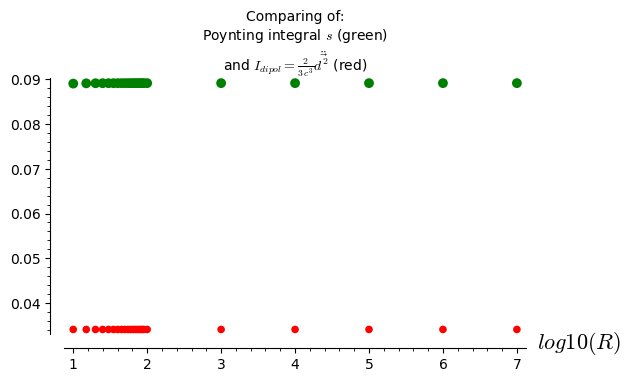

In [112]:
plot_p_R(p_R)
p  = list_plot(R_s, color="green", pointsize=50)
p += list_plot(R_I, color="red", pointsize=30)
p.show(title="Comparing of:\nPoynting integral $s$ (green)\n"
       "and $I_{dipol}=\\frac{2}{3\\,c^3} \\ddot{\\vec{d^2}}$ (red)",
       axes_labels=["$log10(R)$", ""])

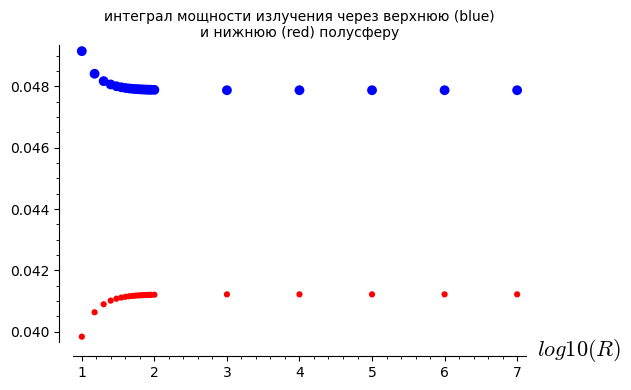

In [113]:
plot_p_R(p_R)

p  = list_plot(R_s_up[:], color="blue", pointsize=50)
p += list_plot(R_s_dw[:], color="red", pointsize=20)
p.show(title="интеграл мощности излучения через верхнюю (blue)\n"
       "и нижнюю (red) полусферу",
       axes_labels=["$log10(R)$", ""])

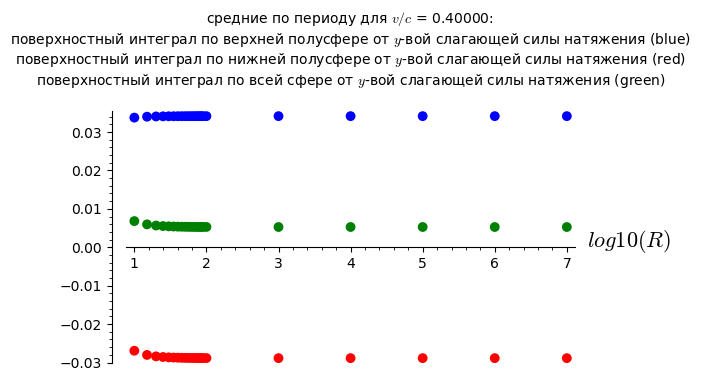

In [115]:
plot_p_R(p_R)
p  = list_plot(R_Ty_up[:], color="blue", pointsize=50)
p += list_plot(R_Ty_dw[:], color="red", pointsize=50)
p += list_plot(R_Ty[:], color="green", pointsize=50)
p.show(title="средние по периоду для $v/c$ = %0.5Lf: \n"
       "поверхностный интеграл по верхней полусфере от $y$-вой слагающей силы натяжения (blue)\n"
       "поверхностный интеграл по нижней полусфере от $y$-вой слагающей силы натяжения (red)\n"
       "поверхностный интеграл по всей сфере от $y$-вой слагающей силы натяжения (green)\n" %(get_vc()),
          axes_labels=["$log10(R)$", ""])

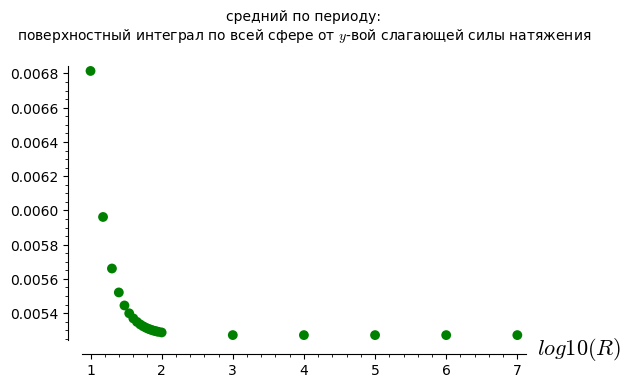

In [116]:
plot_p_R(p_R)
p  = list_plot(R_Ty[:], color="green", pointsize=50)
p.show(title="средний по периоду:\n"
       "поверхностный интеграл по всей сфере от $y$-вой слагающей силы натяжения\n",
          axes_labels=["$log10(R)$", ""])

Таким образом для заданного соотношения $v/c$ поверхностный интеграл по всей сфере от $y$-вой слагающей силы натяжения с ростом радиуса сферы интегрирования не стремится к нулю, а выходит на определённую константу.

Представляет интерес исследовать величину этой константы в зависимости от соотношения $v/c$

In [117]:
arr_vc = [
    0.0001,
    0.0010,
    0.01,
    0.05,
    0.10,
    0.15,
    0.20,
    0.25,
    0.30,
    0.35,
    0.40,
    0.45,
    0.50,
    0.55,
    0.60,
    0.65,
    0.70,
    0.75,
    #0.80,
    #0.90,
]

In [118]:
R_Ty = []
def calc_R_Ty_(N, vc, max_log_R = 8, logging=False):
    set_c(1.0)
    set_vc(vc)

    def do_calc_R_T_(R):
        set_sphere_R(R)

        # интеграл силы приложенной к поверхности воображаемой сферы по периоду
        Ty = scipy_integrate.nquad( \
            lambda theta, varphi, t : \
            spherical_y_calc_Txyzn_R_t(theta = theta, varphi = varphi, t = t)[1], \
            [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [-T()/2, T()/2]], opts=nquad_opts_2)
        #                theta                  varphi

        if logging:
            print("R=", R,
              "Ty=", Ty, Ty[0]/T())

        global R_Ty

        R_Ty += [(np.log10(R), Ty[0]/T())]

    for R in range(10, 95, 5):
        do_calc_R_T_(R)
    for log_R in range(2, max_log_R):
        R = 10^log_R
        do_calc_R_T_(R)

0.000100000000000000 (6.0, 4.026775694676688995e-21)
0.000100000000000000 (7.0, 4.0251817290505040295e-21)
0.000100000000000000 (8.0, 4.025165789136166556e-21)
0.000100000000000000 (9.0, 4.025165631114720123e-21)
0.000100000000000000 (10.0, 4.0251657386036148388e-21)
0.000100000000000000 (11.0, 4.0251658351406200993e-21)


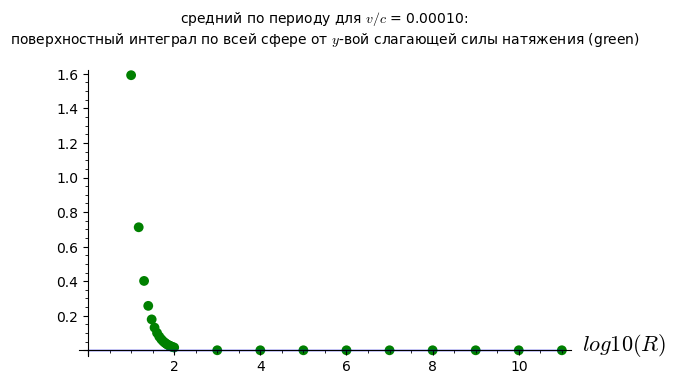

0.00100000000000000 (5.0, 4.0267797579263803317e-16)
0.00100000000000000 (6.0, 4.025185786792667273e-16)
0.00100000000000000 (7.0, 4.0251698474923679094e-16)
0.00100000000000000 (8.0, 4.025169689535142966e-16)
0.00100000000000000 (9.0, 4.025169689216021849e-16)
0.00100000000000000 (10.0, 4.0251694905668657713e-16)


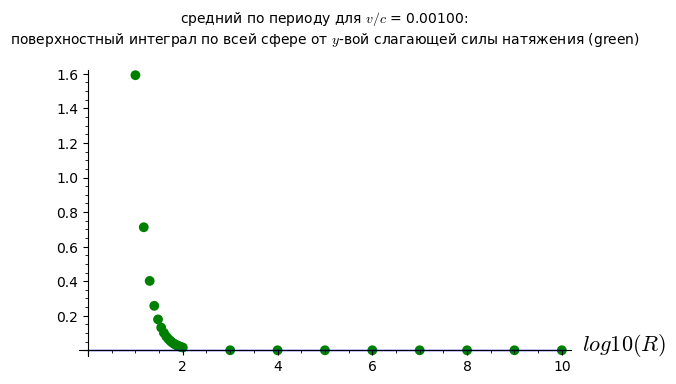

0.0100000000000000 (4.0, 4.0271862216247720144e-11)
0.0100000000000000 (5.0, 4.0255918643336618448e-11)
0.0100000000000000 (6.0, 4.0255759198969938366e-11)
0.0100000000000000 (7.0, 4.0255757612636291007e-11)
0.0100000000000000 (8.0, 4.0255757589796215833e-11)
0.0100000000000000 (9.0, 4.025575770855671195e-11)


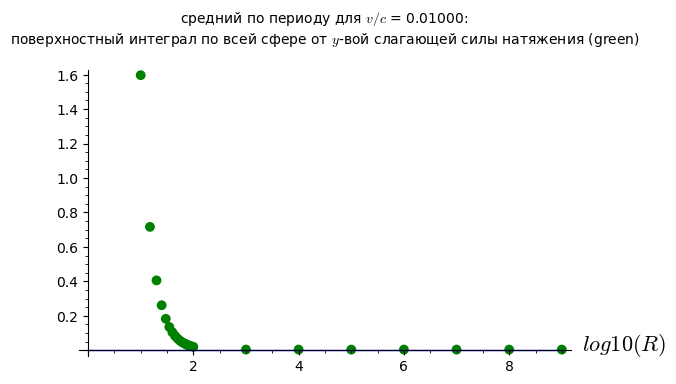

0.0500000000000000 (4.0, 1.2611210965865027378e-07)
0.0500000000000000 (5.0, 1.2611010493034359782e-07)
0.0500000000000000 (6.0, 1.2611008487822575404e-07)
0.0500000000000000 (7.0, 1.2611008467819423356e-07)
0.0500000000000000 (8.0, 1.2611008466975149326e-07)
0.0500000000000000 (9.0, 1.2611008495064403192e-07)


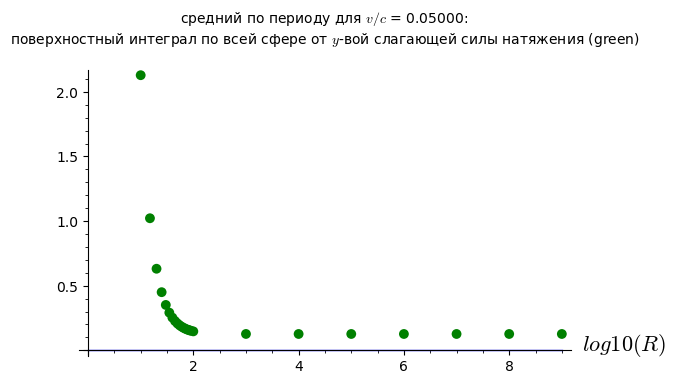

0.100000000000000 (2.0, 4.2328787185880842727e-06)
0.100000000000000 (3.0, 4.069529086822199786e-06)
0.100000000000000 (4.0, 4.0678954068698058055e-06)
0.100000000000000 (5.0, 4.067879069315249952e-06)
0.100000000000000 (6.0, 4.0678789059124033898e-06)
0.100000000000000 (7.0, 4.0678789048383398063e-06)


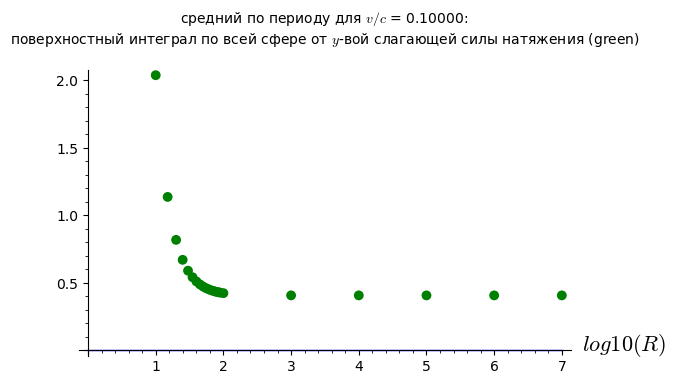

0.150000000000000 (2.0, 3.190689860816592795e-05)
0.150000000000000 (3.0, 3.133826032936038322e-05)
0.150000000000000 (4.0, 3.1332573305879151028e-05)
0.150000000000000 (5.0, 3.133251643346062748e-05)
0.150000000000000 (6.0, 3.1332515923881143136e-05)
0.150000000000000 (7.0, 3.1332515861316278062e-05)


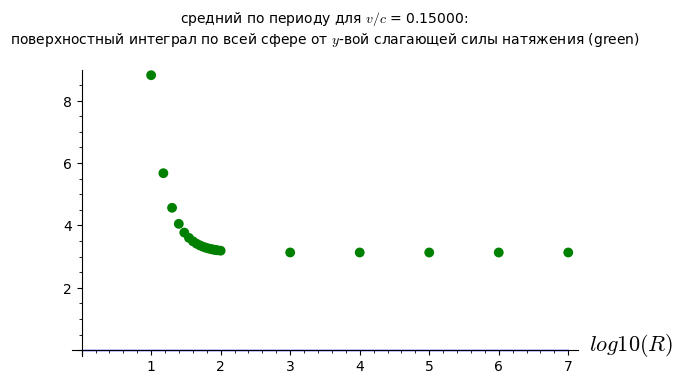

0.200000000000000 (2.0, 0.00013635512392490205244)
0.200000000000000 (3.0, 0.00013494699139522112487)
0.200000000000000 (4.0, 0.00013493290849865501326)
0.200000000000000 (5.0, 0.00013493276763849135616)
0.200000000000000 (6.0, 0.00013493276617696361437)
0.200000000000000 (7.0, 0.00013493276811449311457)


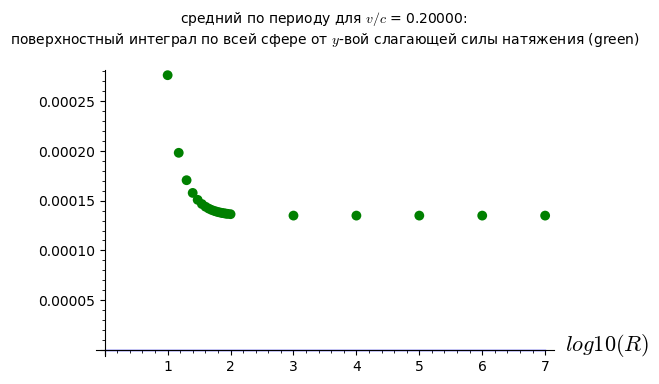

0.250000000000000 (2.0, 0.00042763600324164122595)
0.250000000000000 (3.0, 0.00042472453577393057252)
0.250000000000000 (4.0, 0.00042469541841812504448)
0.250000000000000 (5.0, 0.00042469512751169054417)
0.250000000000000 (6.0, 0.00042469512378831470898)
0.250000000000000 (7.0, 0.00042469512405940992226)


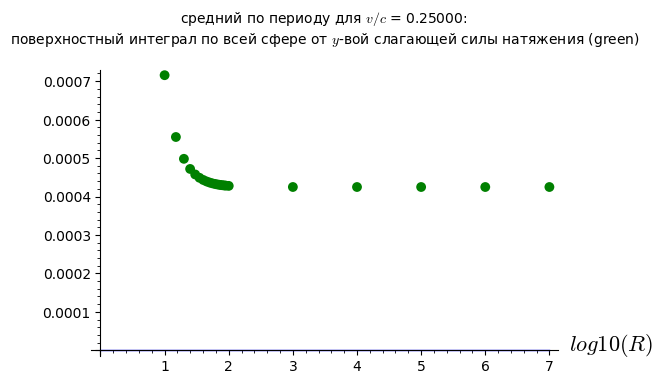

0.300000000000000 (2.0, 0.0011075866128752532387)
0.300000000000000 (3.0, 0.0011021860184534089495)
0.300000000000000 (4.0, 0.0011021320068448792484)
0.300000000000000 (5.0, 0.0011021314658940040777)
0.300000000000000 (6.0, 0.0011021314603821051339)
0.300000000000000 (7.0, 0.0011021314596821437341)


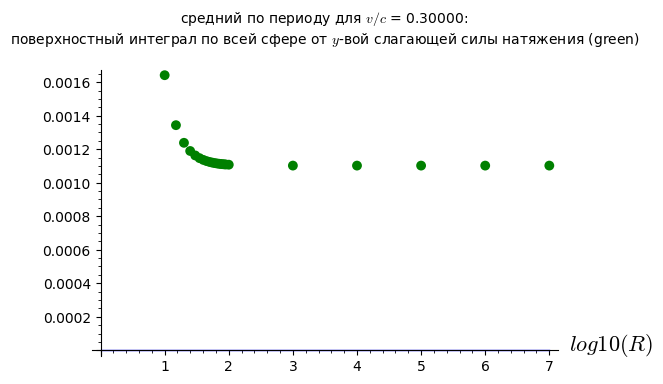

0.350000000000000 (2.0, 0.0025272810766829105956)
0.350000000000000 (3.0, 0.0025179367178434368468)
0.350000000000000 (4.0, 0.0025178432672537289483)
0.350000000000000 (5.0, 0.00251784232893708569)
0.350000000000000 (6.0, 0.002517842319311254616)
0.350000000000000 (7.0, 0.0025178423193169786758)


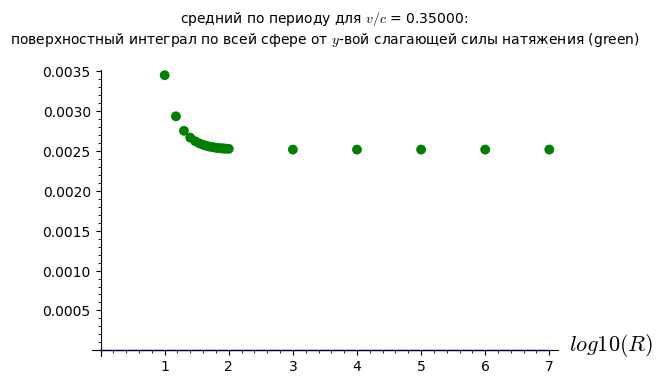

0.400000000000000 (2.0, 0.005287199309049348357)
0.400000000000000 (3.0, 0.0052717508398386326918)
0.400000000000000 (4.0, 0.0052715963384256086734)
0.400000000000000 (5.0, 0.0052715947897256228536)
0.400000000000000 (6.0, 0.0052715947778272225664)
0.400000000000000 (7.0, 0.0052715947755609907742)


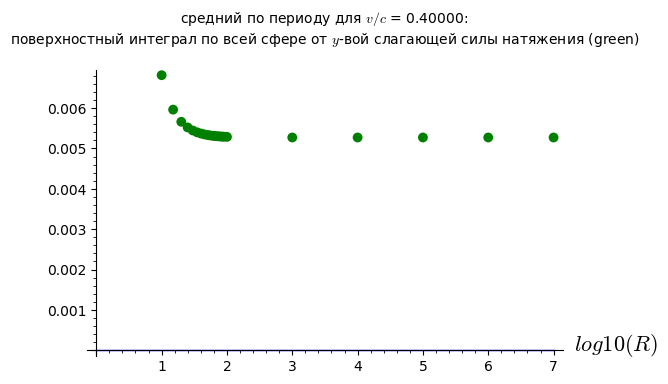

0.450000000000000 (2.0, 0.0104187156595412766)
0.450000000000000 (3.0, 0.010393904839255947635)
0.450000000000000 (4.0, 0.0103936566709879132475)
0.450000000000000 (5.0, 0.010393654230328704763)
0.450000000000000 (6.0, 0.01039365418233270337)
0.450000000000000 (7.0, 0.0103936541762156896515)


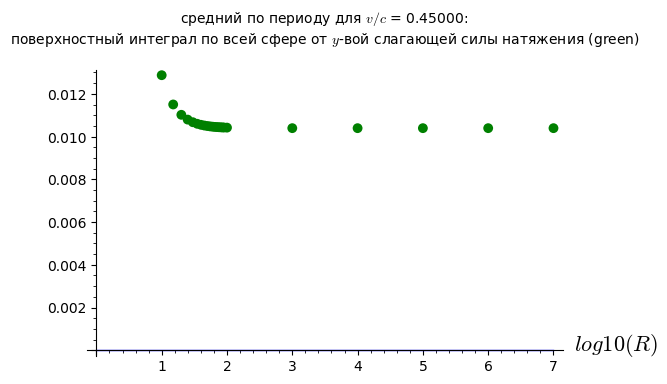

0.500000000000000 (1.9294189257142929, 0.019740255635663266457)
0.500000000000000 (1.9542425094393248, 0.019734335955214513105)
0.500000000000000 (2.0, 0.019725048685018937694)
0.500000000000000 (3.0, 0.019685845908979244651)
0.500000000000000 (4.0, 0.019685453803003513607)
0.500000000000000 (5.0, 0.0196854499016186005)


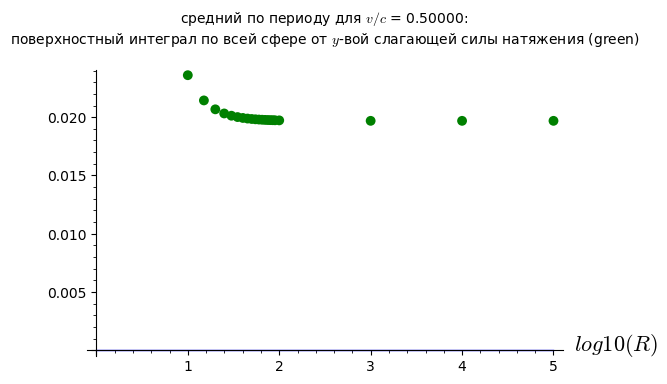

0.550000000000000 (1.9294189257142929, 0.03647366201964962783)
0.550000000000000 (1.9542425094393248, 0.0364643598287963907)
0.550000000000000 (2.0, 0.03644976564722189796)
0.550000000000000 (3.0, 0.036388161410412800732)
0.550000000000000 (4.0, 0.03638754523565265783)
0.550000000000000 (5.0, 0.036387539126193391336)


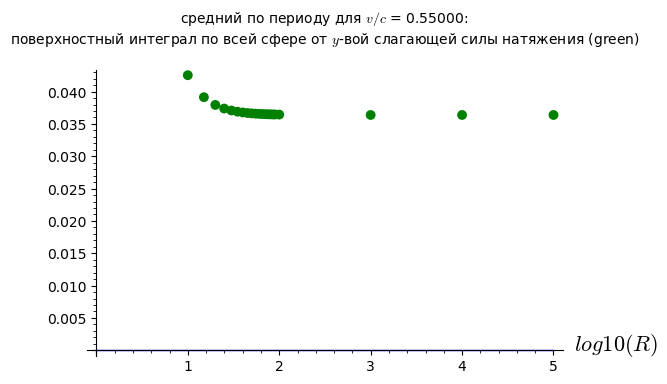

0.600000000000000 (1.9294189257142929, 0.06669766332343406883)
0.600000000000000 (1.9542425094393248, 0.06668297332713647094)
0.600000000000000 (2.0, 0.06665992591032488941)
0.600000000000000 (3.0, 0.06656263946645757872)
0.600000000000000 (4.0, 0.06656166632719481136)
0.600000000000000 (5.0, 0.066561656846822080634)


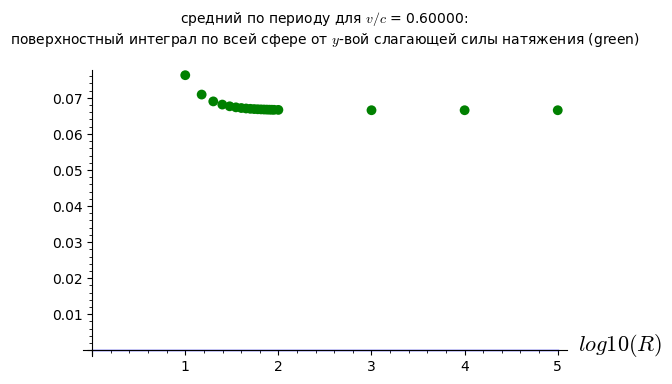

0.650000000000000 (1.9294189257142929, 0.12237040256948353696)
0.650000000000000 (1.9542425094393248, 0.12234682164548939462)
0.650000000000000 (2.0, 0.12230982503498175306)
0.650000000000000 (3.0, 0.122153657997307089866)
0.650000000000000 (4.0, 0.12215209624758501987)
0.650000000000000 (5.0, 0.12215208006688065286)


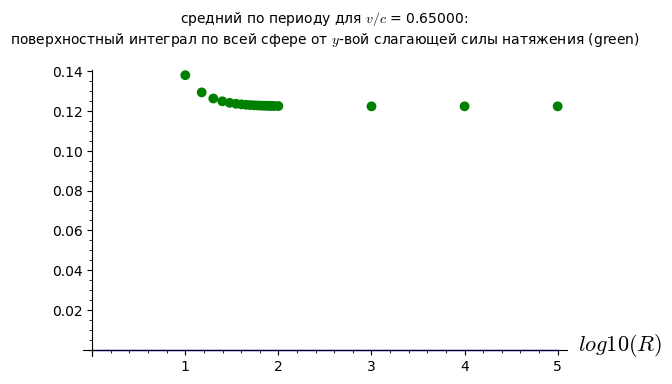

0.700000000000000 (1.9294189257142929, 0.22874802133088758021)
0.700000000000000 (1.9542425094393248, 0.22870900125745574649)
0.700000000000000 (2.0, 0.22864778203844579443)
0.700000000000000 (3.0, 0.22838936115116161903)
0.700000000000000 (4.0, 0.22838677559480201614)
0.700000000000000 (5.0, 0.22838675208363033516)


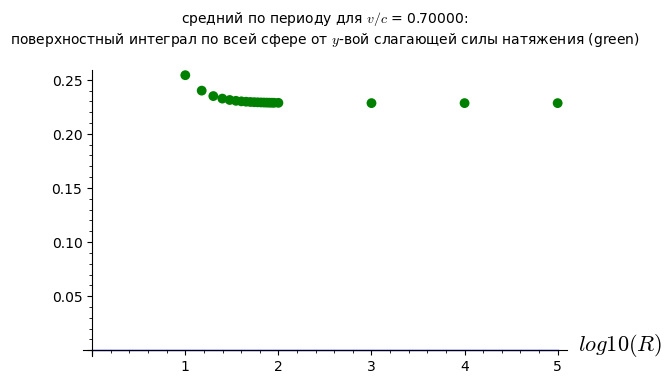

0.750000000000000 (1.9294189257142929, 0.44447899751661675808)
0.750000000000000 (1.9542425094393248, 0.44441111827300541477)
0.750000000000000 (2.0, 0.4443046242785855943)
0.750000000000000 (3.0, 0.44385511520902646437)
0.750000000000000 (4.0, 0.4438506202116765722)
0.750000000000000 (5.0, 0.44385057309248895663)


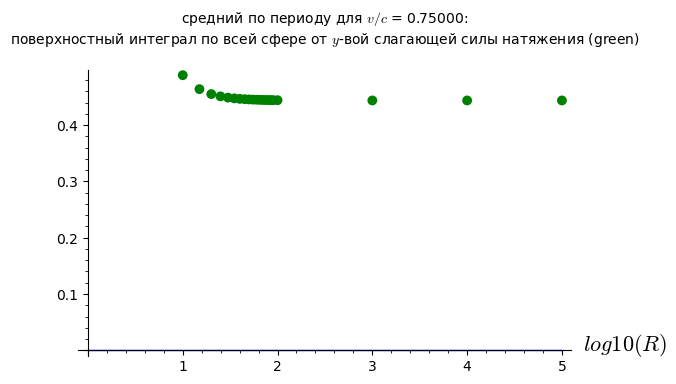

In [119]:
vc_lim_R_Ty = []

for vc in arr_vc:
    set_vc(vc)
    
    if vc < 0.001:
        max_log_R = 12
    elif vc < 0.01:
        max_log_R = 11
    elif vc < 0.1:
        max_log_R = 10
    elif vc < 0.5:
        max_log_R = 8
    else:
        max_log_R = 6

    R_Ty = []
    calc_R_Ty_(N=1, vc=vc, max_log_R = max_log_R, logging = False)
    #plot_p_R(p_R)
    
    for n in range(-6, 0):
        print (vc, R_Ty[n])
    vc_lim_R_Ty += [(vc, R_Ty[-1][1])]
    
    p = list_plot(R_Ty[:], color="green", pointsize=50)
    p += plot(lambda x : 0, (x, 0, R_Ty[-1][0]))
    p.show(title="средний по периоду для $v/c$ = %0.5Lf: \n"
           "поверхностный интеграл по всей сфере от $y$-вой слагающей силы натяжения (green)\n" %(get_vc()),
              axes_labels=["$log10(R)$", ""])

Построим графики величины предела на бесконечности поверхностного интеграла силы натяжения в зависимости от соотношения $v/c$

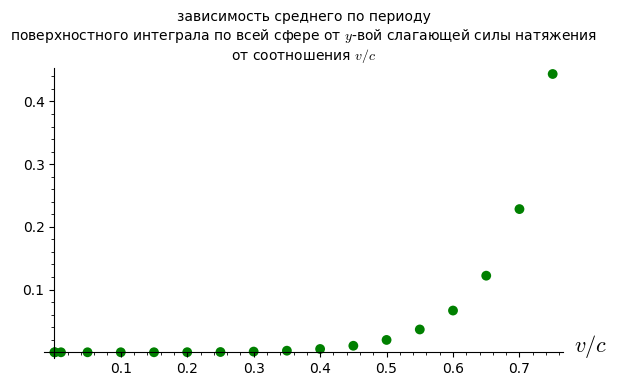

In [121]:
p = list_plot(vc_lim_R_Ty, color="green", pointsize=50)
p.show(title="зависимость среднего по периоду\n"
             "поверхностного интеграла по всей сфере от $y$-вой слагающей силы натяжения\n"
             "от соотношения $v/c$",
              axes_labels=["$v/c$", ""])

Рассмотрим вывод уравнения (105.10) Тамма, который (после вышеупомянутого предположения о устремлении к нулю интеграла по поверхности) должен быть переписан следующим образом.

Таким образом, получаем:

$$\int f_i dV + \frac{\partial}{\partial t}\int g_i dV =  \lim_{S\to\infty} \oint\limits_{S} T_{xn} dS$$

или, переходя от слагающих к векторам и заменяя частную производную по времени полной (ввиду того, что под знаком $\frac{\partial}{\partial t}$ стоит интеграл по всему пространству, зависящий только от $t$):

$$\frac{d}{dt}\int \vec g dV + \int \vec f dV =  \lim_{S\to\infty} \oint\limits_{S} \vec{ T}_{n} dS$$

где $\vec g = \frac{1}{4\pi c} [\vec E \vec H]$ - количество движения поля, $\vec f$ - полная плотность пондеромоторных сил.

С другой стороны, изменение механического количества движения $\vec G_{M}$ всех находящихся в пространстве тел определяется равнодействующей пондеромоторных сил

$$\frac{d\vec G_{M}}{dt} = \int \vec f dV.$$

Поэтому последнее равенство равносильно равенству

$$\frac{d}{dt}\left(\vec G_{M} + \int \vec g dV\right) = \lim_{S\to\infty} \oint\limits_{S} \vec{T}_{n} dS,\,\,\,\,(105.10)$$

которое в общем-то, в случае если поверхностный интеграл от слагающей силы натяжения по какой либо оси ($x$,$y$ или $z$) при удалении этой поверхности в бесконечность, не стремится обратиться (по предположению (!) Тамма) в нуль, нарушает закон сохранения полного количества движения (механического плюс электромагнитного).

Проверка применяемого в данной работе алгоритма для только лишь одного заряда движущегося по кругу, показала, что предположение Тамма, о том что

$$\lim_{S\to\infty} \oint\limits_{S} T_{yn} dS = 0$$

выполняется для случая периодического движения одного заряда по кругу с постоянной скоростью.

Однако для случая синхронного периодического движения двух зарядов по ассиметричным траекториям исследуемым в данной работе, предположение Тамма уже не оправдывается, потому что именно этот поверхностный интеграл при увеличении радиуса сферы интегрирования выходит на константу отличающуюся от нуля

$$\lim_{S\to\infty} \oint\limits_{S} T_{yn} dS \neq 0$$

Поэтому по меньшей мере в рамках текущей задачи закон сохранения полного количества движения (механического плюс электромагнитного) нарушается.

Каков физический смысл отличного от нуля поверхностного интеграла от силы натяжения при удалении поверхности интегрирования в бесконечность? Исходя из уравнения (105.10) это производная по времени полного импульса системы. Получается, что рассмотренная в данной работе электродинамико-механическая система в купе с электромагнитным полем от чего-то отталкивается. От чего? От структуры пространства бесконечной Вселенной? От вакуума? От эфира? И это явно не фотонный двигатель. При том что большую часть нескомпенсированного импульса получает именно электромагнитное поле. Эффект выглядит так как будто неполнота пондеромоторной силы влияющей на изменение механической части импульса системы вызвана тем, что в рассматриваемом характере асимметричного периодического движения заряд постоянно выскальзывает из-под действия этой пондеромоторной силы вследствие запаздывания поля.

Согласно релятивистской теории можно сказать, что электромагнитная масса самих зарядов увеличивается с увеличением скорости вращения. Однако этот вопрос требует более детального рассмотрения, поскольку расчёт электромагнитной массы возможен, если рассматривать заряды не точечными (как это было сделанно в данной работе), а имеющими заданное объемное распределение с учётом релятивисткого сжатия объема, занимаемого зарядами.

Однако, что интересно, рассматривая задачу нахождения инертной электромагнитной массы с помощью тех же запаздывающих потенциалов Лиенара Вихерта

https://github.com/daju1/articles/blob/master/sagemath/inertial_mass_of_charged_particle/About_inertial_properties_of_electromagnetic_mass.01.pdf

если в приближении малых скоростей сравнивать инертную электромагнитную массу вычисленную при резких и при плавных ускорениях, я пришёл к аналогичному парадоксальному несохранению как энергии, так и импульса. И это несохранение было вызвано как раз именно выскальзыванием заряда из под действия собственного поля при резком ускорении.

С теоретической точки зрения получается интересная ситуация. Если мы хотим сохранить электродинамическую теорию неизменной, то нам придётся отказаться от применимости в общем случае закона сохранения полного импульса. (А заодно и полной энергии, ибо энергия поля неразрывно связана с импульсом поля). Если мы все же не хотим отказываться от универсальности принципа сохранения таких интегралов движения как импульс и энергия, то придётся признать факт того, что электродинамическая теория нуждается в хорошем анализе, наподобие аудита, аккуратном пересмотре и, вероятно, модификации.

С другой стороны, может оказаться, что обнаруженное в данной работе это не просто формальный парадокс теории, а реально существующее явление. В этом случае вместо воображаемой поверхности интегрирования имеет смысл сооружать реальный поглощающий или отращающий излучение кожух, который бы принимал на себя излишек количества движения поля.

В обсуждении решаемой задачи

http://www.sciteclibrary.ru/cgi-bin/yabb2/YaBB.pl?num=1680163141

говорилось следующе

Лиенар---Вихерт --- это точное решение. Но это точное решение только уравнений Максвелла при заданном движении зарядов. А откуда оно такое красивое заданное взялось? Значит, помимо сил электрических, на частицы действуют еще какие-то силы, которые уравнениями Максвелла никак не описываются. А как описываются? Если это описание релятивистски инвариантно (как и описание электрических сил уравнениями Максвелла), то и вся теория релятивистски инвариантна, тогда инерцоид невозможен. А если вы неявно описываете эти другие силы релятивистски неинвариантным образом, то получаете просто внутренне противоречивую теорию, которая дает разные ответы в зависимости от того, из какой системы отсчета считать.

Но, помимо точного решения, есть еще разложение по степеням v/c. Нулевой порядок --- это обычная классическая механика с законом Кулона. Следующее, квадратичное по v/c приближение --- дарвиновское, в нем уже есть поправки к закону Кулона с одной стороны, и ко второму закону Ньютона --- с другой. И никаких инерцоидов снова не может быть. Но описывает оно только электрические силы. Если вы всунете туда еще какие-то силы, непонятно как описанные, то гарантированно получите кучу парадоксов. Это так называемый "парадокс Г Иванова" тридцатилетней давности

А учет излучения начинается с третьего порядка по v/c (если говорить об энергии) или даже с четвертого (если говорить об импульсе).

Поэтому для разбора "парадокса Иванова" нужно не про излучение думать, а про то, как вы описываете другие, не электрические силы в этой задаче.

Итак, пусть имеются два твердотельных вращающихся диска (два велосипедных колеса), на ободе которых физически вмонтированы заряды. Хотя задача и рассчитана  для электрических зарядов (так проще ибо уже есть готовые формулы Лиенара Вихерта), но физически это могут быть диполи магнитных зарядов (цилиндрические магниты, вмонтированные в обод). (Предполагается, что решение полученные на основе запаздывающих потенциалов Лиенара Вихерта можно также использовать для магнитных зарядов образующих магнитные диполи). Таким образом другие, не электрические силы в этой задаче это могут быть механические силы упругости вращающегося на оси диска.

И вся соль дела в том, описываете ли вы эти силы упругости в рамках релятивистской теории упругости или же в рамках классической, приговаривая про "абсолютно жесткий диск".

Теперь возникает вопрос, как в такой постановке задачи описать релятивистски инвариантно эти механические силы упругости?

Можно для начала рассмотреть Парадокс Троутона — Нобла, который по существу эквивалентен мысленному эксперименту под названием «парадокс прямоугольного рычага», впервые рассмотреному Гилберт Ньютон Льюисом и Ричард Чейза Толменом в 1909 году.

https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D1%8B%D1%82_%D0%A2%D1%80%D0%BE%D1%83%D1%82%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%9D%D0%BE%D0%B1%D0%BB%D0%B0

В парадоксе Троутона Нобла из электродинамики следуют силы, действующие на заряды. Заряды должны двигаться, но они не двигаются, и из релятивистского сокращения длины всех материальных обьектов вдоль направления эфирного ветра можно получить появление момента сил, который бы компенсировал момент вызванный электродинамическими силами. К тому же этот релятивистский дополнительный момент сил должен исчезать, если конденсатор Троутона Нобла разряжен.

Рассматривая «парадокс прямоугольного рычага» можно заменить воображаемые силы, действующие на концы прямоугольного рычага на реальные пружинки и понять, что в той пружинке, которая движется вдоль своей длины благодаря релятивистскому сокращению длины этой самой пружинки должен увеличиться ее коэффициент жёсткости, что в принципе может быть объяснено межмолекулярными силами. Например, если меняется масштаб длины то, вероятно, меняется положение минимума межмолекулярного потенциала Леннард Джонсона. Вместо изменения масштаба длины можно рассмотреть влияние релятивисткого сжатия зарядов входящих в состав молекул на межмолекулярные потенциалы, и поэтому изменение жёсткости пружинки в принципе можно объяснить релятивистскими эффектами.

В текущей задаче про два заряда движущихся по окружностям, заряды пусть например будут вмонтированы в ободы велосипедных колёс. В соответствии с парадоксом прямого рычага при вращении колёс коэффициент жёсткости ободов должен увеличится. Коэффициент жёсткости спиц не изменится.

Можно конечно усложнить задачу введя конечные константы упругости как радиальные так и тангенциальные. И тогда к тангенциальным константам упругости можно уже сказать что эти константы согласно релятивизму будут увеличиваться по мере роста скорости вращения.

Такую задачу нужно будет решать итеративным способом, взяв за первое приближение полученное решение. При решении этой задачи возникнет вычислительная проблема нахождения запаздывающего момента. При использовании итерационный численного метода Ньютона - Рафсона для его нахождения аналитическое выражение движения зарядов будет уже не известно, его на каждой итерации придётся заменять найденным на предыдущей итерации решением. (И это существенно увеличит затраты машинного времени, необходимого на поиск решения каждой итерации). Найденная в данной работе "нулевая" итерация получена в предположении бесконечно больших тангенциальных и радиальных констант упругости.

Однако парадокс текущей задачи состоит в том, что электродинамические силы присутствуют и поэтому механическая система против этих электродинамических сил затрачивает как свою энергию так и свой импульс. Возникает вопрос, разве нужно для расчёта импульса и энергии, которые механическая система отдает электрическим зарядам использовать какие либо дополнительные формулы, кроме электродинамических?

Парадокс в том, что рассчитав по электродинамическим формулам импульс и энергию, которые механическая система отдает зарядам, я по тем же электродинамическим формулам вижу что импульс и энергия поля много больше чем затраченные.

Хотя изначально предполагалось, что «любое движение зарядов которое приведет к излучению с неравномерной диаграммой направленности и значит ненулевым приростом суммарного импульса поля очевидно будет сопровождаться ненулевой интегральной суммой сил приложенных к этим зарядам аккурат на производную этого прироста импульса поля ("Фотонный двигатель")» и если «считать поток импульса (заданного направления) через замкнутую поверхность - суммарный поток покажет сколько импульса убегает наружу за единицу времени. Именно такая сила тяги и будет толкать систему... за то место, которым мы крутим заряды».


Мне пока что не хочется лезть в релятивисткую теорию упругости как предлагают некоторые мои оппоненты, меня не покидает мысль искать корни парадокса именно в электродинамике

я встречал утверждения о том что вместо вектора Пойтинга нужно рассматривать вектор Умова. Например, В. Ганкин, Ю. Ганкин, О. Куприянова, И. Мисюченко в работе "История электромагнитной массы" пишут: "Другой принципиальной ошибкой Фейнмана было использование вектора Пойнтинга для описания переноса энергии полем электрона, который может применяться только для электромагнитных волн. В случае же движущегося заряда необходимо взять вектор Умова, связанный с конвективным переносом энергии. [Вектор Пойнтинга представляет собой частный случай вектора Умова]. Доходчивое объяснение разницы
между этими аппаратами дано у Марии Корневой и Виктора Кулигина (см.подробнее)."

Далее у меня очень большое сомнение в применимости именно теоремы Гаусса к динамике. Я когда-то сам делал расчёты касаемо вопроса проверки применимости теоремы Гаусса к динамике. Вот по этой ссылке лежат мои расчёты сделанные в эпоху, когда я ещё работал с программой Maple

https://github.com/daju1/articles/tree/master/gauss_theorem

где я ставил под сомнение применимость теоремы Гаусса
$div \vec D = \rho$ к динамике. Я делал проверку с помощью потенциалов Лиенара Вихерта  и обнаруживал, что теорема Гаусса нарушается, если заряд начинает движение резко из состояния покоя

И ещё у Каравашкина в работе "Трасформация теоремы о дивергенции"

https://selftrans.narod.ru/archive/div/divergence/div1/div1rus.html

я встречал подробный анализ теоремы Гаусса применительно к динамике
